In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from tqdm import  tqdm
from qutip import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import kwant
import math
from math import  sqrt
from numpy.lib.scimath import sqrt as csqrt
import scipy
from scipy.optimize import fsolve

In [2]:
text_file = open("DOS_AIM030ncv4", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

-3	0.0324492150405974247	0.0211329733838485148



In [3]:
fdos3=[[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    
def Lorentzian(omega, Gamma, poles):
    Rho0 = Gamma / np.pi / (omega ** 2 + Gamma ** 2)
    p = np.random.uniform(0, 1, poles)
    Rhoint = np.zeros(poles)
    for i in range(len(p)):
        Rhoint[i] = Gamma * math.tan(np.pi * (p[i] - 1 / 2))  ###p[i]-1/2
    return Rho0, Rhoint

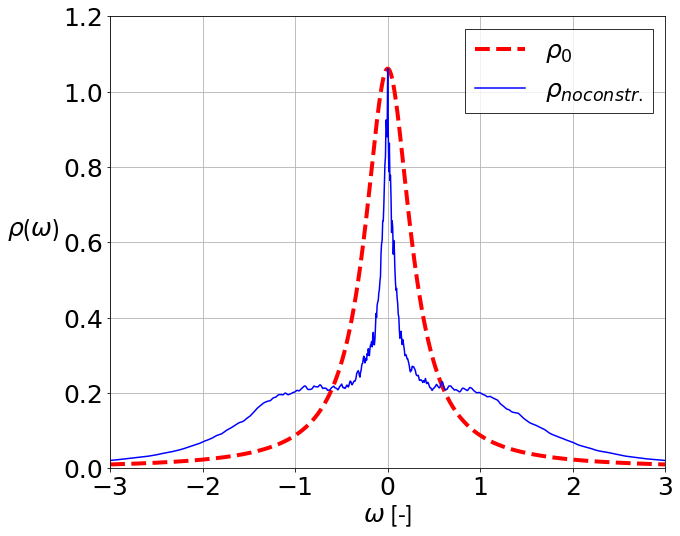

In [4]:
font = {'size'   : 25}
plt.rc('legend', fontsize=25)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,Lorentzian(np.linspace(-3,3,1001),0.3,4)[0], '--r',linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos3[1],'-b',label='$\\rho_{no constr.}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('noconstraint.svg', format='svg', dpi=3600)

In [5]:
text_file = open("DOS_AIM030ncv3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))

-3	0.0325178199599961137



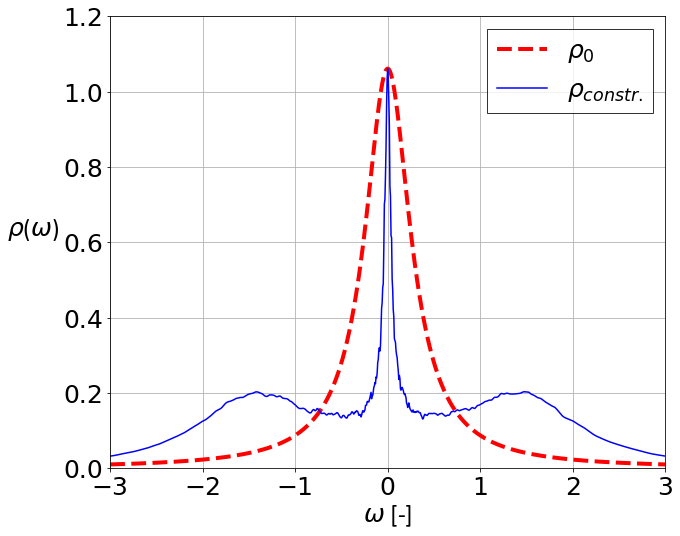

In [6]:
font = {'size'   : 25}
plt.rc('legend', fontsize=25)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,Lorentzian(np.linspace(-3,3,1001),0.3,4)[0], '--r',linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos3[0],'-b',label='$\\rho_{constr.}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('constraint.svg', format='svg', dpi=3600)

-3	0.0106713024872960704	0.0206317867719644638	0.0199530836583835698


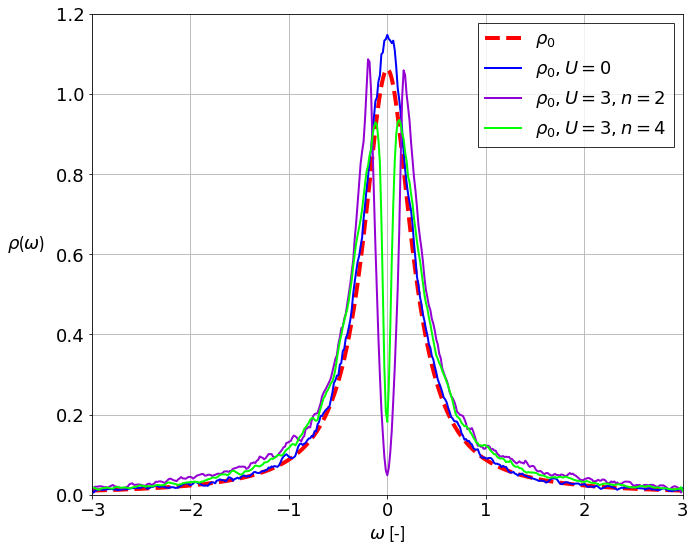

In [7]:
text_file = open("DOS_AIM030nclorentz4", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
#print(lines[1001])

fdos3=[[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    
font = {'size'   : 18}
plt.rc('legend', fontsize=18)
plt.rc('font', **font)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
axis_font = {'fontname':'Calibri', 'size':'18'}
plt.figure(figsize=(10,8))
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(np.linspace(-3,3,1001),Lorentzian(np.linspace(-3,3,1001),0.3,4)[0], '--r',linewidth=4,label='$\\rho_0$')
plt.plot(omega,fdos3[0],'-b',linewidth=2,label='$\\rho_0,\it{U=0}$')
plt.plot(omega,fdos3[1],color='darkviolet',linewidth=2,label='$\\rho_0,\it{U=3,n=2}$')
plt.plot(omega,fdos3[2],color='lime',linewidth=2,label='$\\rho_0,\it{U=3,n=4}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('selection.svg', format='svg', dpi=3600)

-3	0.0105052767717422665	0.0145788149098740778	0.0324942974564011028	0.0889619669612186637	0.183921762332056093	0.119408520588055178



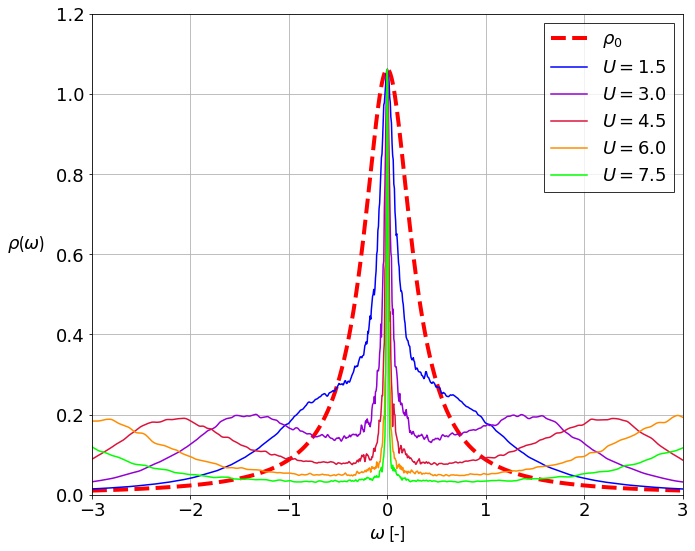

In [8]:
text_file = open("DOS_AIMseriesUncv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][2]))
    fdos3[1].append(np.real(lines[i][3]))
    fdos3[2].append(np.real(lines[i][4]))
    fdos3[3].append(np.real(lines[i][5]))
    fdos3[4].append(np.real(lines[i][6]))

font = {'size'   : 18}
plt.rc('legend', fontsize=18)
plt.rc('font', **font)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
axis_font = {'fontname':'Calibri', 'size':'18'}
plt.figure(figsize=(10,8))
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,Lorentzian(np.linspace(-3,3,1001),0.3,4)[0], '--r',linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos3[0],'-b',label='$\it{U=1.5}$')
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{U=3.0}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{U=4.5}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{U=6.0}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{U=7.5}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('U.svg', format='svg', dpi=3600)

-3	0.00529193493239884637	0.0191210490476750594	0.0327672759891306162	0.0399759083901227857	0.0428833735028005952	0.0442303901314106684



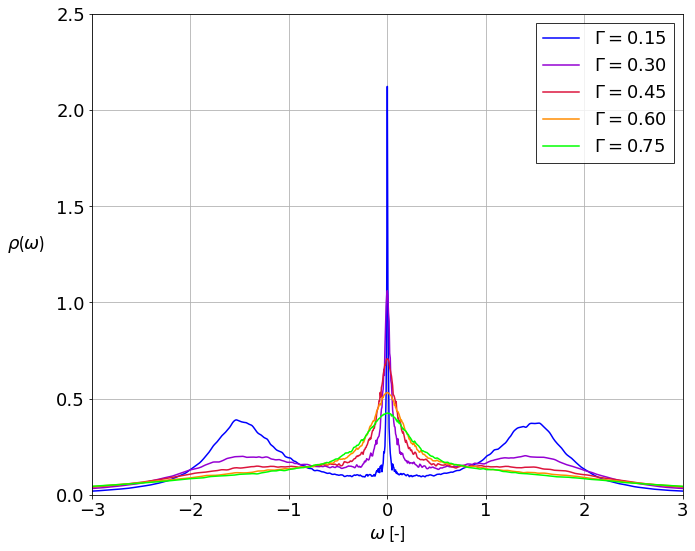

In [9]:
text_file = open("DOS_AIMseriesGammancv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][2]))
    fdos3[1].append(np.real(lines[i][3]))
    fdos3[2].append(np.real(lines[i][4]))
    fdos3[3].append(np.real(lines[i][5]))
    fdos3[4].append(np.real(lines[i][6]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 18}
plt.rc('legend', fontsize=18)
plt.rc('font', **font)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
axis_font = {'fontname':'Calibri', 'size':'18'}
plt.figure(figsize=(10,8))
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=2.5)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-3,3,1001),0.3,4)[0], '--r',linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\\Gamma\it{=0.45}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\\Gamma\it{=0.60}$')
plt.plot(omega, fdos3[4],color='lime',label='$\\Gamma\it{=0.75}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('Gamma.svg', format='svg', dpi=3600)

-3	0.0105052767717422665	0.0328684698066866038	0.0326017637796092372	0.0325177544875562136	0.0311806105352154389	0.0312065971918483349	0.0331893074036692798



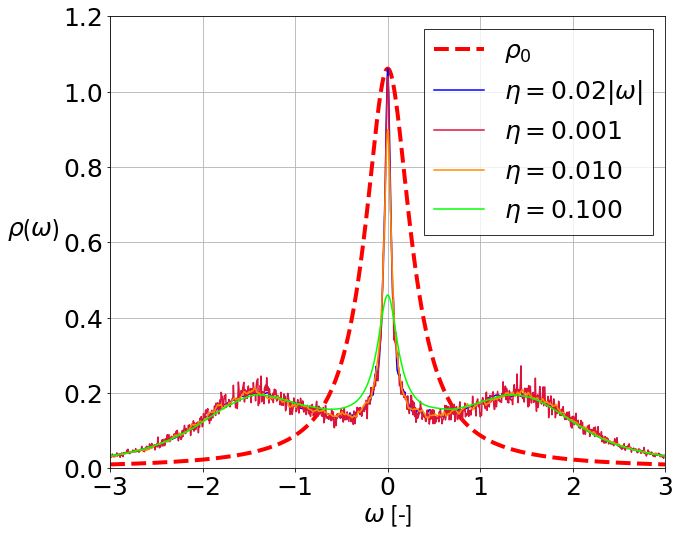

In [10]:
text_file = open("DOS_AIMseriesDeltancv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][2]))
    fdos3[1].append(np.real(lines[i][3]))
    fdos3[2].append(np.real(lines[i][4]))
    fdos3[3].append(np.real(lines[i][5]))
    fdos3[4].append(np.real(lines[i][6]))
    fdos3[5].append(np.real(lines[i][7]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=25)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,Lorentzian(np.linspace(-3,3,1001),0.3,4)[0], '--r',linewidth=4,label='$\\rho_0$')
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[1],'-b',label='$\\eta= 0.02|\\omega|$')
plt.plot(omega, fdos3[3],color='crimson',label='$\\eta= %.3f$'%0.001)
plt.plot(omega, fdos3[4],color='darkorange',label='$\\eta= %.3f$'%0.01)
plt.plot(omega, fdos3[5],color='lime',label='$\\eta= %.3f$'%0.1)
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('Eta.svg', format='svg', dpi=3600)

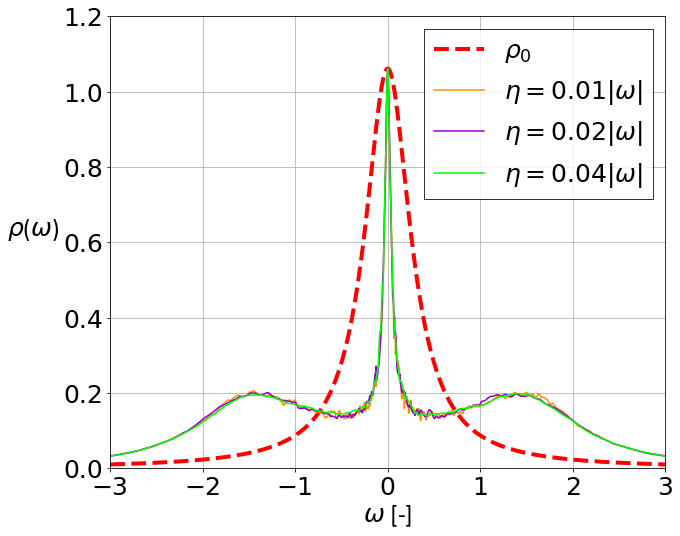

In [11]:
font = {'size'   : 25}
plt.rc('legend', fontsize=25)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,Lorentzian(np.linspace(-3,3,1001),0.3,4)[0], '--r',linewidth=4,label='$\\rho_0$')
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='darkorange',label='$\\eta=0.01|\\omega|$')
plt.plot(omega, fdos3[1],color='darkviolet',label='$\\eta=0.02|\\omega|$')
plt.plot(omega, fdos3[2],color='lime',label='$\\eta=0.04|\\omega|$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('Eta2.svg', format='svg', dpi=3600)

In [12]:
text_file = open("DOS_AIM030ncU3Sigmascv15v2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos2=[[]]
omega2=[]
for i in range(len(lines)-1):
    #print(i)
    omega2.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))

-4	0.0199761211428354096



-4	0.0189278908278645921



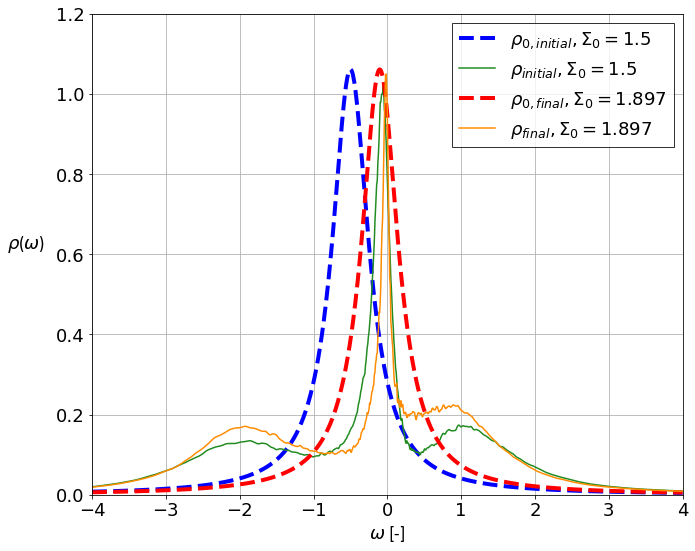

In [13]:
# Define rho0 distribution
def Lorentzian(omega, Gamma, poles,Sigma,Ed):
    Rho0=-np.imag(1/(omega-Ed-Sigma+1j*Gamma))/np.pi#
    #Rho0 = Gamma / np.pi / (omega ** 2 + Gamma ** 2)
    p = np.random.uniform(0, 1, poles)
    Rhoint = np.zeros(poles)
    for i in range(len(p)):
        Rhoint[i] = Gamma * math.tan(np.pi * (p[i] - 1 / 2))+Ed+Sigma   ###p[i]-1/2
    return Rho0, Rhoint

text_file = open("DOS_AIM030ncU3Sigmascv1897v2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    
font = {'size'   : 18}
plt.rc('legend', fontsize=18)
plt.rc('font', **font)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
axis_font = {'fontname':'Calibri', 'size':'18'}
plt.figure(figsize=(10,8))
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,Lorentzian(np.linspace(-4,4,1001),0.3,4,1.5,-2)[0], 
         '--b',linewidth=4,label='$\\rho_{0,initial},\\Sigma_0=1.5$')
plt.plot(omega2, fdos2[0],'forestgreen',label='$\\rho_{initial},\\Sigma_0=1.5$')
plt.plot(omega,Lorentzian(np.linspace(-4,4,1001),0.3,4,1.8972615999210367,-2)[0], 
         '--r',linewidth=4,label='$\\rho_{0,final},\\Sigma_0=1.897$')
plt.plot(omega, fdos3[0],'darkorange',label='$\\rho_{final},\\Sigma_0=1.897$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('AsymE-2.svg', format='svg', dpi=3600)

-4	0.0296804958018384683



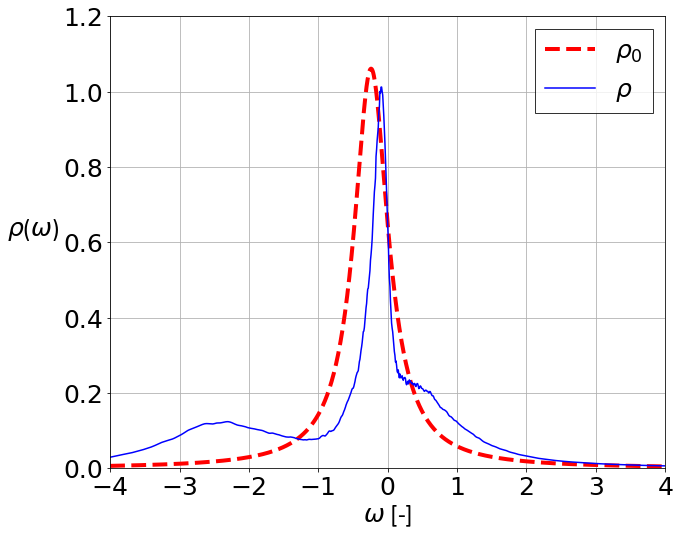

In [14]:
text_file = open("DOS_AIM030ncU3Sigmascv2260Ed-25v2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    
font = {'size'   : 25}
plt.rc('legend', fontsize=25)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-4,-3,-2,-1,0,1,2,3,4], minor=False)
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,Lorentzian(np.linspace(-4,4,1001),0.3,4,2.260389511754386,-2.5)[0], '--r',linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos3[0],'-b',label='$\\rho$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('AsymE-25.svg', format='svg', dpi=3600)

-4	0.0307451967403241343



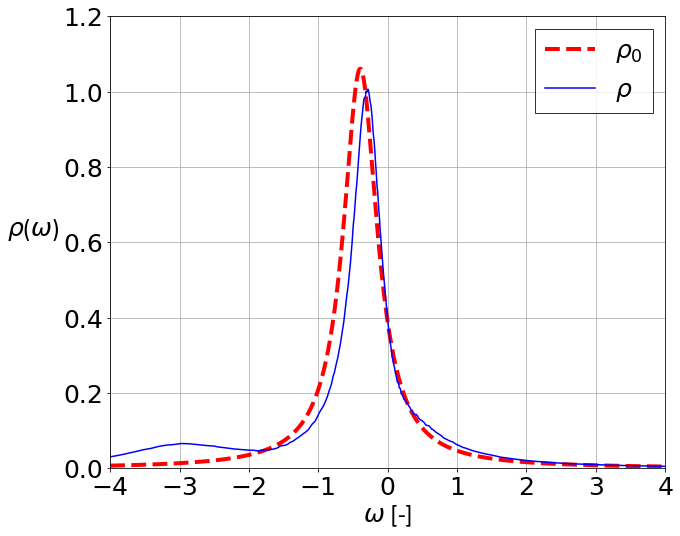

In [15]:
text_file = open("DOS_AIM030ncU3Sigmascv2604Ed-3v2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    
font = {'size'   : 25}
plt.rc('legend', fontsize=25)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-4,-3,-2,-1,0,1,2,3,4], minor=False)
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,Lorentzian(np.linspace(-4,4,1001),0.3,4,2.6047585462161376,-3)[0], '--r',linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos3[0],'-b',label='$\\rho$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('AsymE-3.svg', format='svg', dpi=3600)

[-1.0 0.0] 0
[-0.5 0.8660254037844386] 1
[-0.5 -0.8660254037844386] 2
[0.0 0.0] 3
[0.5 0.8660254037844386] 4
[0.5 -0.8660254037844386] 5
[1.0 0.0] 6
[-1.0 0.5773502691896258] 7
[-0.5 -0.28867513459481275] 8
[0.0 0.5773502691896258] 9
[0.0 -1.1547005383792515] 10
[0.5 -0.28867513459481275] 11
[1.0 0.5773502691896258] 12


<Figure size 720x576 with 0 Axes>

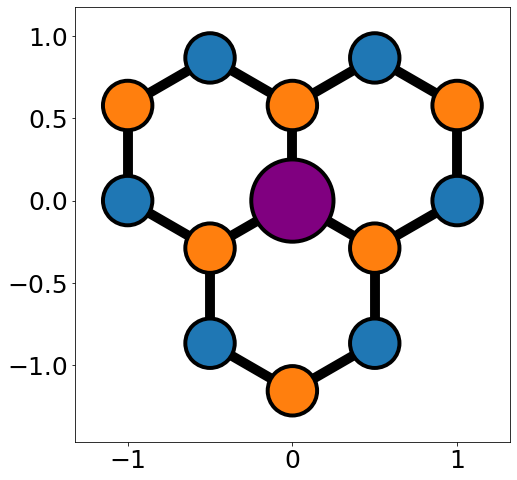

In [16]:
lat = kwant.lattice.honeycomb(norbs=1)
a, b = lat.sublattices

def make_system(r=1.5, t=1):

    def circle(pos):
        x, y = pos
        return x**2 + y**2 < r**2

    syst = kwant.Builder()
    syst[lat.shape(circle, (0, 0))] = 0
    syst[lat.neighbors()] = -t

    return syst
syst = make_system()
def plotsize(i):
    site = fsyst.sites[i]
    print(site.pos,i)
    return 0.208 if site.pos == [0.0,0.0] else 0.125

#def plotcolor(i):
#    site = fsyst.sites[i]
#    print(site.pos,i)
#    return 'black' if site.pos == [0.0,0.0] else 'blue'
def family_color(i):
    site = fsyst.sites[i]
    if site.pos == [0.0,0.0]:
        return 'purple'
    elif i<7:
        return (31/255,119/255,180/255,255/255)
    elif i>6:
        return (255/255,127/255,14/255,255/255)
fsyst=syst.finalized()
font = {'size'   : 25}
plt.rc('legend', fontsize=25)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
#plt.gca().set_ylim(bottom=-1.5,top=1.5)
plot=kwant.plot(fsyst,unit=1.2 ,hop_lw=0.05,site_size=plotsize,site_color=family_color,fig_size=[10,8],
                site_lw=0.02)
plot.tight_layout()
plot.savefig('Graphene15.svg', format='svg', dpi=3600)

-8	0.000923837355311878604	0.000994134859105353947	0.00128942968822104279	0.00192744573863232313	0.00277582770930142686
[(-3.9959999999999996+0j), (0.0033994534393605234+0j), (0.004777412110845845+0j), (0.01115585439835707+0j), (0.03839516535126482+0j), (0.025137838648148305+0j)]


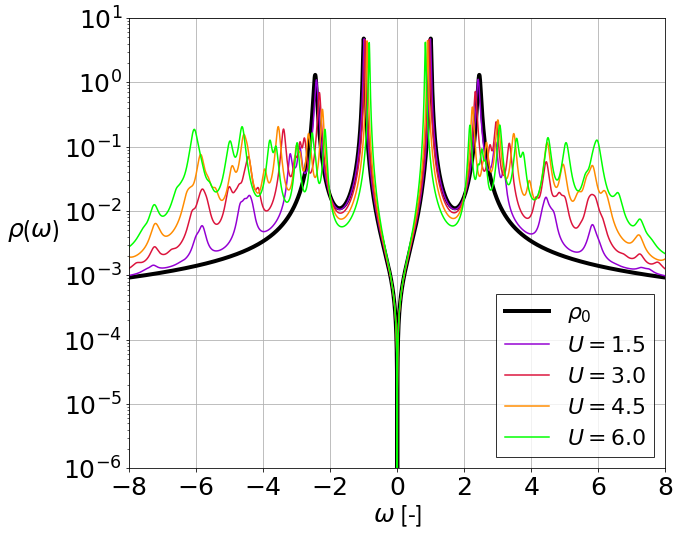

In [17]:
text_file = open("DOS_AIMGraphener=15Uncv3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=10)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(-8, 8)
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{U=1.5}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{U=3.0}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{U=4.5}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{U=6.0}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('Graphene15DOS.svg', format='svg', dpi=3600)

[-2.0 0.0] 0
[-1.5 0.8660254037844386] 1
[-1.0 1.7320508075688772] 2
[-1.5 -0.8660254037844386] 3
[-1.0 0.0] 4
[-0.5 0.8660254037844386] 5
[0.0 1.7320508075688772] 6
[-1.0 -1.7320508075688772] 7
[-0.5 -0.8660254037844386] 8
[0.0 0.0] 9
[0.5 0.8660254037844386] 10
[1.0 1.7320508075688772] 11
[0.0 -1.7320508075688772] 12
[0.5 -0.8660254037844386] 13
[1.0 0.0] 14
[1.5 0.8660254037844386] 15
[1.0 -1.7320508075688772] 16
[1.5 -0.8660254037844386] 17
[2.0 0.0] 18
[-2.0 0.5773502691896258] 19
[-1.5 1.4433756729740645] 20
[-1.5 -0.28867513459481275] 21
[-1.0 0.5773502691896258] 22
[-0.5 1.4433756729740645] 23
[-1.0 -1.1547005383792515] 24
[-0.5 -0.28867513459481275] 25
[0.0 0.5773502691896258] 26
[0.5 1.4433756729740645] 27
[-0.5 -2.0207259421636903] 28
[0.0 -1.1547005383792515] 29
[0.5 -0.28867513459481275] 30
[1.0 0.5773502691896258] 31
[1.5 1.4433756729740645] 32
[0.5 -2.0207259421636903] 33
[1.0 -1.1547005383792515] 34
[1.5 -0.28867513459481275] 35
[2.0 0.5773502691896258] 36


<Figure size 720x576 with 0 Axes>

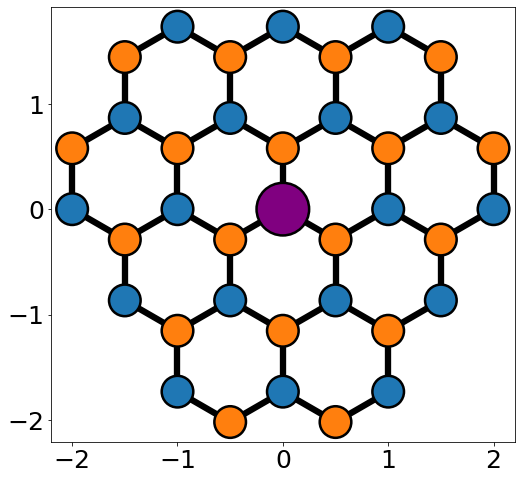

In [18]:
lat = kwant.lattice.honeycomb(norbs=1)
a, b = lat.sublattices

def make_system(r=2.3, t=1):

    def circle(pos):
        x, y = pos
        return x**2 + y**2 < r**2

    syst = kwant.Builder()
    syst[lat.shape(circle, (0, 0))] = 0
    syst[lat.neighbors()] = -t

    return syst
syst = make_system()
def plotsize(i):
    site = fsyst.sites[i]
    print(site.pos,i)
    return 0.208 if site.pos == [0.0,0.0] else 0.125

#def plotcolor(i):
#    site = fsyst.sites[i]
#    print(site.pos,i)
#    return 'black' if site.pos == [0.0,0.0] else 'blue'
def family_color(i):
    site = fsyst.sites[i]
    if site.pos == [0.0,0.0]:
        return 'purple'
    elif i<19:
        return (31/255,119/255,180/255,255/255)
    else:
        return (255/255,127/255,14/255,255/255)
fsyst=syst.finalized()
font = {'size'   : 25}
plt.rc('legend', fontsize=25)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
#plt.gca().set_ylim(bottom=-1.5,top=1.5)
plot=kwant.plot(fsyst,unit=1.2 ,hop_lw=0.05,site_size=plotsize,site_color=family_color,fig_size=[10,8],
                site_lw=0.02)
plot.tight_layout()
plot.savefig('Graphene23.svg', format='svg', dpi=3600)

-8	0.000924030230552932703	0.00105888931531213418	0.001553137697755978	0.00294075882585171375	0.00475075660193362715
[(-3.9959999999999996+0j), (0.0035199388954235762+0j), (0.012588056091101687+0j), (0.025183524410328468+0j), (0.03598602680604437+0j), (0.033684746847266495+0j)]


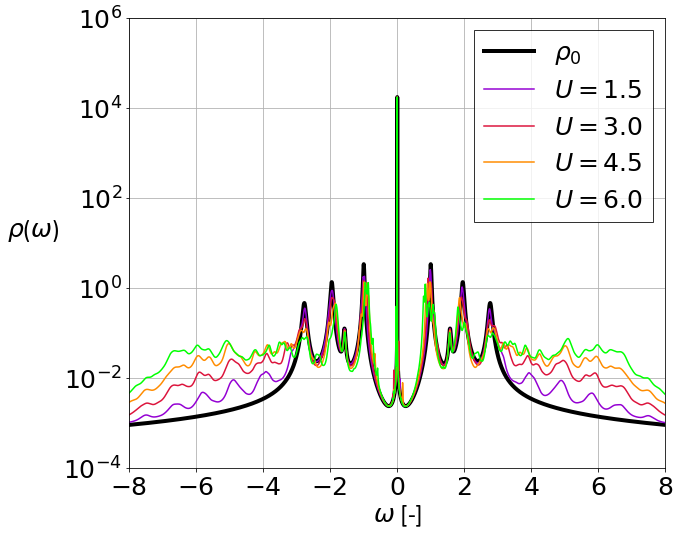

In [19]:
text_file = open("DOS_AIMGraphener=23Uncv3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=25)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.0001,top=1000000)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{U=1.5}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{U=3.0}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{U=4.5}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{U=6.0}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('Graphene23DOS.svg', format='svg', dpi=3600)

[-3.0 0.0] 0
[-2.5 0.8660254037844386] 1
[-2.0 1.7320508075688772] 2
[-1.5 2.598076211353316] 3
[-2.5 -0.8660254037844386] 4
[-2.0 0.0] 5
[-1.5 0.8660254037844386] 6
[-1.0 1.7320508075688772] 7
[-0.5 2.598076211353316] 8
[-2.0 -1.7320508075688772] 9
[-1.5 -0.8660254037844386] 10
[-1.0 0.0] 11
[-0.5 0.8660254037844386] 12
[0.0 1.7320508075688772] 13
[0.5 2.598076211353316] 14
[-1.5 -2.598076211353316] 15
[-1.0 -1.7320508075688772] 16
[-0.5 -0.8660254037844386] 17
[0.0 0.0] 18
[0.5 0.8660254037844386] 19
[1.0 1.7320508075688772] 20
[1.5 2.598076211353316] 21
[-0.5 -2.598076211353316] 22
[0.0 -1.7320508075688772] 23
[0.5 -0.8660254037844386] 24
[1.0 0.0] 25
[1.5 0.8660254037844386] 26
[2.0 1.7320508075688772] 27
[0.5 -2.598076211353316] 28
[1.0 -1.7320508075688772] 29
[1.5 -0.8660254037844386] 30
[2.0 0.0] 31
[2.5 0.8660254037844386] 32
[1.5 -2.598076211353316] 33
[2.0 -1.7320508075688772] 34
[2.5 -0.8660254037844386] 35
[3.0 0.0] 36
[-3.0 0.5773502691896258] 37
[-2.5 1.4433756729740645] 

<Figure size 720x576 with 0 Axes>

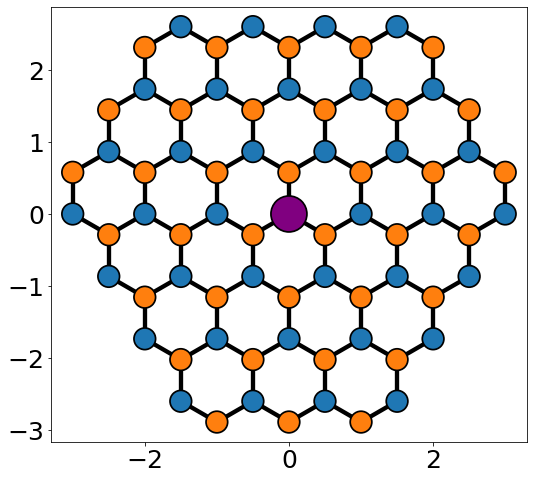

In [20]:
lat = kwant.lattice.honeycomb(norbs=1)
a, b = lat.sublattices

def make_system(r=3.1, t=1):

    def circle(pos):
        x, y = pos
        return x**2 + y**2 < r**2

    syst = kwant.Builder()
    syst[lat.shape(circle, (0, 0))] = 0
    syst[lat.neighbors()] = -t

    return syst
syst = make_system()
def plotsize(i):
    site = fsyst.sites[i]
    print(site.pos,i)
    return 0.208 if site.pos == [0.0,0.0] else 0.125

#def plotcolor(i):
#    site = fsyst.sites[i]
#    print(site.pos,i)
#    return 'black' if site.pos == [0.0,0.0] else 'blue'
def family_color(i):
    site = fsyst.sites[i]
    if site.pos == [0.0,0.0]:
        return 'purple'
    elif i<37:
        return (31/255,119/255,180/255,255/255)
    else:
        return (255/255,127/255,14/255,255/255)
fsyst=syst.finalized()
font = {'size'   : 25}
plt.rc('legend', fontsize=25)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
#plt.gca().set_ylim(bottom=-1.5,top=1.5)
plot=kwant.plot(fsyst,unit=1.2 ,hop_lw=0.05,site_size=plotsize,site_color=family_color,fig_size=[10,8],
                site_lw=0.02)
plot.tight_layout()
plot.savefig('Graphene31.svg', format='svg', dpi=3600)

-8	0.000924030496551243754	0.00106745913695221084	0.00162618783447603305	0.00291437561662758089	0.0053571334120513063
[(-3.9959999999999996+0j), (0.003525630791193753+0j), (0.0071433156129544996+0j), (0.023395485325036807+0j), (0.04475153010397066+0j), (0.04159150384341994+0j)]


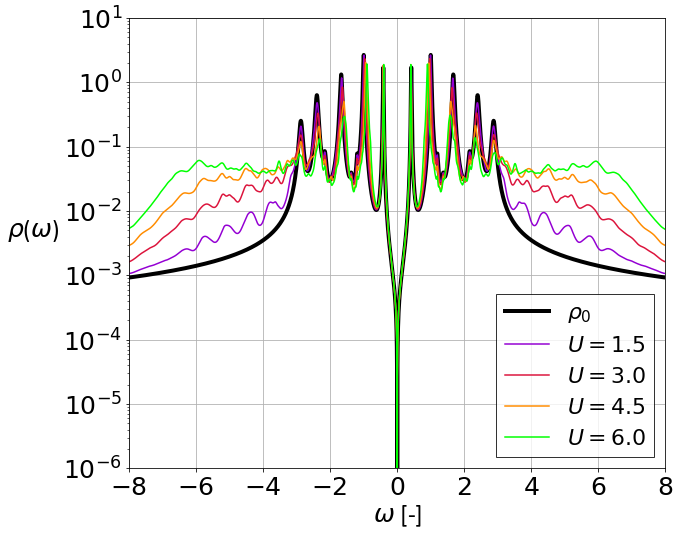

In [21]:
text_file = open("DOS_AIMGraphener=31Uncv3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=10)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{U=1.5}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{U=3.0}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{U=4.5}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{U=6.0}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('Graphene31DOS.svg', format='svg', dpi=3600)

[-4.0 0.0] 0
[-3.5 0.8660254037844386] 1
[-3.0 1.7320508075688772] 2
[-2.5 2.598076211353316] 3
[-2.0 3.4641016151377544] 4
[-3.5 -0.8660254037844386] 5
[-3.0 0.0] 6
[-2.5 0.8660254037844386] 7
[-2.0 1.7320508075688772] 8
[-1.5 2.598076211353316] 9
[-1.0 3.4641016151377544] 10
[-3.0 -1.7320508075688772] 11
[-2.5 -0.8660254037844386] 12
[-2.0 0.0] 13
[-1.5 0.8660254037844386] 14
[-1.0 1.7320508075688772] 15
[-0.5 2.598076211353316] 16
[0.0 3.4641016151377544] 17
[-2.5 -2.598076211353316] 18
[-2.0 -1.7320508075688772] 19
[-1.5 -0.8660254037844386] 20
[-1.0 0.0] 21
[-0.5 0.8660254037844386] 22
[0.0 1.7320508075688772] 23
[0.5 2.598076211353316] 24
[1.0 3.4641016151377544] 25
[-2.0 -3.4641016151377544] 26
[-1.5 -2.598076211353316] 27
[-1.0 -1.7320508075688772] 28
[-0.5 -0.8660254037844386] 29
[0.0 0.0] 30
[0.5 0.8660254037844386] 31
[1.0 1.7320508075688772] 32
[1.5 2.598076211353316] 33
[2.0 3.4641016151377544] 34
[-1.0 -3.4641016151377544] 35
[-0.5 -2.598076211353316] 36
[0.0 -1.732050807

<Figure size 720x576 with 0 Axes>

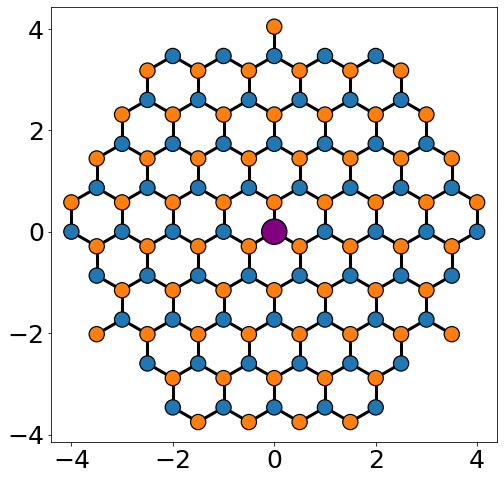

In [22]:
lat = kwant.lattice.honeycomb(norbs=1)
a, b = lat.sublattices

def make_system(r=4.042, t=1):

    def circle(pos):
        x, y = pos
        return x**2 + y**2 < r**2

    syst = kwant.Builder()
    syst[lat.shape(circle, (0, 0))] = 0
    syst[lat.neighbors()] = -t

    return syst
syst = make_system()
def plotsize(i):
    site = fsyst.sites[i]
    print(site.pos,i)
    return 0.208 if site.pos == [0.0,0.0] else 0.125

#def plotcolor(i):
#    site = fsyst.sites[i]
#    print(site.pos,i)
#    return 'black' if site.pos == [0.0,0.0] else 'blue'
def family_color(i):
    site = fsyst.sites[i]
    if site.pos == [0.0,0.0]:
        return 'purple'
    elif i<61:
        return (31/255,119/255,180/255,255/255)
    else:
        return (255/255,127/255,14/255,255/255)
fsyst=syst.finalized()
font = {'size'   : 25}
plt.rc('legend', fontsize=25)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
#plt.gca().set_ylim(bottom=-1.5,top=1.5)
plot=kwant.plot(fsyst,unit=1.2 ,hop_lw=0.05,site_size=plotsize,site_color=family_color,fig_size=[10,8],
                site_lw=0.02)
plot.tight_layout()
plot.savefig('Graphene4042.svg', format='svg', dpi=3600)

-8	0.000924030496899280458	0.00109085320729584751	0.00164769773535707455	0.0028190750011572209	0.00523898293424406372
[(-3.9959999999999996+0j), (0.0035258724320458078+0j), (0.00981063862545401+0j), (0.025883328126499947+0j), (0.04150324299952262+0j), (0.04417818189889494+0j)]


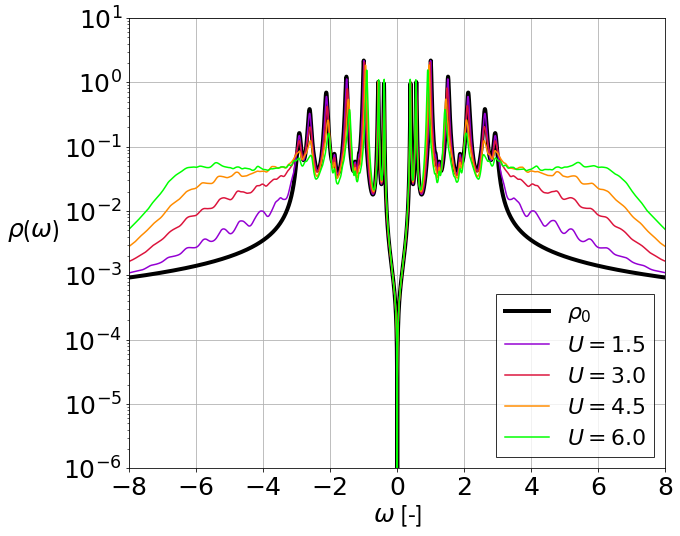

In [23]:
text_file = open("DOS_AIMGraphener=4042Uncv3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=10)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{U=1.5}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{U=3.0}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{U=4.5}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{U=6.0}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('Graphene4042DOS.svg', format='svg', dpi=3600)

[-5.0 0.0] 0
[-4.5 0.8660254037844386] 1
[-4.0 1.7320508075688772] 2
[-3.5 2.598076211353316] 3
[-3.0 3.4641016151377544] 4
[-2.5 4.330127018922193] 5
[-4.5 -0.8660254037844386] 6
[-4.0 0.0] 7
[-3.5 0.8660254037844386] 8
[-3.0 1.7320508075688772] 9
[-2.5 2.598076211353316] 10
[-2.0 3.4641016151377544] 11
[-1.5 4.330127018922193] 12
[-4.0 -1.7320508075688772] 13
[-3.5 -0.8660254037844386] 14
[-3.0 0.0] 15
[-2.5 0.8660254037844386] 16
[-2.0 1.7320508075688772] 17
[-1.5 2.598076211353316] 18
[-1.0 3.4641016151377544] 19
[-0.5 4.330127018922193] 20
[-3.5 -2.598076211353316] 21
[-3.0 -1.7320508075688772] 22
[-2.5 -0.8660254037844386] 23
[-2.0 0.0] 24
[-1.5 0.8660254037844386] 25
[-1.0 1.7320508075688772] 26
[-0.5 2.598076211353316] 27
[0.0 3.4641016151377544] 28
[0.5 4.330127018922193] 29
[-3.0 -3.4641016151377544] 30
[-2.5 -2.598076211353316] 31
[-2.0 -1.7320508075688772] 32
[-1.5 -0.8660254037844386] 33
[-1.0 0.0] 34
[-0.5 0.8660254037844386] 35
[0.0 1.7320508075688772] 36
[0.5 2.59807621

<Figure size 720x576 with 0 Axes>

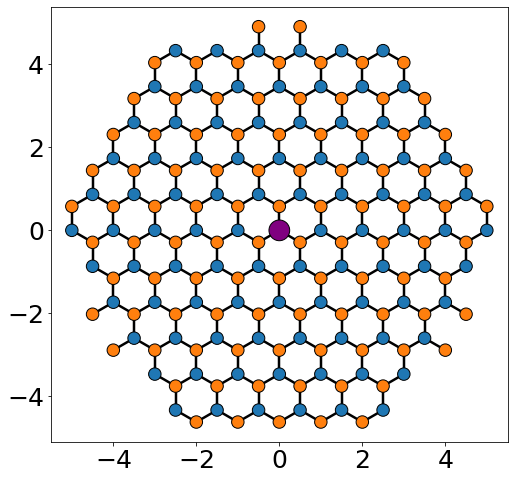

In [24]:
lat = kwant.lattice.honeycomb(norbs=1)
a, b = lat.sublattices

def make_system(r=5.1, t=1):

    def circle(pos):
        x, y = pos
        return x**2 + y**2 < r**2

    syst = kwant.Builder()
    syst[lat.shape(circle, (0, 0))] = 0
    syst[lat.neighbors()] = -t

    return syst
syst = make_system()
def plotsize(i):
    site = fsyst.sites[i]
    print(site.pos,i)
    return 0.208 if site.pos == [0.0,0.0] else 0.125

#def plotcolor(i):
#    site = fsyst.sites[i]
#    print(site.pos,i)
#    return 'black' if site.pos == [0.0,0.0] else 'blue'
def family_color(i):
    site = fsyst.sites[i]
    if site.pos == [0.0,0.0]:
        return 'purple'
    elif i<91:
        return (31/255,119/255,180/255,255/255)
    else:
        return (255/255,127/255,14/255,255/255)
fsyst=syst.finalized()
font = {'size'   : 25}
plt.rc('legend', fontsize=25)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
#plt.gca().set_ylim(bottom=-1.5,top=1.5)
plot=kwant.plot(fsyst,unit=1.2 ,hop_lw=0.05,site_size=plotsize,site_color=family_color,fig_size=[10,8],
                site_lw=0.02)
plot.tight_layout()
plot.savefig('Graphene51.svg', format='svg', dpi=3600)

-8	0.000924030496899529499	0.00107579911886271839	0.00164403865628491314	0.00290209020389188424	0.00520317369921030268
[(-3.9959999999999996+0j), (0.0035258799149540665+0j), (0.009388049010851097+0j), (0.02449818409871557+0j), (0.040975799634380757+0j), (0.04290819771415719+0j)]


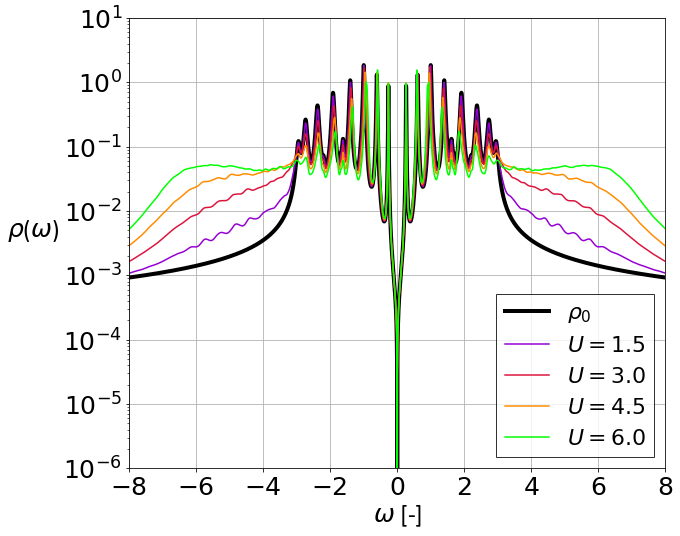

In [25]:
text_file = open("DOS_AIMGraphener=51Uncv3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=10)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{U=1.5}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{U=3.0}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{U=4.5}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{U=6.0}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('Graphene51DOS.svg', format='svg', dpi=3600)

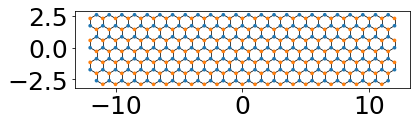

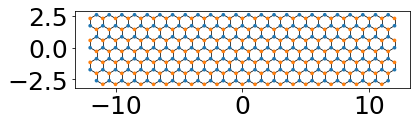

[-12.0 1.7320508075688772] 0
[-11.5 2.598076211353316] 1
[-12.0 0.0] 2
[-11.5 0.8660254037844386] 3
[-11.0 1.7320508075688772] 4
[-10.5 2.598076211353316] 5
[-12.0 -1.7320508075688772] 6
[-11.5 -0.8660254037844386] 7
[-11.0 0.0] 8
[-10.5 0.8660254037844386] 9
[-10.0 1.7320508075688772] 10
[-9.5 2.598076211353316] 11
[-11.5 -2.598076211353316] 12
[-11.0 -1.7320508075688772] 13
[-10.5 -0.8660254037844386] 14
[-10.0 0.0] 15
[-9.5 0.8660254037844386] 16
[-9.0 1.7320508075688772] 17
[-8.5 2.598076211353316] 18
[-10.5 -2.598076211353316] 19
[-10.0 -1.7320508075688772] 20
[-9.5 -0.8660254037844386] 21
[-9.0 0.0] 22
[-8.5 0.8660254037844386] 23
[-8.0 1.7320508075688772] 24
[-7.5 2.598076211353316] 25
[-9.5 -2.598076211353316] 26
[-9.0 -1.7320508075688772] 27
[-8.5 -0.8660254037844386] 28
[-8.0 0.0] 29
[-7.5 0.8660254037844386] 30
[-7.0 1.7320508075688772] 31
[-6.5 2.598076211353316] 32
[-8.5 -2.598076211353316] 33
[-8.0 -1.7320508075688772] 34
[-7.5 -0.8660254037844386] 35
[-7.0 0.0] 36
[-6.5 

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

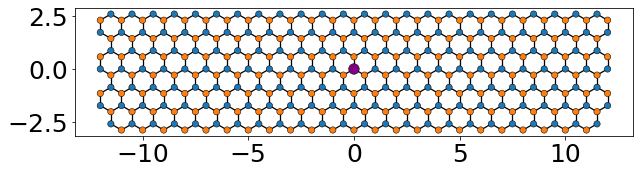

In [26]:
prim_vecs = [[1, 0], [0.5, sqrt(3)/2]]  # bravais lattice vectors
# offset the lattice so that it is symmetric around x and y axes
basis_vecs = [[0, 1/sqrt(3)], [0, 0]]        
lat=kwant.lattice.Polyatomic(prim_vecs,basis_vecs)

def ribbon(W, L):
    def shape(pos):
        return (-L <= pos[0] <= L and -W <= pos[1] <= W)
    return shape

pv1, pv2 = lat.prim_vecs
xsym = kwant.TranslationalSymmetry(pv1)  # lattice symmetry in -x direction
def create_lead_h(W,L, symmetry, axis=(0, 0)):
    lead = kwant.Builder(symmetry)
    lead[lat.shape(ribbon(W, L), (0, 0))] = 0
    lead[lat.neighbors(1)] = -1
    return lead

def ribbonoffset(W, L,x,y):
    def shape(pos):
        return (-L <= pos[0]-x <= L and -W <= pos[1]-y <= W)
    return shape

def create_system(W, L):
    sys = kwant.Builder()
    sys[lat.shape(ribbon(W, L), (0, 0))] = 0
    del sys[lat.shape(ribbonoffset(0, 0,12,-2.8867513459481287), (12, -2.8867513459481287))]
    del sys[lat.shape(ribbonoffset(0, 0,-12,-2.8867513459481287), (-12, -2.8867513459481287))]
    sys[lat.neighbors(1)] = -1
    leads = [create_lead_h(W,L, xsym)]
    leads += [lead.reversed() for lead in leads]
    kwant.plot(sys)
    #for lead in leads:
    #    sys.attach_lead(lead)
    return sys

if __name__ == '__main__':
    syst = create_system(3, 12)
    kwant.plot(syst)
    fsyst=syst.finalized()
    siteN=0
    def plotsize(i):
        site = fsyst.sites[i]
        print(site.pos,i)
        return 0.208 if site.pos == [0.0,0.0] else 0.125
    def family_color(i):
        site = fsyst.sites[i]
        if site.pos == [0.0,0.0]:
            return 'purple'
        elif i<171:
            return (31/255,119/255,180/255,255/255)
        else:
            return (255/255,127/255,14/255,255/255)
    plt.figure(figsize=(10,8))
    font = {'size'   : 25}
    plt.rc('legend', fontsize=25)
    plt.rc('font', **font)
    plt.rc('xtick', labelsize=25)
    plt.rc('ytick', labelsize=25)
    axis_font = {'fontname':'Calibri', 'size':'25'}
    plt.figure(figsize=(10,8))
    plot=kwant.plot(fsyst,unit=1.2 ,hop_lw=0.05,site_size=plotsize,site_color=family_color,fig_size=[10,8],
                site_lw=0.02)
    plot.tight_layout()
    plot.savefig('armchair.svg', format='svg', dpi=3600)

-8	0.000924030496783037722	0.00107461468834752069	0.00165215144451925575	0.0028941552150517592	0.00523808648760411104
[(-3.9959999999999996+0j), (0.003525792224035079+0j), (0.008855007307875256+0j), (0.02457010572470509+0j), (0.03887501795266769+0j), (0.04373648733514921+0j)]


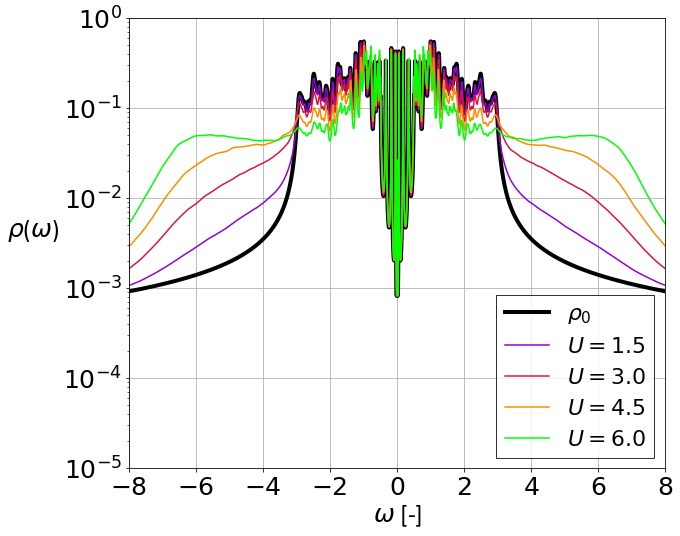

In [27]:
text_file = open("DOS_AIMGraphenenanoribUncv21v3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.00001,top=1)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{U=1.5}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{U=3.0}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{U=4.5}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{U=6.0}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,bbox_to_anchor=(1,0.41)).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('armchairDOS.svg', format='svg', dpi=3600)

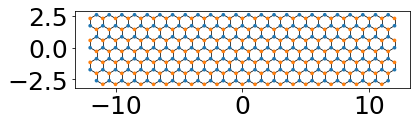

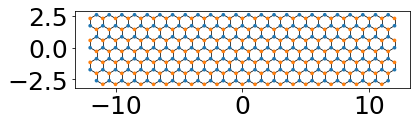

[-12.0 1.7320508075688772] 0
[-11.5 2.598076211353316] 1
[-12.0 0.0] 2
[-11.5 0.8660254037844386] 3
[-11.0 1.7320508075688772] 4
[-10.5 2.598076211353316] 5
[-12.0 -1.7320508075688772] 6
[-11.5 -0.8660254037844386] 7
[-11.0 0.0] 8
[-10.5 0.8660254037844386] 9
[-10.0 1.7320508075688772] 10
[-9.5 2.598076211353316] 11
[-11.5 -2.598076211353316] 12
[-11.0 -1.7320508075688772] 13
[-10.5 -0.8660254037844386] 14
[-10.0 0.0] 15
[-9.5 0.8660254037844386] 16
[-9.0 1.7320508075688772] 17
[-8.5 2.598076211353316] 18
[-10.5 -2.598076211353316] 19
[-10.0 -1.7320508075688772] 20
[-9.5 -0.8660254037844386] 21
[-9.0 0.0] 22
[-8.5 0.8660254037844386] 23
[-8.0 1.7320508075688772] 24
[-7.5 2.598076211353316] 25
[-9.5 -2.598076211353316] 26
[-9.0 -1.7320508075688772] 27
[-8.5 -0.8660254037844386] 28
[-8.0 0.0] 29
[-7.5 0.8660254037844386] 30
[-7.0 1.7320508075688772] 31
[-6.5 2.598076211353316] 32
[-8.5 -2.598076211353316] 33
[-8.0 -1.7320508075688772] 34
[-7.5 -0.8660254037844386] 35
[-7.0 0.0] 36
[-6.5 

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

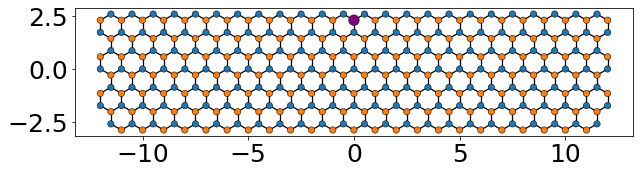

In [28]:
prim_vecs = [[1, 0], [0.5, sqrt(3)/2]]  # bravais lattice vectors
# offset the lattice so that it is symmetric around x and y axes
basis_vecs = [[0, 1/sqrt(3)], [0, 0]]        
lat=kwant.lattice.Polyatomic(prim_vecs,basis_vecs)

def ribbon(W, L):
    def shape(pos):
        return (-L <= pos[0] <= L and -W <= pos[1] <= W)
    return shape

pv1, pv2 = lat.prim_vecs
xsym = kwant.TranslationalSymmetry(pv1)  # lattice symmetry in -x direction
def create_lead_h(W,L, symmetry, axis=(0, 0)):
    lead = kwant.Builder(symmetry)
    lead[lat.shape(ribbon(W, L), (0, 0))] = 0
    lead[lat.neighbors(1)] = -1
    return lead

def ribbonoffset(W, L,x,y):
    def shape(pos):
        return (-L <= pos[0]-x <= L and -W <= pos[1]-y <= W)
    return shape

def create_system(W, L):
    sys = kwant.Builder()
    sys[lat.shape(ribbon(W, L), (0, 0))] = 0
    del sys[lat.shape(ribbonoffset(0, 0,12,-2.8867513459481287), (12, -2.8867513459481287))]
    del sys[lat.shape(ribbonoffset(0, 0,-12,-2.8867513459481287), (-12, -2.8867513459481287))]
    sys[lat.neighbors(1)] = -1
    leads = [create_lead_h(W,L, xsym)]
    leads += [lead.reversed() for lead in leads]
    kwant.plot(sys)
    #for lead in leads:
    #    sys.attach_lead(lead)
    return sys

if __name__ == '__main__':
    syst = create_system(3, 12)
    kwant.plot(syst)
    fsyst=syst.finalized()
    siteN=0
    def plotsize(i):
        site = fsyst.sites[i]
        print(site.pos,i)
        return 0.208 if site.pos == [0.0,2.309401076758503] else 0.125
    def family_color(i):
        site = fsyst.sites[i]
        if site.pos == [0.0,2.309401076758503]:
            return 'purple'
        elif i<171:
            return (31/255,119/255,180/255,255/255)
        else:
            return (255/255,127/255,14/255,255/255)
    plt.figure(figsize=(10,8))
    font = {'size'   : 25}
    plt.rc('legend', fontsize=25)
    plt.rc('font', **font)
    plt.rc('xtick', labelsize=25)
    plt.rc('ytick', labelsize=25)
    axis_font = {'fontname':'Calibri', 'size':'25'}
    plt.figure(figsize=(10,8))
    plot=kwant.plot(fsyst,unit=1.2 ,hop_lw=0.05,site_size=plotsize,site_color=family_color,fig_size=[10,8],
                site_lw=0.02)
    plot.tight_layout()
    plot.savefig('armchair2.svg', format='svg', dpi=3600)

-8	0.000921469589217014436	0.00102125876190979387	0.00140512018132176657	0.00232243227214056804	0.00412861400934214778
[(-3.9959999999999996+0j), (0.003260727603070966+0j), (0.008526494448123041+0j), (0.0214509459928955+0j), (0.033324812205307676+0j), (0.03314890376866407+0j)]


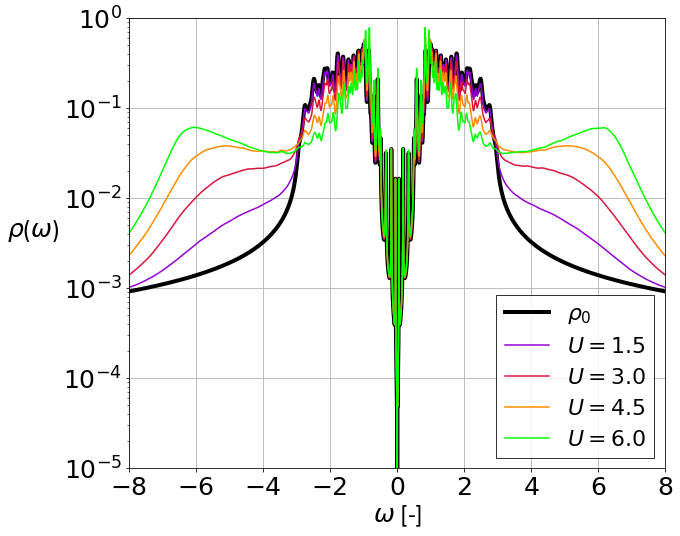

In [29]:
text_file = open("DOS_AIMGraphenenanoribUncv21v2rv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.00001,top=1)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{U=1.5}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{U=3.0}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{U=4.5}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{U=6.0}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,bbox_to_anchor=(1,0.41)).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('armchair2DOS.svg', format='svg', dpi=3600)

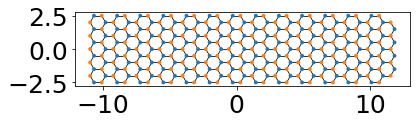

[-10.680979980008077 -2.5] 0
[-10.680979980008077 -1.5] 1
[-10.680979980008077 -0.5] 2
[-10.680979980008077 0.5] 3
[-10.680979980008077 1.5] 4
[-10.680979980008077 2.5] 5
[-9.814954576223638 -2.0] 6
[-9.814954576223638 -1.0] 7
[-9.814954576223638 0.0] 8
[-9.814954576223638 1.0] 9
[-9.814954576223638 2.0] 10
[-8.948929172439199 -2.5] 11
[-8.948929172439199 -1.5] 12
[-8.948929172439199 -0.5] 13
[-8.948929172439199 0.5] 14
[-8.948929172439199 1.5] 15
[-8.948929172439199 2.5] 16
[-8.08290376865476 -2.0] 17
[-8.08290376865476 -1.0] 18
[-8.08290376865476 0.0] 19
[-8.08290376865476 1.0] 20
[-8.08290376865476 2.0] 21
[-7.216878364870322 -2.5] 22
[-7.216878364870322 -1.5] 23
[-7.216878364870322 -0.5] 24
[-7.216878364870322 0.5] 25
[-7.216878364870322 1.5] 26
[-7.216878364870322 2.5] 27
[-6.3508529610858835 -2.0] 28
[-6.3508529610858835 -1.0] 29
[-6.3508529610858835 0.0] 30
[-6.3508529610858835 1.0] 31
[-6.3508529610858835 2.0] 32
[-5.484827557301445 -2.5] 33
[-5.484827557301445 -1.5] 34
[-5.484

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

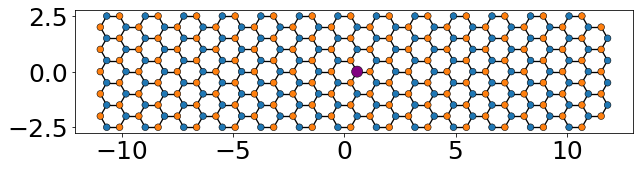

In [30]:
class Honeycomb(kwant.lattice.Polyatomic):
    """Honeycomb lattice with methods for dealing with hexagons"""
    def __init__(self, name=''):
        prim_vecs = [[sqrt(3)/2, 0.5], [0, 1]]  # bravais lattice vectors
        # offset the lattice so that it is symmetric around x and y axes
        basis_vecs = [[-1/sqrt(12), -0.5], [1/sqrt(12), -0.5]]
        super(Honeycomb, self).__init__(prim_vecs, basis_vecs, name)
        self.a, self.b = self.sublattices
    def hexagon(self, tag):
        """ Get sites belonging to hexagon with the given tag.
            Returns sites in counter-clockwise order starting
            from the lower-left site. """
        tag = ta.array(tag)
        #         a-sites b-sites
        deltas = [(0, 0), (0, 0),
                  (1, 0), (0, 1),
                  (0, 1), (-1, 1)]
        lats = it.cycle(self.sublattices)
        return (lat(*(tag + delta)) for lat, delta in zip(lats, deltas))
    def hexagon_neighbors(self, tag, n=1):
        """ Get n'th nearest neighbor hoppings within the hexagon with
            the given tag."""
        hex_sites = list(self.hexagon(tag))
        return ((hex_sites[(i+n)%6], hex_sites[i%6]) for i in xrange(6))
def ribbon(W, L):
    def shape(pos):
        return (-L <= pos[0] <= L and -W <= pos[1] <= W)
    return shape

lat = Honeycomb()
pv1, pv2 = lat.prim_vecs
xsym = kwant.TranslationalSymmetry(pv2 - 2*pv1)  # lattice symmetry in -x direction
ysym = kwant.TranslationalSymmetry(-pv2)  # lattice symmetry in -y direction

def create_lead_h(W, symmetry, axis=(0, 0)):
    lead = kwant.Builder(symmetry)
    lead[lat.wire(axis, W)] = 0
    lead[lat.neighbors(1)] = -1
    return lead

def ribbonoffset(W, L,x,y):
    def shape(pos):
        return (-L <= pos[0]-x <= L and -W <= pos[1]-y <= W)
    return shape

def create_system(W, L):
    ## scattering region ##
    sys = kwant.Builder()
    sys[lat.shape(ribbon(W, L), (0, 0))] = 0
    #del sys[lat.shape(ribbon(0.2, 0.2), (12,2.8867513459481287))]
    del sys[lat.shape(ribbonoffset(2.5, 0.5,-11.835680518387328, 0), (-11.835680518387328, 0))]
    #del sys[lat.shape(ribbonoffset(0, 0,-11.835680518387328, 2.5), (-11.835680518387328, 2.5))]
    del sys[lat.shape(ribbonoffset(0, 0,11.835680518387328, -2.5), (11.835680518387328, -2.5))]
    del sys[lat.shape(ribbonoffset(0, 0,11.835680518387328, 2.5), (11.835680518387328, 2.5))]
    sys[lat.neighbors(1)] = -1

    ## leads ##
    leads = [create_lead_h(W, xsym)]
    leads += [lead.reversed() for lead in leads]  # right lead
    kwant.plot(sys)
    #for lead in leads:
    #    sys.attach_lead(lead)
    return sys

if __name__ == '__main__':
    syst = create_system(2.5, 12)
    #kwant.plot(syst)
    fsyst=syst.finalized()
    def plotsize(i):
        site = fsyst.sites[i]
        print(site.pos,i)
        return 0.208 if site.pos == [0.5773502691896257,0.0] else 0.125
    def family_color(i):
        site = fsyst.sites[i]
        if site.pos == [0.5773502691896257,0.0]:
            return 'purple'
        elif i<147:
            return (31/255,119/255,180/255,255/255)
        else:
            return (255/255,127/255,14/255,255/255)
    plt.figure(figsize=(10,8))
    font = {'size'   : 25}
    plt.rc('legend', fontsize=25)
    plt.rc('font', **font)
    plt.rc('xtick', labelsize=25)
    plt.rc('ytick', labelsize=25)
    axis_font = {'fontname':'Calibri', 'size':'25'}
    plt.figure(figsize=(10,8))
    plot=kwant.plot(fsyst,unit=1.2 ,hop_lw=0.05,site_size=plotsize,site_color=family_color,fig_size=[10,8],
                site_lw=0.02)
    plot.tight_layout()
    plot.savefig('zigzag.svg', format='svg', dpi=3600)

-8	0.000924030496018378228	0.00107141848824618934	0.00163596522314543992	0.00291508459217028381	0.00522448485280331987
[(-3.9959999999999996+0j), (0.003525637175243085+0j), (0.008955407507036764+0j), (0.025588337241558432+0j), (0.04131830202650242+0j), (0.04611858154145922+0j)]


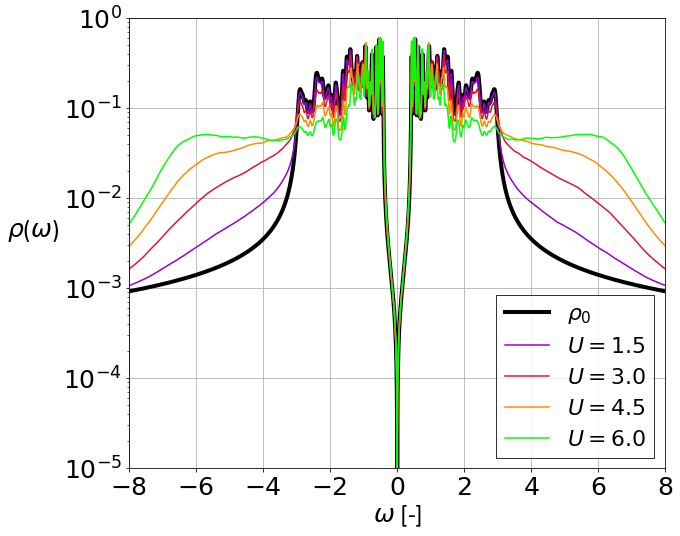

In [31]:
text_file = open("DOS_AIMGraphenenanoribUncv22v3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.00001,top=1)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{U=1.5}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{U=3.0}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{U=4.5}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{U=6.0}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,bbox_to_anchor=(1,0.41)).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('zigzagDOS.svg', format='svg', dpi=3600)

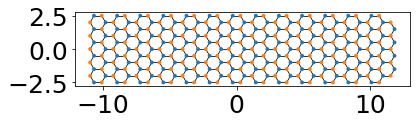

[-10.680979980008077 -2.5] 0
[-10.680979980008077 -1.5] 1
[-10.680979980008077 -0.5] 2
[-10.680979980008077 0.5] 3
[-10.680979980008077 1.5] 4
[-10.680979980008077 2.5] 5
[-9.814954576223638 -2.0] 6
[-9.814954576223638 -1.0] 7
[-9.814954576223638 0.0] 8
[-9.814954576223638 1.0] 9
[-9.814954576223638 2.0] 10
[-8.948929172439199 -2.5] 11
[-8.948929172439199 -1.5] 12
[-8.948929172439199 -0.5] 13
[-8.948929172439199 0.5] 14
[-8.948929172439199 1.5] 15
[-8.948929172439199 2.5] 16
[-8.08290376865476 -2.0] 17
[-8.08290376865476 -1.0] 18
[-8.08290376865476 0.0] 19
[-8.08290376865476 1.0] 20
[-8.08290376865476 2.0] 21
[-7.216878364870322 -2.5] 22
[-7.216878364870322 -1.5] 23
[-7.216878364870322 -0.5] 24
[-7.216878364870322 0.5] 25
[-7.216878364870322 1.5] 26
[-7.216878364870322 2.5] 27
[-6.3508529610858835 -2.0] 28
[-6.3508529610858835 -1.0] 29
[-6.3508529610858835 0.0] 30
[-6.3508529610858835 1.0] 31
[-6.3508529610858835 2.0] 32
[-5.484827557301445 -2.5] 33
[-5.484827557301445 -1.5] 34
[-5.484

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

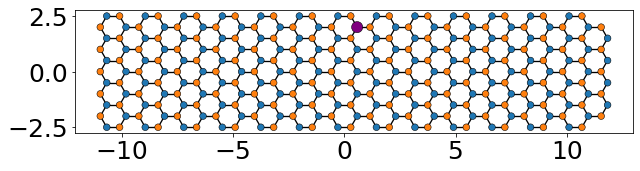

In [32]:
class Honeycomb(kwant.lattice.Polyatomic):
    """Honeycomb lattice with methods for dealing with hexagons"""
    def __init__(self, name=''):
        prim_vecs = [[sqrt(3)/2, 0.5], [0, 1]]  # bravais lattice vectors
        # offset the lattice so that it is symmetric around x and y axes
        basis_vecs = [[-1/sqrt(12), -0.5], [1/sqrt(12), -0.5]]
        super(Honeycomb, self).__init__(prim_vecs, basis_vecs, name)
        self.a, self.b = self.sublattices
    def hexagon(self, tag):
        """ Get sites belonging to hexagon with the given tag.
            Returns sites in counter-clockwise order starting
            from the lower-left site. """
        tag = ta.array(tag)
        #         a-sites b-sites
        deltas = [(0, 0), (0, 0),
                  (1, 0), (0, 1),
                  (0, 1), (-1, 1)]
        lats = it.cycle(self.sublattices)
        return (lat(*(tag + delta)) for lat, delta in zip(lats, deltas))
    def hexagon_neighbors(self, tag, n=1):
        """ Get n'th nearest neighbor hoppings within the hexagon with
            the given tag."""
        hex_sites = list(self.hexagon(tag))
        return ((hex_sites[(i+n)%6], hex_sites[i%6]) for i in xrange(6))
def ribbon(W, L):
    def shape(pos):
        return (-L <= pos[0] <= L and -W <= pos[1] <= W)
    return shape

lat = Honeycomb()
pv1, pv2 = lat.prim_vecs
xsym = kwant.TranslationalSymmetry(pv2 - 2*pv1)  # lattice symmetry in -x direction
ysym = kwant.TranslationalSymmetry(-pv2)  # lattice symmetry in -y direction

def create_lead_h(W, symmetry, axis=(0, 0)):
    lead = kwant.Builder(symmetry)
    lead[lat.wire(axis, W)] = 0
    lead[lat.neighbors(1)] = -1
    return lead

def ribbonoffset(W, L,x,y):
    def shape(pos):
        return (-L <= pos[0]-x <= L and -W <= pos[1]-y <= W)
    return shape

def create_system(W, L):
    ## scattering region ##
    sys = kwant.Builder()
    sys[lat.shape(ribbon(W, L), (0, 0))] = 0
    #del sys[lat.shape(ribbon(0.2, 0.2), (12,2.8867513459481287))]
    del sys[lat.shape(ribbonoffset(2.5, 0.5,-11.835680518387328, 0), (-11.835680518387328, 0))]
    #del sys[lat.shape(ribbonoffset(0, 0,-11.835680518387328, 2.5), (-11.835680518387328, 2.5))]
    del sys[lat.shape(ribbonoffset(0, 0,11.835680518387328, -2.5), (11.835680518387328, -2.5))]
    del sys[lat.shape(ribbonoffset(0, 0,11.835680518387328, 2.5), (11.835680518387328, 2.5))]
    sys[lat.neighbors(1)] = -1

    ## leads ##
    leads = [create_lead_h(W, xsym)]
    leads += [lead.reversed() for lead in leads]  # right lead
    kwant.plot(sys)
    #for lead in leads:
    #    sys.attach_lead(lead)
    return sys

if __name__ == '__main__':
    syst = create_system(2.5, 12)
    #kwant.plot(syst)
    fsyst=syst.finalized()
    def plotsize(i):
        site = fsyst.sites[i]
        print(site.pos,i)
        return 0.208 if site.pos == [0.5773502691896257,2.0] else 0.125
    def family_color(i):
        site = fsyst.sites[i]
        if site.pos == [0.5773502691896257,2.0]:
            return 'purple'
        elif i<147:
            return (31/255,119/255,180/255,255/255)
        else:
            return (255/255,127/255,14/255,255/255)
    plt.figure(figsize=(10,8))
    font = {'size'   : 25}
    plt.rc('legend', fontsize=25)
    plt.rc('font', **font)
    plt.rc('xtick', labelsize=25)
    plt.rc('ytick', labelsize=25)
    axis_font = {'fontname':'Calibri', 'size':'25'}
    plt.figure(figsize=(10,8))
    plot=kwant.plot(fsyst,unit=1.2 ,hop_lw=0.05,site_size=plotsize,site_color=family_color,fig_size=[10,8],
                site_lw=0.02)
    plot.tight_layout()
    plot.savefig('zigzag2.svg', format='svg', dpi=3600)

-8	0.000922662097100103223	0.00104530413684366242	0.00150505752497464076	0.00259565918095270307	0.00479995649826881008
[(-3.9959999999999996+0j), (0.003349430625443818+0j), (0.008250899279293763+0j), (0.021615207314401936+0j), (0.03473715790969272+0j), (0.03803103976694265+0j)]


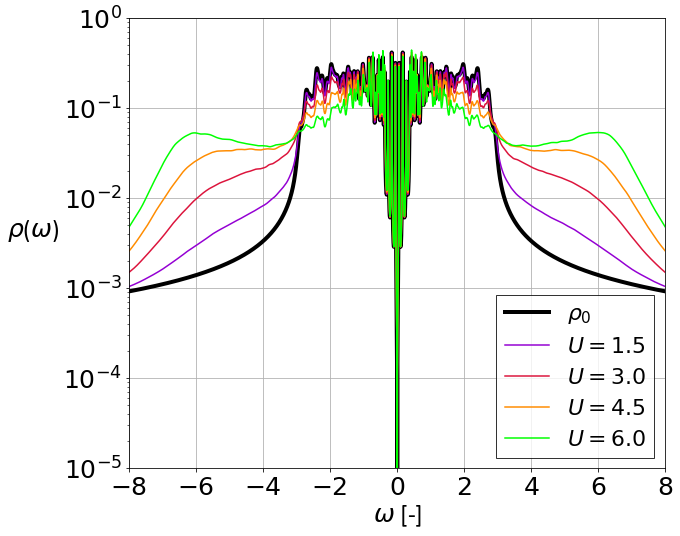

In [33]:
text_file = open("DOS_AIMGraphenenanoribUncv22v2rv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.00001,top=1)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{U=1.5}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{U=3.0}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{U=4.5}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{U=6.0}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,bbox_to_anchor=(1,0.41)).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('zigzag2DOS.svg', format='svg', dpi=3600)

 (-3+0j)	 (0.900524325022610594-0.314781709557639511j)	 (-0.635853532183180525-0.320426851943998225j)	 (-0.641185358052493104-0.314029372544639196j)	 (-0.652843691260423631-0.290285599515800741j)	 (-0.696711437832498004-0.251393725066098472j)	 (-0.690555669697570762-0.179509680154068429j)

1002


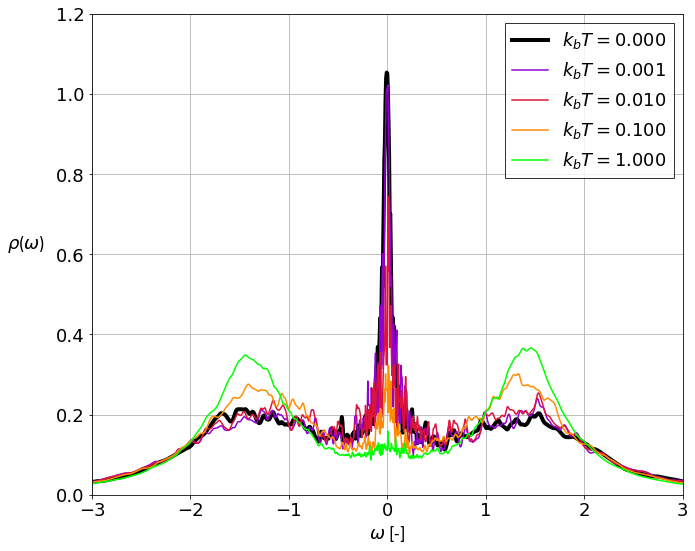

In [83]:
text_file = open("DEDTSigmadatv2", "r") #
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos1=[]
fdos4=[[],[],[],[],[]]
omega2=[]
for i in range(len(lines)-1):
    #print(i)
    omega2.append(np.real(lines[i][0]))
    fdos4[0].append(lines[i][2])
    fdos4[1].append(lines[i][3])
    fdos4[2].append(lines[i][4])
    fdos4[3].append(lines[i][5])
    fdos4[4].append(lines[i][6])
    fdos1.append(lines[i][1])
    
omega= np.linspace(-3,3,1001)
poles=4
Gamma=0.3
fDOS=[[],[],[],[],[]]
for l in range(len(fDOS)):
    AvgSigmadat3=np.zeros(len(omega),dtype = 'complex_')
    for k in range(len(fdos4[l])):
        if omega[k]==0 or k==499:
            AvgSigmadat3[k]=AvgSigmadat3[k-1]
        else:
            AvgSigmadat3[k]=fdos4[l][k]
    #AvgSigmadat+=Sigma
    #if l==0:
    #    Ed=-AvgSigmadat[500]
    finalG=np.nan_to_num(1/(omega-AvgSigmadat3+1j*Gamma))
    fDOS[l]=-np.imag(finalG)/np.pi
finalG=np.nan_to_num(1/(omega-fdos1+1.5+1j*Gamma))
fDOS1=-np.imag(finalG)/np.pi
Tk=[0.000000000001,0.001,0.01,0.1,1]    

font = {'size'   : 18}
plt.rc('legend', fontsize=18)
plt.rc('font', **font)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
axis_font = {'fontname':'Calibri', 'size':'18'}
plt.figure(figsize=(10,8))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=1.2)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega,Lorentzian(omega,Gamma,poles)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fDOS1,color='black',label='$\it{k_bT= %.3f}$'%Tk[0],linewidth=4)
#plt.plot(omega, fDOS[0],label='$\it{k_bT= %.3f}$'%Tk[0],linewidth=4)
plt.plot(omega, fDOS[1],color='darkviolet',label='$\it{k_bT= %.3f}$'%Tk[1])
plt.plot(omega, fDOS[2],color='crimson',label='$\it{k_bT= %.3f}$'%Tk[2])
plt.plot(omega, fDOS[3],color='darkorange',label='$\it{k_bT= %.3f}$'%Tk[3])
plt.plot(omega, fDOS[4],color='lime',label='$\it{k_bT= %.3f}$'%Tk[4])
#plt.plot(omega, fDOS3,label='$\\rho$')
#plt.plot(omega, fDOS4,label='$\\rho$')
plt.legend()
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('Temp2.svg', format='svg', dpi=3600)

 (-3+0j)	 (0.870831853560759983-0.255624260346064169j)	 (-0.613664589632265223-0.31813458448639631j)	 (-0.613734548668990798-0.317579328046743437j)	 (-0.612680156450842839-0.317019254020916852j)	 (-0.605177162248841549-0.27389829599048432j)	 (-0.628049231161231014-0.219329080020363776j)

1002


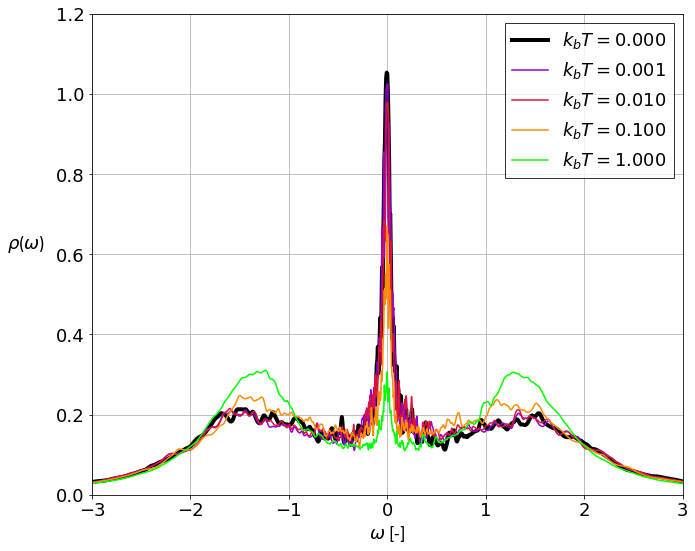

In [85]:
text_file = open("DEDTSigmadat", "r") #
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos1=[]
fdos4=[[],[],[],[],[]]
omega2=[]
for i in range(len(lines)-1):
    #print(i)
    omega2.append(np.real(lines[i][0]))
    fdos4[0].append(lines[i][2])
    fdos4[1].append(lines[i][3])
    fdos4[2].append(lines[i][4])
    fdos4[3].append(lines[i][5])
    fdos4[4].append(lines[i][6])
    fdos1.append(lines[i][1])
    
omega= np.linspace(-3,3,1001)
poles=4
Gamma=0.3
fDOS=[[],[],[],[],[]]
for l in range(len(fDOS)):
    AvgSigmadat3=np.zeros(len(omega),dtype = 'complex_')
    for k in range(len(fdos4[l])):
        if omega[k]==0:
            AvgSigmadat3[k]=AvgSigmadat3[k-1]
        else:
            AvgSigmadat3[k]=fdos4[l][k]

    #AvgSigmadat+=Sigma
    #if l==0:
    #    Ed=-AvgSigmadat[500]
    finalG=np.nan_to_num(1/(omega-AvgSigmadat3+1j*Gamma))
    fDOS[l]=-np.imag(finalG)/np.pi
#finalG=np.nan_to_num(1/(omega-fdos1+1.5+1j*Gamma))
#fDOS1=-np.imag(finalG)/np.pi
Tk=[0.000000000001,0.001,0.01,0.1,1]

font = {'size'   : 18}
plt.rc('legend', fontsize=18)
plt.rc('font', **font)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
axis_font = {'fontname':'Calibri', 'size':'18'}
plt.figure(figsize=(10,8))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=1.2)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega,Lorentzian(omega,Gamma,poles)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fDOS1,color='black',label='$\it{k_bT= %.3f}$'%Tk[0],linewidth=4)
#plt.plot(omega, fDOS[0],label='$\it{k_bT= %.3f}$'%Tk[0],linewidth=4)
plt.plot(omega, fDOS[1],color='darkviolet',label='$\it{k_bT= %.3f}$'%Tk[1])
plt.plot(omega, fDOS[2],color='crimson',label='$\it{k_bT= %.3f}$'%Tk[2])
plt.plot(omega, fDOS[3],color='darkorange',label='$\it{k_bT= %.3f}$'%Tk[3])
plt.plot(omega, fDOS[4],color='lime',label='$\it{k_bT= %.3f}$'%Tk[4])
#plt.plot(omega, fDOS3,label='$\\rho$')
#plt.plot(omega, fDOS4,label='$\\rho$')
plt.legend()
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('Temp1.svg', format='svg', dpi=3600)

 (-3+0j)	 (0.246076979946611318-0.0895535199259145515j)	 (-0.655346159604607181-0.174069772173605336j)

1002


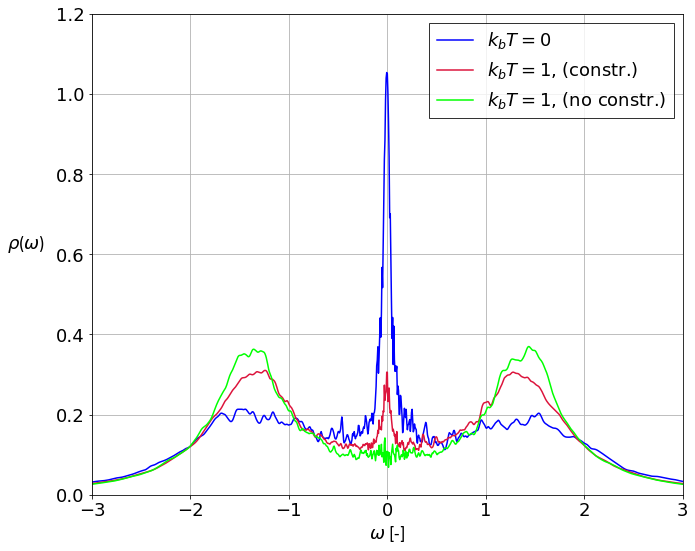

In [36]:
text_file = open("DEDTSigmadatv22", "r") #
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos9=[]
fdos5=[[]]
omega3=[]
for i in range(len(lines)-1):
    #print(i)
    omega3.append(np.real(lines[i][0]))
    fdos5[0].append(lines[i][2])
    fdos9.append(lines[i][1])

omega= np.linspace(-3,3,1001)
poles=4
Gamma=0.3
fDOS2=[[]]
for l in range(len(fDOS2)):
    AvgSigmadat3=np.zeros(len(omega),dtype = 'complex_')
    for k in range(len(fdos4[l])):
        if omega[k]==0:
            AvgSigmadat3[k]=AvgSigmadat3[k-1]
        else:
            AvgSigmadat3[k]=fdos5[l][k]
    finalG=np.nan_to_num(1/(omega-AvgSigmadat3+1j*Gamma))
    fDOS2[l]=-np.imag(finalG)/np.pi

Tk=[0.000000000001,0.001,0.01,0.1,1]    
font = {'size'   : 18}
plt.rc('legend', fontsize=18)
plt.rc('font', **font)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
axis_font = {'fontname':'Calibri', 'size':'18'}
plt.figure(figsize=(10,8))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=1.2)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)

plt.plot(omega, fDOS1,'-b',label='$\it{k_bT= %.0f}$'%Tk[0])
plt.plot(omega, fDOS[4],color='crimson',label='$\it{k_bT= %.0f}$, (constr.)'%Tk[4])
plt.plot(omega, fDOS2[0],color='lime',label='$\it{k_bT= %.0f}$, (no constr.)'%Tk[4])

plt.legend()
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('Temp3.svg', format='svg', dpi=3600)

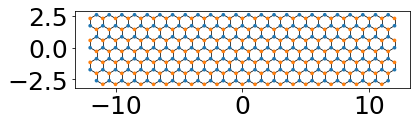

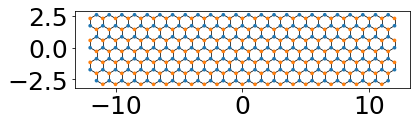

[-12.0 1.7320508075688772] 0
[-11.5 2.598076211353316] 1
[-12.0 0.0] 2
[-11.5 0.8660254037844386] 3
[-11.0 1.7320508075688772] 4
[-10.5 2.598076211353316] 5
[-12.0 -1.7320508075688772] 6
[-11.5 -0.8660254037844386] 7
[-11.0 0.0] 8
[-10.5 0.8660254037844386] 9
[-10.0 1.7320508075688772] 10
[-9.5 2.598076211353316] 11
[-11.5 -2.598076211353316] 12
[-11.0 -1.7320508075688772] 13
[-10.5 -0.8660254037844386] 14
[-10.0 0.0] 15
[-9.5 0.8660254037844386] 16
[-9.0 1.7320508075688772] 17
[-8.5 2.598076211353316] 18
[-10.5 -2.598076211353316] 19
[-10.0 -1.7320508075688772] 20
[-9.5 -0.8660254037844386] 21
[-9.0 0.0] 22
[-8.5 0.8660254037844386] 23
[-8.0 1.7320508075688772] 24
[-7.5 2.598076211353316] 25
[-9.5 -2.598076211353316] 26
[-9.0 -1.7320508075688772] 27
[-8.5 -0.8660254037844386] 28
[-8.0 0.0] 29
[-7.5 0.8660254037844386] 30
[-7.0 1.7320508075688772] 31
[-6.5 2.598076211353316] 32
[-8.5 -2.598076211353316] 33
[-8.0 -1.7320508075688772] 34
[-7.5 -0.8660254037844386] 35
[-7.0 0.0] 36
[-6.5 

<Figure size 720x576 with 0 Axes>

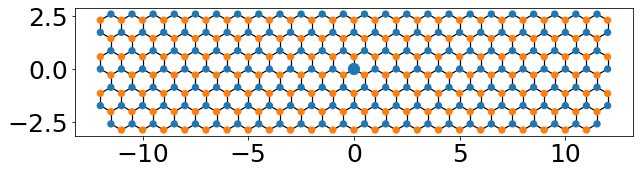

 (-8+0j)	 (1.06380279037924907-0.083960762254115695j)	 (-0.468174131238022595-0.0970006912649175462j)	 (-0.468173788586491668-0.0969997599392708743j)	 (-0.467939184176309253-0.0968815919298387646j)	 (-0.471063435189438939-0.0953302984872877873j)	 (-0.401632427855398544-0.0724353962889167508j)

1002
 (-8+0j)	 (0.000924082414712177908+0j)	 (0.0015361417952167904+0j)	 (0.00165233149626277994+0j)	 (0.00165232555385173515+0j)	 (0.00165148333743559751+0j)	 (0.00164328409497566477+0j)	 (0.00147218821451362901+0j)



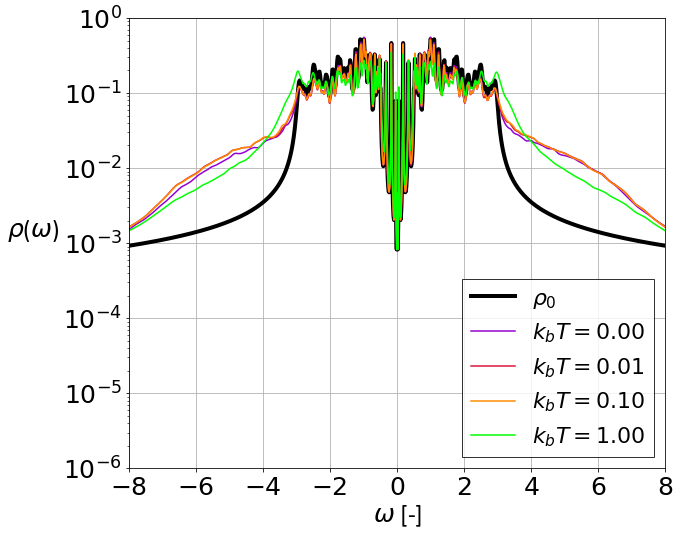

In [87]:
prim_vecs = [[1, 0], [0.5, sqrt(3)/2]]  # bravais lattice vectors
# offset the lattice so that it is symmetric around x and y axes
basis_vecs = [[0, 1/sqrt(3)], [0, 0]]        
lat=kwant.lattice.Polyatomic(prim_vecs,basis_vecs)

def ribbon(W, L):
    def shape(pos):
        return (-L <= pos[0] <= L and -W <= pos[1] <= W)
    return shape

pv1, pv2 = lat.prim_vecs
xsym = kwant.TranslationalSymmetry(pv1)  # lattice symmetry in -x direction
def create_lead_h(W,L, symmetry, axis=(0, 0)):
    lead = kwant.Builder(symmetry)
    lead[lat.shape(ribbon(W, L), (0, 0))] = 0
    lead[lat.neighbors(1)] = -1
    return lead

def ribbonoffset(W, L,x,y):
    def shape(pos):
        return (-L <= pos[0]-x <= L and -W <= pos[1]-y <= W)
    return shape

def create_system(W, L):
    sys = kwant.Builder()
    sys[lat.shape(ribbon(W, L), (0, 0))] = 0
    del sys[lat.shape(ribbonoffset(0, 0,12,-2.8867513459481287), (12, -2.8867513459481287))]
    del sys[lat.shape(ribbonoffset(0, 0,-12,-2.8867513459481287), (-12, -2.8867513459481287))]
    sys[lat.neighbors(1)] = -1
    leads = [create_lead_h(W,L, xsym)]
    leads += [lead.reversed() for lead in leads]
    kwant.plot(sys)
    #for lead in leads:
    #    sys.attach_lead(lead)
    return sys

if __name__ == '__main__':
    syst = create_system(3, 12)
    kwant.plot(syst)
    fsyst=syst.finalized()
    siteN=0
    def plotsize(i):
        site = fsyst.sites[i]
        print(site.pos,i)
        return 0.5 if site.pos == [0.0,0.0] else 0.3
    plt.figure(figsize=(10,8))
    plot=kwant.plot(fsyst,site_size=plotsize,fig_size=[10,8])
posimp=85
fsyst=syst.finalized()
ham_mat = Qobj(fsyst.hamiltonian_submatrix(sparse=False))
eig,P=ham_mat.eigenstates()
omega= np.linspace(-8,8,1001)

SPG2=np.full((len(eig), len(omega)), np.zeros(len(omega),dtype = 'complex_'))
eta=0.02*abs(omega)+0.000001

#DOS for the orgininal system of Graphene
for j in range(len(eig)):
    for i in range(len(eig)):
        SPG2[j]=SPG2[j]+(abs(P[i][j])**2)/(omega-eig[i]+1.j*eta)
DOS3=-np.imag(SPG2)/np.pi

text_file = open("DEDTGraphenenanoribSigmadat", "r") #
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos1=[]
fdos4=[[],[],[],[],[]]
omega2=[]
for i in range(len(lines)-1):
    #print(i)
    omega2.append(np.real(lines[i][0]))
    fdos4[0].append(lines[i][2])
    fdos4[1].append(lines[i][3])
    fdos4[2].append(lines[i][4])
    fdos4[3].append(lines[i][5])
    fdos4[4].append(lines[i][6])

for l in range(len(Tk)):
    #AvgSigmadat3=np.zeros(len(omega),dtype = 'complex_')
    #for k in range(len(fdos4[l])):
    #    if omega[k]==0:
    #        AvgSigmadat3[k]=AvgSigmadat3[k-1]
    #    else:
    #        AvgSigmadat3[k]=fdos4[l][k]
    #AvgSigmadat+=Sigma
    #if l==0:
    #    Ed=-AvgSigmadat[500]
    finalG=1/(1/SPG2[posimp]-fdos4[l])
    fDOS[l]=-np.imag(finalG)/np.pi

text_file = open("DEDTGraphenenanoribscv342", "r") #
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos1=[]
for i in range(len(lines)-1):
    fdos1.append(lines[i][2])
    
font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.xlim(min(omega), max(omega))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=1)
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]")
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,DOS3[posimp],color='black',linewidth=4,label='$\\rho_0$')
plt.plot(omega,fdos1,color='darkviolet',label='$k_bT= %.2f$'%0)
#plt.plot(omega, fDOS[1],color='darkviolet',label='$k_bT= %.3f$'%Tk[1])
#plt.plot(omega, fDOS[0],label='$\it{k_bT= %.3f}$'%Tk[0],linewidth=4)
plt.plot(omega, fDOS[2],color='crimson',label='$k_bT= %.2f$'%Tk[2])
plt.plot(omega, fDOS[3],color='darkorange',label='$k_bT= %.2f$'%Tk[3])
plt.plot(omega, fDOS[4],color='lime',label='$k_bT= %.2f$'%Tk[4])


#plt.plot(omega, fDOS3,label='$\\rho$')
#plt.plot(omega, fDOS4,label='$\\rho$')
plt.legend()
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('TempG.svg', format='svg', dpi=3600)

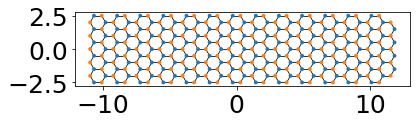

[-10.680979980008077 -2.5] 0
[-10.680979980008077 -1.5] 1
[-10.680979980008077 -0.5] 2
[-10.680979980008077 0.5] 3
[-10.680979980008077 1.5] 4
[-10.680979980008077 2.5] 5
[-9.814954576223638 -2.0] 6
[-9.814954576223638 -1.0] 7
[-9.814954576223638 0.0] 8
[-9.814954576223638 1.0] 9
[-9.814954576223638 2.0] 10
[-8.948929172439199 -2.5] 11
[-8.948929172439199 -1.5] 12
[-8.948929172439199 -0.5] 13
[-8.948929172439199 0.5] 14
[-8.948929172439199 1.5] 15
[-8.948929172439199 2.5] 16
[-8.08290376865476 -2.0] 17
[-8.08290376865476 -1.0] 18
[-8.08290376865476 0.0] 19
[-8.08290376865476 1.0] 20
[-8.08290376865476 2.0] 21
[-7.216878364870322 -2.5] 22
[-7.216878364870322 -1.5] 23
[-7.216878364870322 -0.5] 24
[-7.216878364870322 0.5] 25
[-7.216878364870322 1.5] 26
[-7.216878364870322 2.5] 27
[-6.3508529610858835 -2.0] 28
[-6.3508529610858835 -1.0] 29
[-6.3508529610858835 0.0] 30
[-6.3508529610858835 1.0] 31
[-6.3508529610858835 2.0] 32
[-5.484827557301445 -2.5] 33
[-5.484827557301445 -1.5] 34
[-5.484

<Figure size 720x576 with 0 Axes>

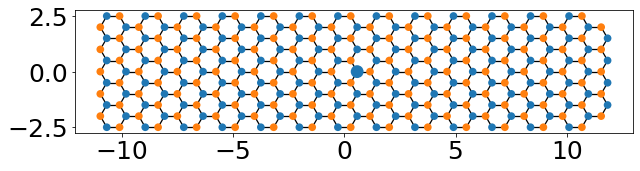

 (-8+0j)	 (1.05243997988357352-0.0862430451007550336j)	 (-0.457934918118668821-0.106266726288632929j)	 (-0.457933086250633337-0.106266725100529133j)	 (-0.457606138612072832-0.10619890247845995j)	 (-0.45789677111497562-0.104707220330166509j)	 (-0.39281709272801002-0.0753346474474933664j)

1002
 (-8+0j)	 (0.000924082413947477106+0j)	 (0.00154515165497727514+0j)	 (0.00170498765948945961+0j)	 (0.00170498678031630194+0j)	 (0.00170441132969007848+0j)	 (0.00169531424701420299+0j)	 (0.00148624496138424832+0j)



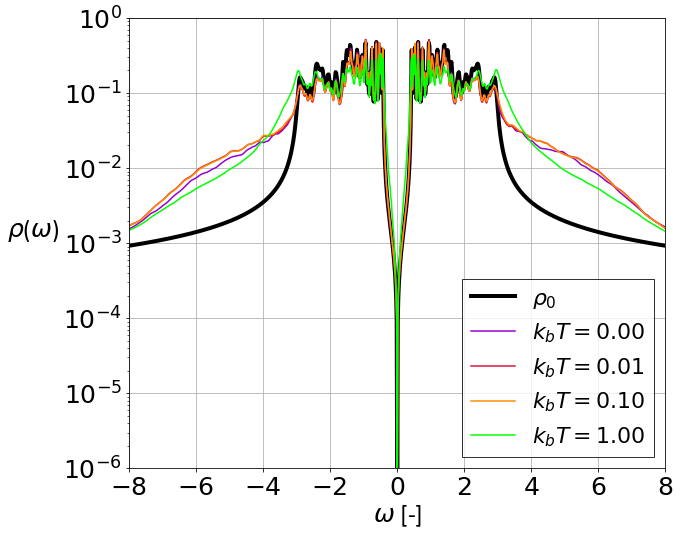

In [89]:
class Honeycomb(kwant.lattice.Polyatomic):
    """Honeycomb lattice with methods for dealing with hexagons"""
    def __init__(self, name=''):
        prim_vecs = [[sqrt(3)/2, 0.5], [0, 1]]  # bravais lattice vectors
        # offset the lattice so that it is symmetric around x and y axes
        basis_vecs = [[-1/sqrt(12), -0.5], [1/sqrt(12), -0.5]]
        super(Honeycomb, self).__init__(prim_vecs, basis_vecs, name)
        self.a, self.b = self.sublattices
    def hexagon(self, tag):
        """ Get sites belonging to hexagon with the given tag.
            Returns sites in counter-clockwise order starting
            from the lower-left site. """
        tag = ta.array(tag)
        #         a-sites b-sites
        deltas = [(0, 0), (0, 0),
                  (1, 0), (0, 1),
                  (0, 1), (-1, 1)]
        lats = it.cycle(self.sublattices)
        return (lat(*(tag + delta)) for lat, delta in zip(lats, deltas))
    def hexagon_neighbors(self, tag, n=1):
        """ Get n'th nearest neighbor hoppings within the hexagon with
            the given tag."""
        hex_sites = list(self.hexagon(tag))
        return ((hex_sites[(i+n)%6], hex_sites[i%6]) for i in xrange(6))
def ribbon(W, L):
    def shape(pos):
        return (-L <= pos[0] <= L and -W <= pos[1] <= W)
    return shape

lat = Honeycomb()
pv1, pv2 = lat.prim_vecs
xsym = kwant.TranslationalSymmetry(pv2 - 2*pv1)  # lattice symmetry in -x direction
ysym = kwant.TranslationalSymmetry(-pv2)  # lattice symmetry in -y direction

def create_lead_h(W, symmetry, axis=(0, 0)):
    lead = kwant.Builder(symmetry)
    lead[lat.wire(axis, W)] = 0
    lead[lat.neighbors(1)] = -1
    return lead

def ribbonoffset(W, L,x,y):
    def shape(pos):
        return (-L <= pos[0]-x <= L and -W <= pos[1]-y <= W)
    return shape

def create_system(W, L):
    ## scattering region ##
    sys = kwant.Builder()
    sys[lat.shape(ribbon(W, L), (0, 0))] = 0
    #del sys[lat.shape(ribbon(0.2, 0.2), (12,2.8867513459481287))]
    del sys[lat.shape(ribbonoffset(2.5, 0.5,-11.835680518387328, 0), (-11.835680518387328, 0))]
    #del sys[lat.shape(ribbonoffset(0, 0,-11.835680518387328, 2.5), (-11.835680518387328, 2.5))]
    del sys[lat.shape(ribbonoffset(0, 0,11.835680518387328, -2.5), (11.835680518387328, -2.5))]
    del sys[lat.shape(ribbonoffset(0, 0,11.835680518387328, 2.5), (11.835680518387328, 2.5))]
    sys[lat.neighbors(1)] = -1

    ## leads ##
    leads = [create_lead_h(W, xsym)]
    leads += [lead.reversed() for lead in leads]  # right lead
    kwant.plot(sys)
    #for lead in leads:
    #    sys.attach_lead(lead)
    return sys

if __name__ == '__main__':
    syst = create_system(2.5, 12)
    #kwant.plot(syst)
    def plotsize(i):
        site = fsyst.sites[i]
        print(site.pos,i)
        return 0.5 if site.pos == [0.5773502691896257,0.0] else 0.3
    fsyst=syst.finalized()
    plt.figure(figsize=(10,8))
    plot=kwant.plot(fsyst,site_size=plotsize,fig_size=[10,8])
posimp=74
fsyst=syst.finalized()
ham_mat = Qobj(fsyst.hamiltonian_submatrix(sparse=False))
eig,P=ham_mat.eigenstates()
omega= np.linspace(-8,8,1001)

SPG2=np.full((len(eig), len(omega)), np.zeros(len(omega),dtype = 'complex_'))
eta=0.02*abs(omega)+0.000001

#DOS for the orgininal system of Graphene
for j in range(len(eig)):
    for i in range(len(eig)):
        SPG2[j]=SPG2[j]+(abs(P[i][j])**2)/(omega-eig[i]+1.j*eta)
DOS3=-np.imag(SPG2)/np.pi

text_file = open("DEDTGraphenenanoribSigmadatv2", "r") #
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos1=[]
fdos4=[[],[],[],[],[]]
omega2=[]
for i in range(len(lines)-1):
    #print(i)
    omega2.append(np.real(lines[i][0]))
    fdos4[0].append(lines[i][2])
    fdos4[1].append(lines[i][3])
    fdos4[2].append(lines[i][4])
    fdos4[3].append(lines[i][5])
    fdos4[4].append(lines[i][6])

for l in range(len(Tk)):
    #AvgSigmadat3=np.zeros(len(omega),dtype = 'complex_')
    #for k in range(len(fdos4[l])):
    #    if omega[k]==0:
    #        AvgSigmadat3[k]=AvgSigmadat3[k-1]
    #    else:
    #        AvgSigmadat3[k]=fdos4[l][k]
    #AvgSigmadat+=Sigma
    #if l==0:
    #    Ed=-AvgSigmadat[500]
    finalG=1/(1/SPG2[posimp]-fdos4[l])
    fDOS[l]=-np.imag(finalG)/np.pi

text_file = open("DEDTGraphenenanoribscv342v2", "r") #
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos1=[]
for i in range(len(lines)-1):
    fdos1.append(lines[i][2])
    
font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.xlim(min(omega), max(omega))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=1)
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]")
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,DOS3[posimp],color='black',linewidth=4,label='$\\rho_0$')
plt.plot(omega,fdos1,color='darkviolet',label='$k_bT= %.2f$'%0)
#plt.plot(omega, fDOS[1],color='darkviolet',label='$k_bT= %.3f$'%Tk[1])
#plt.plot(omega, fDOS[0],label='$\it{k_bT= %.3f}$'%Tk[0],linewidth=4)
plt.plot(omega, fDOS[2],color='crimson',label='$k_bT= %.2f$'%Tk[2])
plt.plot(omega, fDOS[3],color='darkorange',label='$k_bT= %.2f$'%Tk[3])
plt.plot(omega, fDOS[4],color='lime',label='$k_bT= %.2f$'%Tk[4])


#plt.plot(omega, fDOS3,label='$\\rho$')
#plt.plot(omega, fDOS4,label='$\\rho$')
plt.legend()
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('Temp2G.svg', format='svg', dpi=3600)

-3	0.00339183221643746865	0.00722266549512481319



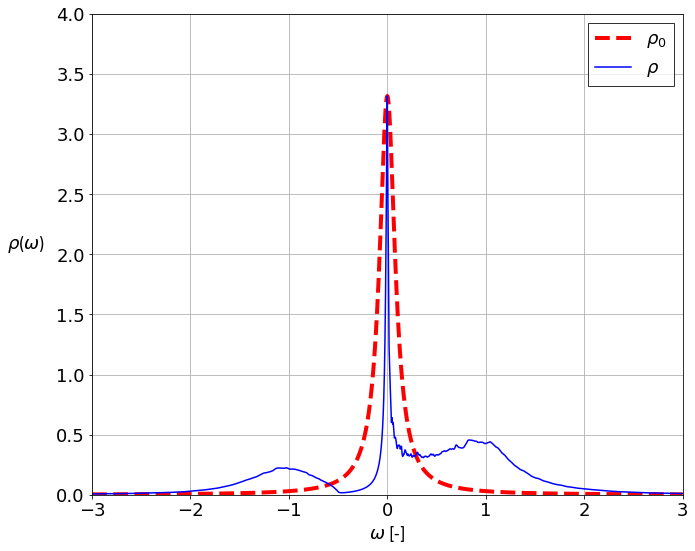

In [39]:
text_file = open("DOS_AIM030ncmultiorbU22SigmaU2v2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))

font = {'size'   : 18}
plt.rc('legend', fontsize=18)
plt.rc('font', **font)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
axis_font = {'fontname':'Calibri', 'size':'18'}
plt.figure(figsize=(10,8))
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=4)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,Lorentzian(np.linspace(-3,3,1001),0.096,4,0,0)[0], '--r',linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos3[1],'-b',label='$\\rho$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('multiorb.svg', format='svg', dpi=3600)

-8	0.000924030496018378228	0.00110678370996801934	0.00181320967289057191	0.00340863781209842275	0.00659735335515290386
[(-3.9959999999999996+0j), (0.003525637175243085+0j), (0.007002572495771467+0j), (0.012687377310525256+0j), (0.017123363874109888+0j), (0.017683807574940674+0j)]


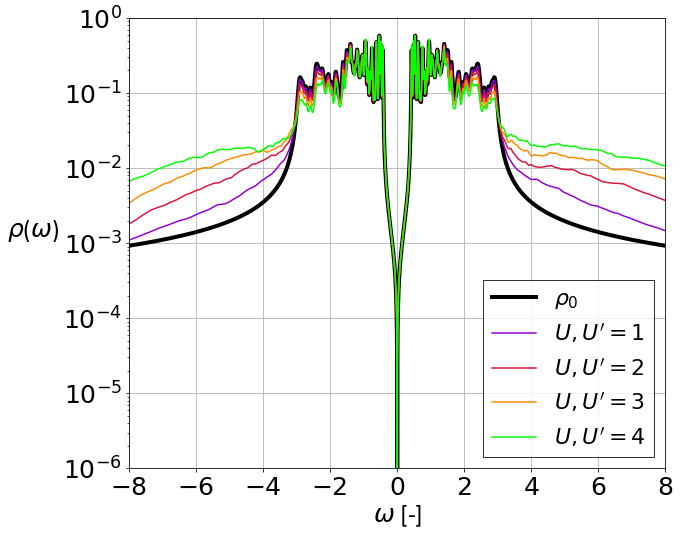

In [40]:
text_file = open("DOS_AIM030ncnanoribmultiorbGSigma213v2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=1)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{U,U\'=1}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{U,U\'=2}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{U,U\'=3}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{U,U\'=4}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('multiorbG.svg', format='svg', dpi=3600)

-8	0.000924030496783037722	0.00112184564508792557	0.00179125567426473937	0.00359051496274624639	0.00634765802107521877
[(-3.9959999999999996+0j), (0.003525792224035079+0j), (0.006671796276541668+0j), (0.011970495040904828+0j), (0.016493428574226678+0j), (0.019818035247305653+0j)]


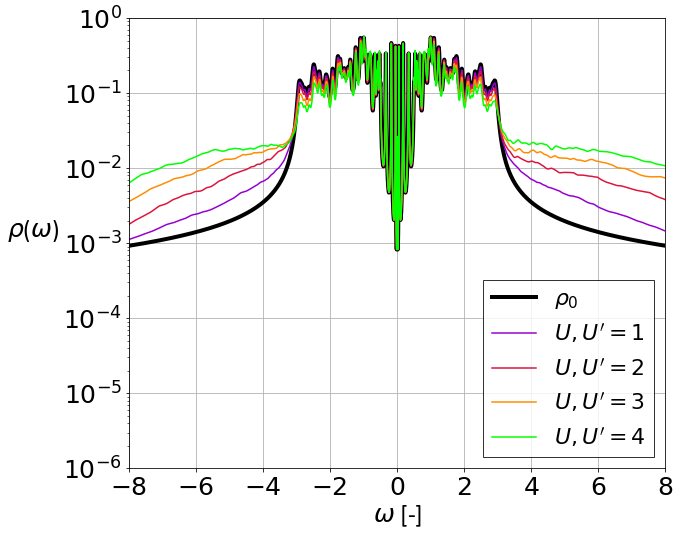

In [41]:
text_file = open("DOS_AIM030ncnanoribmultiorbGSigma2v212v2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=1)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{U,U\'=1}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{U,U\'=2}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{U,U\'=3}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{U,U\'=4}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('multiorbG2.svg', format='svg', dpi=3600)

-4	0.00593492640491840879	0.023843405939645762



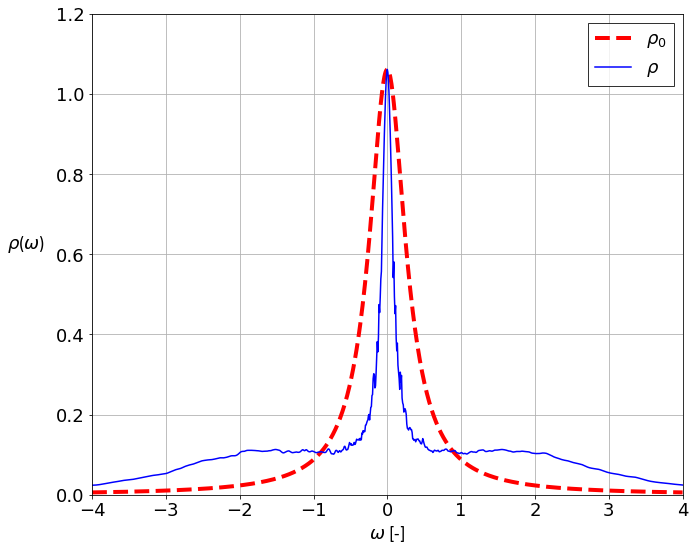

In [42]:
text_file = open("DOS_AIM030ncmultiorbU35Sigma3U2v2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))

font = {'size'   : 18}
plt.rc('legend', fontsize=18)
plt.rc('font', **font)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
axis_font = {'fontname':'Calibri', 'size':'18'}
plt.figure(figsize=(10,8))
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-4,-3,-2,-1,0,1,2,3,4], minor=False)
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,Lorentzian(np.linspace(-4,4,1001),0.3,4,0,0)[0], '--r',linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos3[1],'-b',label='$\\rho$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('multiorb2.svg', format='svg', dpi=3600)

-8	0.000924030496018378228	0.00297500973398266352	0.00902458578646142713	0.0178002792696242175	0.0273081281512615494
[(-3.9959999999999996+0j), (0.003525637175243085+0j), (0.01652689116363269+0j), (0.020098394062329016+0j), (0.02124924380068672+0j), (0.0213972201747126+0j)]


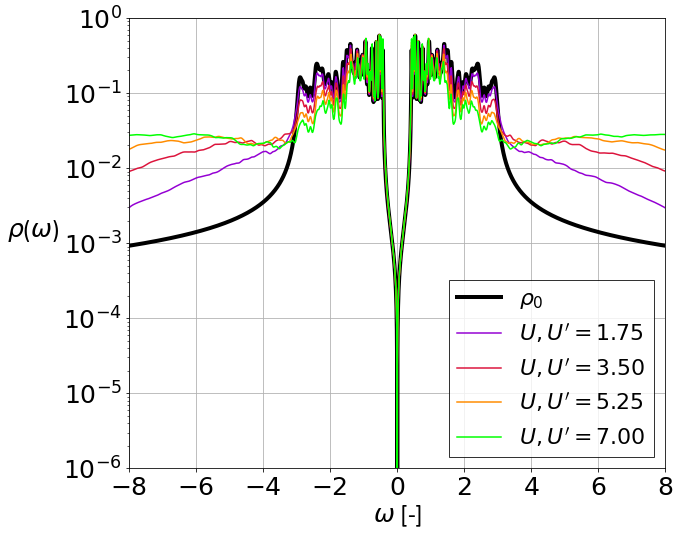

In [43]:
text_file = open("DOS_AIM030ncnanoribmultiorbGSigma3U3v3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=1)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{U,U\'=1.75}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{U,U\'=3.50}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{U,U\'=5.25}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{U,U\'=7.00}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('multiorb2G.svg', format='svg', dpi=3600)

-8	0.000924030496783037722	0.00277949247870129318	0.0095559667612149686	0.0186522044515370251	0.0264880029256293476
[(-3.9959999999999996+0j), (0.003525792224035079+0j), (0.015061337265768453+0j), (0.0236448563841164+0j), (0.02196045275170917+0j), (0.019982240453751847+0j)]


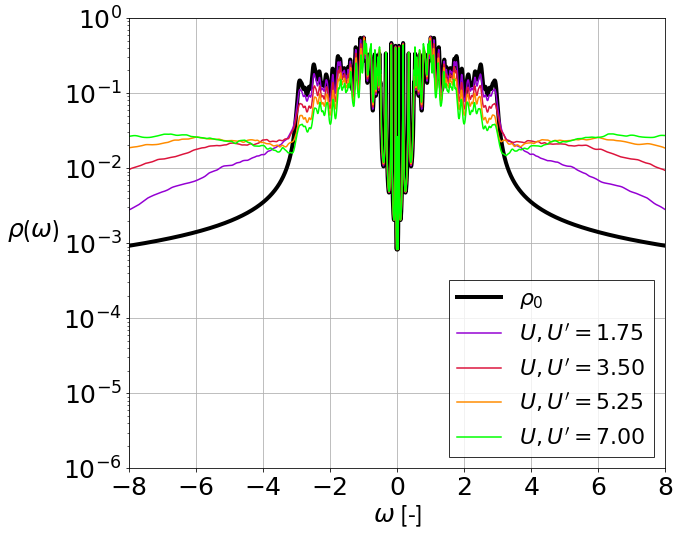

In [44]:
text_file = open("DOS_AIM030ncnanoribmultiorbGSigma3U2v3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=1)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{U,U\'=1.75}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{U,U\'=3.50}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{U,U\'=5.25}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{U,U\'=7.00}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('multiorb2G2.svg', format='svg', dpi=3600)

-5	0.00380601697310231938	0.0110605808803323075



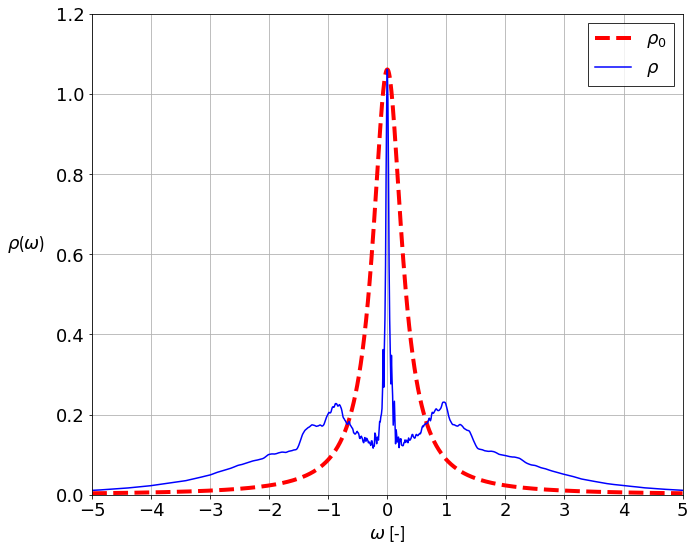

In [45]:
text_file = open("DOS_AIM030ncmultiorbU35SigmaUJv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))

font = {'size'   : 18}
plt.rc('legend', fontsize=18)
plt.rc('font', **font)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
axis_font = {'fontname':'Calibri', 'size':'18'}
plt.figure(figsize=(10,8))
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-5,-4,-3,-2,-1,0,1,2,3,4,5], minor=False)
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
plt.plot(omega,Lorentzian(np.linspace(-5,5,1001),0.3,4,0,0)[0], '--r',linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos3[1],'-b',label='$\\rho$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False).get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('multiorb3.svg', format='svg', dpi=3600)

-8	0.000924030496018378228	0.00760424368205804644	0.00631276624168794747	0.00480565868224700626	0.0034722709222058507
[(-3.9959999999999996+0j), (0.003525637175243085+0j), (0.020935376964068355+0j), (0.024670606365666856+0j), (0.030160766110049288+0j), (0.037421266097752974+0j)]


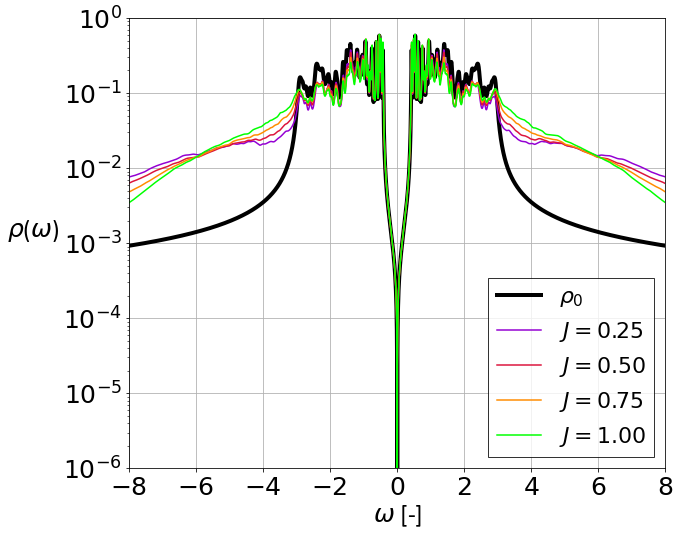

In [46]:
text_file = open("DOS_AIM030ncnanoribmultiorbGSigma211Jv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=1)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{J=0.25}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{J=0.50}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{J=0.75}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{J=1.00}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('multiorb3G.svg', format='svg', dpi=3600)

-8	0.000924030496018378228	0.00176905319662107579	0.00622557807545464238	0.0124997032818344508	0.0222541246795198398
[(-3.9959999999999996+0j), (0.003525637175243085+0j), (0.012947771471374223+0j), (0.024258648778042093+0j), (0.033970280186533856+0j), (0.03728266043429038+0j)]


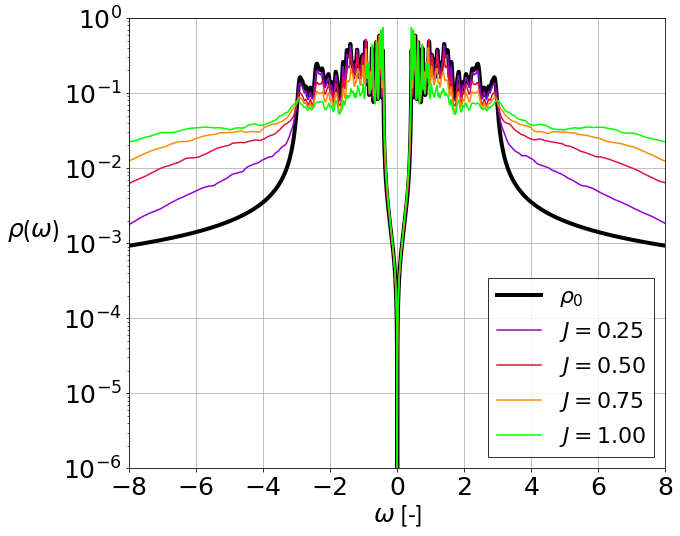

In [47]:
text_file = open("DOS_AIM030ncnanoribmultiorbGSigma213Jv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=1)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{J=0.25}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{J=0.50}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{J=0.75}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{J=1.00}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('multiorb3Gv2.svg', format='svg', dpi=3600)

-8	0.000924030496783037722	0.00758524518695923022	0.00628000580425298795	0.0046943626122527872	0.00349295265942627326
[(-3.9959999999999996+0j), (0.003525792224035079+0j), (0.02428325756839576+0j), (0.026429112401040625+0j), (0.03201864995553357+0j), (0.039672096869163884+0j)]


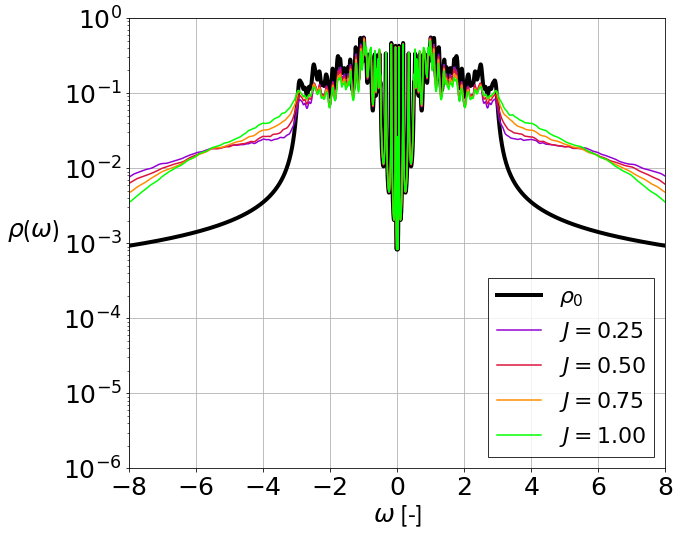

In [48]:
text_file = open("DOS_AIM030ncnanoribmultiorbGSigma2v212Jv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=1)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{J=0.25}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{J=0.50}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{J=0.75}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{J=1.00}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('multiorb3G2.svg', format='svg', dpi=3600)

-8	0.000924030496783037722	0.00179875711806780966	0.00612747279075010354	0.0131669721212191674	0.0224777024918310364
[(-3.9959999999999996+0j), (0.003525792224035079+0j), (0.01245378903471365+0j), (0.02706885999267861+0j), (0.032588441398824115+0j), (0.03884547481520526+0j)]


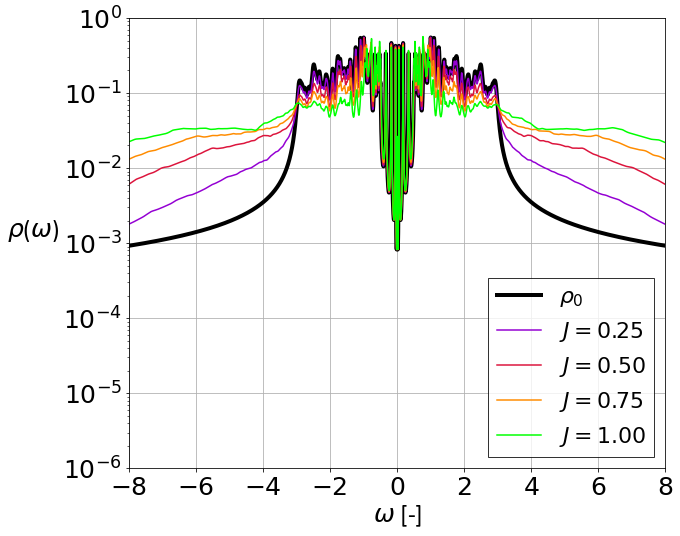

In [49]:
text_file = open("DOS_AIM030ncnanoribmultiorbGSigma2v214Jv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos3=[[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    fdos3[4].append(np.real(lines[i][5]))
#matplotlib.rc('text', usetex = True)

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=1)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(omega, fdos3[0],color='black',label='$\\rho_0$',linewidth=4)
plt.plot(omega, fdos3[1],color='darkviolet',label='$\it{J=0.25}$')
plt.plot(omega, fdos3[2],color='crimson',label='$\it{J=0.50}$')
plt.plot(omega, fdos3[3],color='darkorange',label='$\it{J=0.75}$')
plt.plot(omega, fdos3[4],color='lime',label='$\it{J=1.00}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('multiorb3G2v2.svg', format='svg', dpi=3600)

 (-6+0j)	 (0.0039964814012461566+0j)	 (0.00478211297240365395+0j)	 (0.0083141460941137512+0j)	 (0.0300024562566059728+0j)	 (0.330799274389270259+0j)	 (0.00260042276765421387+0j)	 (0.00282791321315531852+0j)	 (0.0037737954041495215+0j)	 (0.00435052293354899408+0j)	 (0.0695276218732907153+0j)	 (0.00260042276765421387+0j)	 (0.00282791321315531896+0j)	 (0.0037737954041495202+0j)	 (0.00435052293354900102+0j)	 (0.0695276218732907014+0j)	 (0.00399648140124615747+0j)	 (0.00478219402002189042+0j)	 (0.00831451347247231208+0j)	 (0.0300021605353353246+0j)	 (0.33080222688462585+0j)
[(-1.9959999999999996+0j), (0.027388921823616325+0j), (0.14749634196978503+0j), (0.054369554094445216+0j), (0.010915127344838103+0j), (0.004586381443419313+0j), (0.02117284105663153+0j), (0.0245850305346602+0j), (-0.0005902017504692597+0j), (-0.000138611377021503+0j), (-0.0005939697698378137+0j), (0.021172841056631534+0j), (0.024585030534660324+0j), (-0.0005902017504692818+0j), (-0.00013861137702150412+0j), (-0.000593969

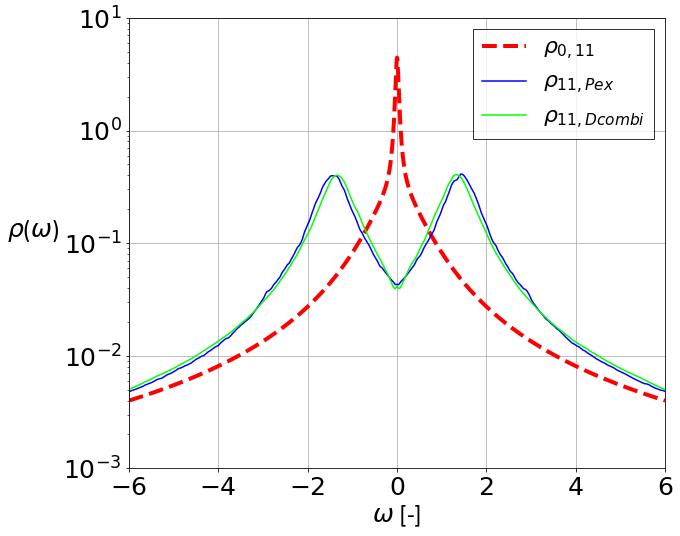

In [50]:
text_file = open("DED2impMatrixPJU1v66v3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos2=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))
    fdos2[1].append(np.real(lines[i][2]))
    fdos2[2].append(np.real(lines[i][3]))
    fdos2[3].append(np.real(lines[i][4]))
    
text_file = open("DED2impMatrixv912v3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos3=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.001,top=10)
plt.xlim(min(omega), max(omega))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-8,8,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos2[0], '--r',linewidth=4,label='$\\rho_{0,11}$')
plt.plot(omega, fdos2[1],'-b',label='$\\rho_{11,Pex}$')
plt.plot(omega, fdos3[1],color='lime',label='$\\rho_{11,Dcombi}$')

plt.legend(fancybox=False,loc='upper right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('2imprho11.svg', format='svg', dpi=3600)

 (-6+0j)	 (0.165775936711864746+0j)	 (0.177065412527945887+0j)	 (0.223719856370962006+0j)	 (0.396336095212194761+0j)	 (1.12756149556343255+0j)	 (0.00826475336807569287+0j)	 (0.00907338404802783549+0j)	 (0.012967395780751071+0j)	 (0.0357806045163409706+0j)	 (0.419422755818836812+0j)	 (0.00826475336807569287+0j)	 (0.00907338404802782855+0j)	 (0.0129673957807510797+0j)	 (0.0357806045163409567+0j)	 (0.419422755818836368+0j)	 (0.165775936711864746+0j)	 (0.177066955924293779+0j)	 (0.223724872914117939+0j)	 (0.396334150795483786+0j)	 (1.12756967001467112+0j)
[(-1.9959999999999996+0j), (0.4824480046643133+0j), (0.8638834941430198+0j), (0.35305593009943353+0j), (0.11257443762394967+0j), (0.05831538785414303+0j), (0.0712464088094713+0j), (0.20777228783970456+0j), (0.039907336014321185+0j), (0.005496281697415791+0j), (0.0025931530886321432+0j), (0.07124640880947132+0j), (0.20777228783970433+0j), (0.03990733601432125+0j), (0.005496281697415791+0j), (0.0025931530886321437+0j), (0.4824480046643134+0

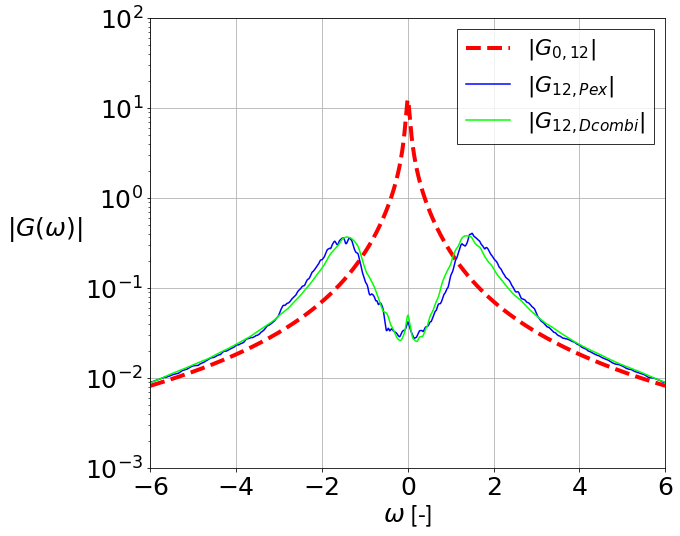

In [51]:
text_file = open("DED2impMatrixPJU1v66v3G", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos2=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][6]))
    fdos2[1].append(np.real(lines[i][7]))
    fdos2[2].append(np.real(lines[i][8]))
    fdos2[3].append(np.real(lines[i][9]))
    
text_file = open("DED2impMatrixv912v3G", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos3=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))
    
font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.001,top=100)
plt.xlim(min(omega), max(omega))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$|G(\\omega)|$",va="bottom", rotation=0,labelpad=40,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-8,8,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos2[0], '--r',linewidth=4,label='$|G_{0,12}|$')
plt.plot(omega, fdos2[1],'-b',label='$|G_{12,Pex}|$')
plt.plot(omega, fdos3[3],color='lime',label='$|G_{12,Dcombi}|$')

plt.legend(fancybox=False,loc='upper right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('2imprho12.svg', format='svg', dpi=3600)

 (-6+0j)	 (0.0039964814012461566+0j)	 (0.00478211297240365395+0j)	 (0.0083141460941137512+0j)	 (0.0300024562566059728+0j)	 (0.330799274389270259+0j)	 (0.00260042276765421387+0j)	 (0.00282791321315531852+0j)	 (0.0037737954041495215+0j)	 (0.00435052293354899408+0j)	 (0.0695276218732907153+0j)	 (0.00260042276765421387+0j)	 (0.00282791321315531896+0j)	 (0.0037737954041495202+0j)	 (0.00435052293354900102+0j)	 (0.0695276218732907014+0j)	 (0.00399648140124615747+0j)	 (0.00478219402002189042+0j)	 (0.00831451347247231208+0j)	 (0.0300021605353353246+0j)	 (0.33080222688462585+0j)
[(-1.9959999999999996+0j), (0.027388921823616325+0j), (0.14749634196978503+0j), (0.054369554094445216+0j), (0.010915127344838103+0j), (0.004586381443419313+0j), (0.02117284105663153+0j), (0.0245850305346602+0j), (-0.0005902017504692597+0j), (-0.000138611377021503+0j), (-0.0005939697698378137+0j), (0.021172841056631534+0j), (0.024585030534660324+0j), (-0.0005902017504692818+0j), (-0.00013861137702150412+0j), (-0.000593969

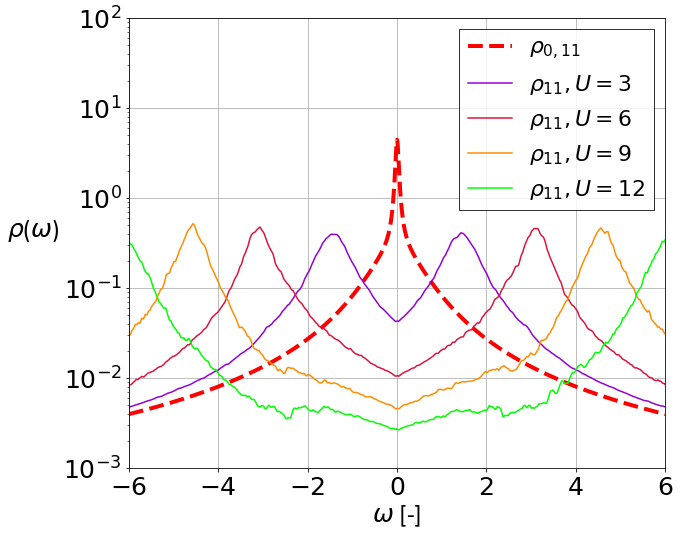

In [52]:
text_file = open("DED2impMatrixPJU1v66v3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos2=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))
    fdos2[1].append(np.real(lines[i][2]))
    fdos2[2].append(np.real(lines[i][3]))
    fdos2[3].append(np.real(lines[i][4]))
    fdos2[4].append(np.real(lines[i][5]))
    fdos2[5].append(np.real(lines[i][6]))
    fdos2[6].append(np.real(lines[i][7]))
    fdos2[7].append(np.real(lines[i][8]))
    fdos2[8].append(np.real(lines[i][9]))
    fdos2[9].append(np.real(lines[i][10]))
    fdos2[10].append(np.real(lines[i][11]))
    fdos2[11].append(np.real(lines[i][12]))
    fdos2[12].append(np.real(lines[i][13]))
    fdos2[13].append(np.real(lines[i][14]))
    fdos2[14].append(np.real(lines[i][15]))
    fdos2[15].append(np.real(lines[i][16]))

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.001,top=100)
plt.xlim(min(omega), max(omega))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-8,8,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos2[0], '--r',linewidth=4,label='$\\rho_{0,11}$')
U=[3,6,9,12]
plt.plot(omega,fdos2[1],color='darkviolet',label='$\\rho_{11},U= %.0f$'%U[0])
plt.plot(omega,fdos2[2],color='crimson',label='$\\rho_{11},U= %.0f$'%U[1])
plt.plot(omega,fdos2[3],color='darkorange',label='$\\rho_{11},U= %.0f$'%U[2])
plt.plot(omega,fdos2[4],color='lime',label='$\\rho_{11},U= %.0f$'%U[3])
plt.legend(fancybox=False,loc='upper right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('2imprho11U.svg', format='svg', dpi=3600)

 (-6+0j)	 (0.165775936711864746+0j)	 (0.177065412527945887+0j)	 (0.223719856370962006+0j)	 (0.396336095212194761+0j)	 (1.12756149556343255+0j)	 (0.00826475336807569287+0j)	 (0.00907338404802783549+0j)	 (0.012967395780751071+0j)	 (0.0357806045163409706+0j)	 (0.419422755818836812+0j)	 (0.00826475336807569287+0j)	 (0.00907338404802782855+0j)	 (0.0129673957807510797+0j)	 (0.0357806045163409567+0j)	 (0.419422755818836368+0j)	 (0.165775936711864746+0j)	 (0.177066955924293779+0j)	 (0.223724872914117939+0j)	 (0.396334150795483786+0j)	 (1.12756967001467112+0j)
[(-1.9959999999999996+0j), (0.4824480046643133+0j), (0.8638834941430198+0j), (0.35305593009943353+0j), (0.11257443762394967+0j), (0.05831538785414303+0j), (0.0712464088094713+0j), (0.20777228783970456+0j), (0.039907336014321185+0j), (0.005496281697415791+0j), (0.0025931530886321432+0j), (0.07124640880947132+0j), (0.20777228783970433+0j), (0.03990733601432125+0j), (0.005496281697415791+0j), (0.0025931530886321437+0j), (0.4824480046643134+0

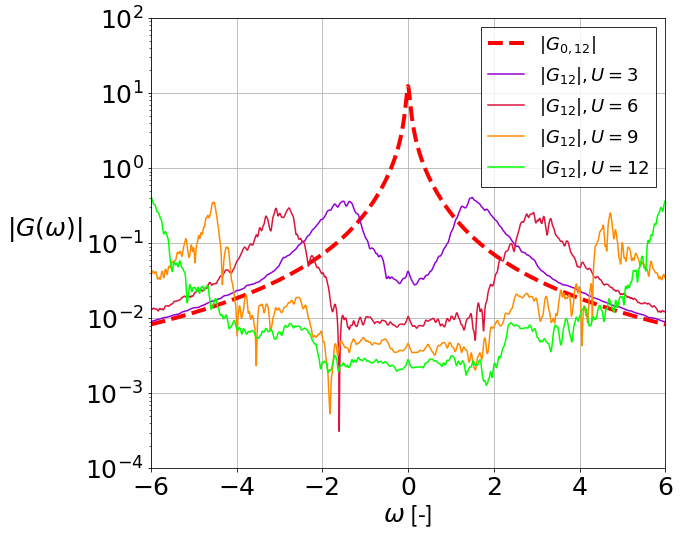

In [53]:
text_file = open("DED2impMatrixPJU1v66v3G", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos2=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))
    fdos2[1].append(np.real(lines[i][2]))
    fdos2[2].append(np.real(lines[i][3]))
    fdos2[3].append(np.real(lines[i][4]))
    fdos2[4].append(np.real(lines[i][5]))
    fdos2[5].append(np.real(lines[i][6]))
    fdos2[6].append(np.real(lines[i][7]))
    fdos2[7].append(np.real(lines[i][8]))
    fdos2[8].append(np.real(lines[i][9]))
    fdos2[9].append(np.real(lines[i][10]))
    fdos2[10].append(np.real(lines[i][11]))
    fdos2[11].append(np.real(lines[i][12]))
    fdos2[12].append(np.real(lines[i][13]))
    fdos2[13].append(np.real(lines[i][14]))
    fdos2[14].append(np.real(lines[i][15]))
    fdos2[15].append(np.real(lines[i][16]))

font = {'size'   : 25}
plt.rc('legend', fontsize=18)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.0001,top=100)
plt.xlim(min(omega), max(omega))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$|G(\\omega)|$",va="bottom", rotation=0,labelpad=40,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-8,8,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos2[5], '--r',linewidth=4,label='$|G_{0,12}|$')
U=[3,6,9,12]
plt.plot(omega,fdos2[6],color='darkviolet',label='$|G_{12}|,U= %.0f$'%U[0])
plt.plot(omega,fdos2[7],color='crimson',label='$|G_{12}|,U= %.0f$'%U[1])
plt.plot(omega,fdos2[8],color='darkorange',label='$|G_{12}|,U= %.0f$'%U[2])
plt.plot(omega,fdos2[9],color='lime',label='$|G_{12}|,U= %.0f$'%U[3])
plt.legend(fancybox=False,loc='upper right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('2imprho12U.svg', format='svg', dpi=3600)

 (-6+0j)	 (0.0039964814012461566+0j)	 (0.00439953401844948855+0j)	 (0.00567838305107923932+0j)	 (0.00840521716935988331+0j)	 (0.0251003902872903237+0j)	 (0.00260042276765421387+0j)	 (0.00275861283797031913+0j)	 (0.00329558892993438504+0j)	 (0.00384367575585853717+0j)	 (0.00522851121136030852+0j)	 (0.00260042276765421387+0j)	 (0.00275861283797031783+0j)	 (0.00329558892993438461+0j)	 (0.00384367575585853501+0j)	 (0.00522851121136031459+0j)	 (0.00399648140124615747+0j)	 (0.00439964238604032346+0j)	 (0.00567847672712722563+0j)	 (0.00840575481479277631+0j)	 (0.0251012843669940026+0j)
[(-1.9959999999999996+0j), (0.027388921823616325+0j), (0.05352799044220072+0j), (0.31270862500496655+0j), (0.11853278224686485+0j), (0.035156736452091046+0j), (0.02117284105663153+0j), (0.029290096333670898+0j), (-0.11203579862483667+0j), (0.00496056018178294+0j), (0.009056796317368571+0j), (0.021172841056631534+0j), (0.02929009633367093+0j), (-0.11203579862483655+0j), (0.004960560181782852+0j), (0.009056796317

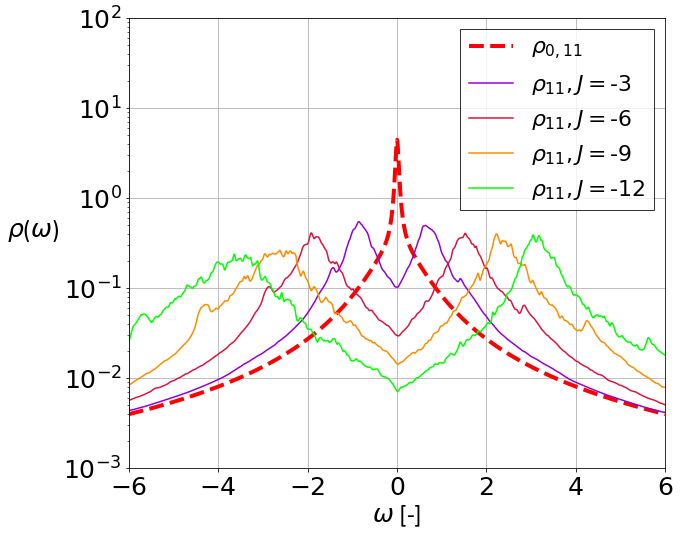

In [54]:
text_file = open("DED2impMatrixPJU1v66v4", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos2=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))
    fdos2[1].append(np.real(lines[i][2]))
    fdos2[2].append(np.real(lines[i][3]))
    fdos2[3].append(np.real(lines[i][4]))
    fdos2[4].append(np.real(lines[i][5]))
    fdos2[5].append(np.real(lines[i][6]))
    fdos2[6].append(np.real(lines[i][7]))
    fdos2[7].append(np.real(lines[i][8]))
    fdos2[8].append(np.real(lines[i][9]))
    fdos2[9].append(np.real(lines[i][10]))
    fdos2[10].append(np.real(lines[i][11]))
    fdos2[11].append(np.real(lines[i][12]))
    fdos2[12].append(np.real(lines[i][13]))
    fdos2[13].append(np.real(lines[i][14]))
    fdos2[14].append(np.real(lines[i][15]))
    fdos2[15].append(np.real(lines[i][16]))

font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.001,top=100)
plt.xlim(min(omega), max(omega))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-8,8,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos2[0], '--r',linewidth=4,label='$\\rho_{0,11}$')
U=[-3,-6,-9,-12]
plt.plot(omega,fdos2[1],color='darkviolet',label='$\\rho_{11},J=$%.0f'%U[0])
plt.plot(omega,fdos2[2],color='crimson',label='$\\rho_{11},J=$%.0f'%U[1])
plt.plot(omega,fdos2[3],color='darkorange',label='$\\rho_{11},J=$%.0f'%U[2])
plt.plot(omega,fdos2[4],color='lime',label='$\\rho_{11},J=$%.0f'%U[3])
plt.legend(fancybox=False,loc='upper right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('2imprho11J.svg', format='svg', dpi=3600)

 (-6+0j)	 (0.165775936711864746+0j)	 (0.170570261199106926+0j)	 (0.189882085184121835+0j)	 (0.218272502703191512+0j)	 (0.332760595124796776+0j)	 (0.00826475336807569287+0j)	 (0.00866701752444536989+0j)	 (0.0105964488229115875+0j)	 (0.0123049206977286912+0j)	 (0.0220580680285590233+0j)	 (0.00826475336807569287+0j)	 (0.00866701752444536642+0j)	 (0.0105964488229115736+0j)	 (0.0123049206977286878+0j)	 (0.022058068028559058+0j)	 (0.165775936711864746+0j)	 (0.170572437819748318+0j)	 (0.189883692789657638+0j)	 (0.218279627626195377+0j)	 (0.33276654315113946+0j)
[(-1.9959999999999996+0j), (0.4824480046643133+0j), (0.6151209522046233+0j), (1.1081031254043041+0j), (0.5111275715951387+0j), (0.22842863521819493+0j), (0.0712464088094713+0j), (0.11250215472097687+0j), (0.5093210559534656+0j), (0.16079443384699998+0j), (0.03825742632113733+0j), (0.07124640880947132+0j), (0.1125021547209768+0j), (0.5093210559534656+0j), (0.16079443384699996+0j), (0.03825742632113736+0j), (0.4824480046643134+0j), (0.61

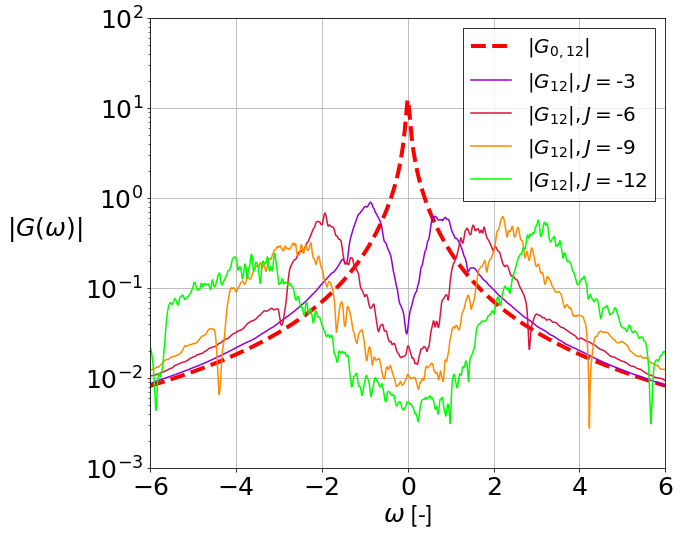

In [55]:
text_file = open("DED2impMatrixPJU1v66v4G", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos2=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))
    fdos2[1].append(np.real(lines[i][2]))
    fdos2[2].append(np.real(lines[i][3]))
    fdos2[3].append(np.real(lines[i][4]))
    fdos2[4].append(np.real(lines[i][5]))
    fdos2[5].append(np.real(lines[i][6]))
    fdos2[6].append(np.real(lines[i][7]))
    fdos2[7].append(np.real(lines[i][8]))
    fdos2[8].append(np.real(lines[i][9]))
    fdos2[9].append(np.real(lines[i][10]))
    fdos2[10].append(np.real(lines[i][11]))
    fdos2[11].append(np.real(lines[i][12]))
    fdos2[12].append(np.real(lines[i][13]))
    fdos2[13].append(np.real(lines[i][14]))
    fdos2[14].append(np.real(lines[i][15]))
    fdos2[15].append(np.real(lines[i][16]))

font = {'size'   : 25}
plt.rc('legend', fontsize=20)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.001,top=100)
plt.xlim(min(omega), max(omega))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$|G(\\omega)|$",va="bottom", rotation=0,labelpad=40,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-8,8,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos2[5], '--r',linewidth=4,label='$|G_{0,12}|$')
U=[-3,-6,-9,-12]
plt.plot(omega,fdos2[6],color='darkviolet',label='$|G_{12}|,J=$%.0f'%U[0])
plt.plot(omega,fdos2[7],color='crimson',label='$|G_{12}|,J=$%.0f'%U[1])
plt.plot(omega,fdos2[8],color='darkorange',label='$|G_{12}|,J=$%.0f'%U[2])
plt.plot(omega,fdos2[9],color='lime',label='$|G_{12}|,J=$%.0f'%U[3])
plt.legend(fancybox=False,loc='upper right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('2imprho12J.svg', format='svg', dpi=3600)

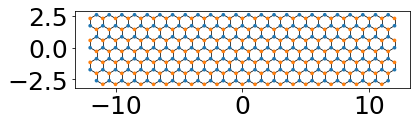

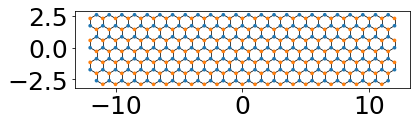

[-12.0 1.7320508075688772] 0
[-11.5 2.598076211353316] 1
[-12.0 0.0] 2
[-11.5 0.8660254037844386] 3
[-11.0 1.7320508075688772] 4
[-10.5 2.598076211353316] 5
[-12.0 -1.7320508075688772] 6
[-11.5 -0.8660254037844386] 7
[-11.0 0.0] 8
[-10.5 0.8660254037844386] 9
[-10.0 1.7320508075688772] 10
[-9.5 2.598076211353316] 11
[-11.5 -2.598076211353316] 12
[-11.0 -1.7320508075688772] 13
[-10.5 -0.8660254037844386] 14
[-10.0 0.0] 15
[-9.5 0.8660254037844386] 16
[-9.0 1.7320508075688772] 17
[-8.5 2.598076211353316] 18
[-10.5 -2.598076211353316] 19
[-10.0 -1.7320508075688772] 20
[-9.5 -0.8660254037844386] 21
[-9.0 0.0] 22
[-8.5 0.8660254037844386] 23
[-8.0 1.7320508075688772] 24
[-7.5 2.598076211353316] 25
[-9.5 -2.598076211353316] 26
[-9.0 -1.7320508075688772] 27
[-8.5 -0.8660254037844386] 28
[-8.0 0.0] 29
[-7.5 0.8660254037844386] 30
[-7.0 1.7320508075688772] 31
[-6.5 2.598076211353316] 32
[-8.5 -2.598076211353316] 33
[-8.0 -1.7320508075688772] 34
[-7.5 -0.8660254037844386] 35
[-7.0 0.0] 36
[-6.5 

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

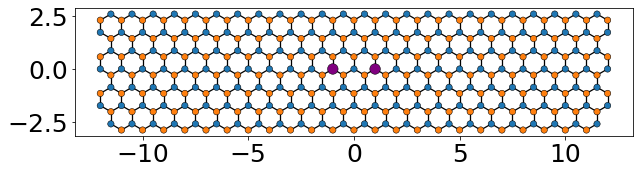

In [56]:
prim_vecs = [[1, 0], [0.5, sqrt(3)/2]]  # bravais lattice vectors
# offset the lattice so that it is symmetric around x and y axes
basis_vecs = [[0, 1/sqrt(3)], [0, 0]]        
lat=kwant.lattice.Polyatomic(prim_vecs,basis_vecs)

def ribbon(W, L):
    def shape(pos):
        return (-L <= pos[0] <= L and -W <= pos[1] <= W)
    return shape

pv1, pv2 = lat.prim_vecs
xsym = kwant.TranslationalSymmetry(pv1)  # lattice symmetry in -x direction
def create_lead_h(W,L, symmetry, axis=(0, 0)):
    lead = kwant.Builder(symmetry)
    lead[lat.shape(ribbon(W, L), (0, 0))] = 0
    lead[lat.neighbors(1)] = -1
    return lead

def ribbonoffset(W, L,x,y):
    def shape(pos):
        return (-L <= pos[0]-x <= L and -W <= pos[1]-y <= W)
    return shape

def create_system(W, L):
    sys = kwant.Builder()
    sys[lat.shape(ribbon(W, L), (0, 0))] = 0
    del sys[lat.shape(ribbonoffset(0, 0,12,-2.8867513459481287), (12, -2.8867513459481287))]
    del sys[lat.shape(ribbonoffset(0, 0,-12,-2.8867513459481287), (-12, -2.8867513459481287))]
    sys[lat.neighbors(1)] = -1
    leads = [create_lead_h(W,L, xsym)]
    leads += [lead.reversed() for lead in leads]
    kwant.plot(sys)
    #for lead in leads:
    #    sys.attach_lead(lead)
    return sys

if __name__ == '__main__':
    syst = create_system(3, 12)
    kwant.plot(syst)
    fsyst=syst.finalized()
    siteN=0
    def plotsize(i):
        site = fsyst.sites[i]
        print(site.pos,i)
        return 0.208 if site.pos == [-1.0,0.0] or site.pos == [1.0,0.0] else 0.125
    def family_color(i):
        site = fsyst.sites[i]
        if site.pos == [-1.0,0.0] or site.pos == [1.0,0.0]:
            return 'purple'
        elif i<171:
            return (31/255,119/255,180/255,255/255)
        else:
            return (255/255,127/255,14/255,255/255)
    plt.figure(figsize=(10,8))
    font = {'size'   : 25}
    plt.rc('legend', fontsize=25)
    plt.rc('font', **font)
    plt.rc('xtick', labelsize=25)
    plt.rc('ytick', labelsize=25)
    axis_font = {'fontname':'Calibri', 'size':'25'}
    plt.figure(figsize=(10,8))
    plot=kwant.plot(fsyst,unit=1.2 ,hop_lw=0.05,site_size=plotsize,site_color=family_color,fig_size=[10,8],
                site_lw=0.02)
    plot.tight_layout()
    plot.savefig('armchair2imp.svg', format='svg', dpi=3600)

 (-8+0j)	 (0.000924030496783028723+0j)	 (0.000949047698235883888+0j)	 (0.00102323618626504707+0j)	 (0.00115443880775551616+0j)	 (0.00138443908025993228+0j)	 (1.36839975720620569e-06+0j)	 (1.2119974098649816e-06+0j)	 (5.54097240914294946e-07+0j)	 (-6.2252127150346341e-07+0j)	 (-1.62137866798299747e-06+0j)	 (1.36839975720620569e-06+0j)	 (1.21199740986525773e-06+0j)	 (5.54097240914502045e-07+0j)	 (-6.22521271503256311e-07+0j)	 (-1.62137866798244521e-06+0j)	 (0.000924030496783029265+0j)	 (0.000948967352639052721+0j)	 (0.00102287999565150545+0j)	 (0.00115357581240437988+0j)	 (0.00138341485490024859+0j)
[(-3.9959999999999996+0j), (0.003525792224035033+0j), (0.0043026569802876195+0j), (0.007254225138899341+0j), (0.016130314332655576+0j), (0.06062763416676133+0j), (0.00017639970519711898+0j), (0.0002804888430805742+0j), (6.240911413263336e-05+0j), (-0.0010492598265867505+0j), (-0.004499884155684088+0j), (0.000176399705197119+0j), (0.0002804888430805728+0j), (6.240911413262839e-05+0j), (-0.0010

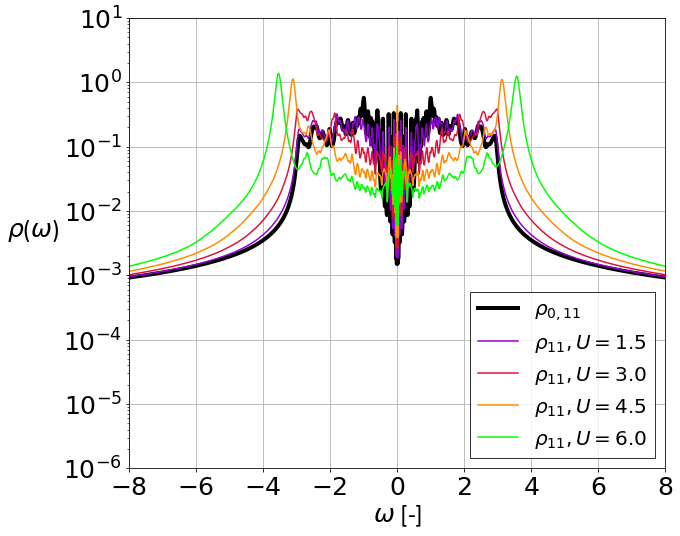

In [57]:
text_file = open("DED2impMatrixPGraphenenanoribv4", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos2=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))
    fdos2[1].append(np.real(lines[i][2]))
    fdos2[2].append(np.real(lines[i][3]))
    fdos2[3].append(np.real(lines[i][4]))
    fdos2[4].append(np.real(lines[i][5]))
    fdos2[5].append(np.real(lines[i][6]))
    fdos2[6].append(np.real(lines[i][7]))
    fdos2[7].append(np.real(lines[i][8]))
    fdos2[8].append(np.real(lines[i][9]))
    fdos2[9].append(np.real(lines[i][10]))
    fdos2[10].append(np.real(lines[i][11]))
    fdos2[11].append(np.real(lines[i][12]))
    fdos2[12].append(np.real(lines[i][13]))
    fdos2[13].append(np.real(lines[i][14]))
    fdos2[14].append(np.real(lines[i][15]))
    fdos2[15].append(np.real(lines[i][16]))

font = {'size'   : 25}
plt.rc('legend', fontsize=20)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=10)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-8,8,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos2[0], color='black',linewidth=4,label='$\\rho_{0,11}$')
U=[1.5,3,4.5,6]
plt.plot(omega,fdos2[1],color='darkviolet',label='$\\rho_{11},U= %.1f$'%U[0])
plt.plot(omega,fdos2[2],color='crimson',label='$\\rho_{11},U= %.1f$'%U[1])
plt.plot(omega,fdos2[3],color='darkorange',label='$\\rho_{11},U= %.1f$'%U[2])
plt.plot(omega,fdos2[4],color='lime',label='$\\rho_{11},U= %.1f$'%U[3])
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('2imprho11UG.svg', format='svg', dpi=3600)

 (-8+0j)	 (0.131331578512625724+0j)	 (0.132552195640418119+0j)	 (0.136011678600357122+0j)	 (0.141789543937260815+0j)	 (0.151369196924767746+0j)	 (3.90159806275332553e-05+0j)	 (3.31165082512753213e-05+0j)	 (1.2397783243104526e-05+0j)	 (3.08454332245375361e-05+0j)	 (0.000113555765414978407+0j)	 (3.90159806275332418e-05+0j)	 (3.31165082513167785e-05+0j)	 (1.23977832431114869e-05+0j)	 (3.08454332245513462e-05+0j)	 (0.000113555765414936733+0j)	 (0.131331578512625724+0j)	 (0.132549459803559755+0j)	 (0.13599303505580243+0j)	 (0.141756486018293604+0j)	 (0.151347893292722829+0j)
[(-3.9959999999999996+0j), (0.3220342521733316+0j), (0.3385043539438737+0j), (0.3927607977354068+0j), (0.520292312986211+0j), (0.9810379317477727+0j), (0.003329861837483568+0j), (0.0031606624588289807+0j), (0.001275777022455529+0j), (0.004218090181944517+0j), (0.03283057591267559+0j), (0.0033298618374835677+0j), (0.0031606624588288727+0j), (0.001275777022455362+0j), (0.004218090181944682+0j), (0.032830575912676505+0j), 

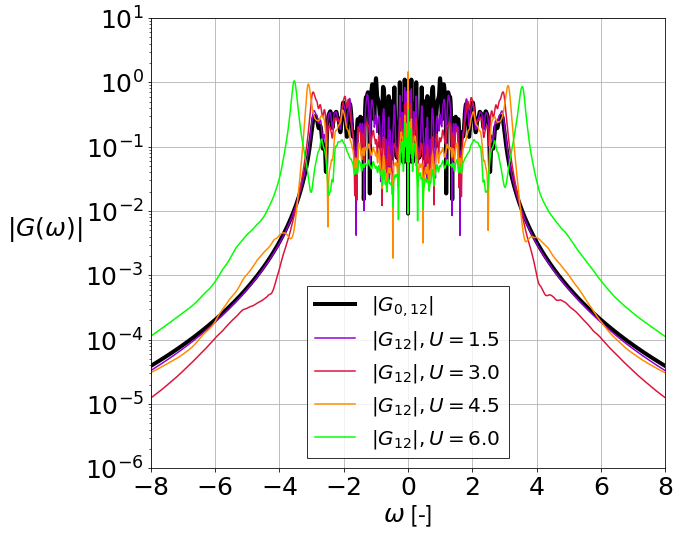

In [58]:
text_file = open("DED2impMatrixPGraphenenanoribv4G", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos2=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))
    fdos2[1].append(np.real(lines[i][2]))
    fdos2[2].append(np.real(lines[i][3]))
    fdos2[3].append(np.real(lines[i][4]))
    fdos2[4].append(np.real(lines[i][5]))
    fdos2[5].append(np.real(lines[i][6]))
    fdos2[6].append(np.real(lines[i][7]))
    fdos2[7].append(np.real(lines[i][8]))
    fdos2[8].append(np.real(lines[i][9]))
    fdos2[9].append(np.real(lines[i][10]))
    fdos2[10].append(np.real(lines[i][11]))
    fdos2[11].append(np.real(lines[i][12]))
    fdos2[12].append(np.real(lines[i][13]))
    fdos2[13].append(np.real(lines[i][14]))
    fdos2[14].append(np.real(lines[i][15]))
    fdos2[15].append(np.real(lines[i][16]))

font = {'size'   : 25}
plt.rc('legend', fontsize=20)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=10)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$|G(\\omega)|$",va="bottom", rotation=0,labelpad=40,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-8,8,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos2[5], color='black',linewidth=4,label='$|G_{0,12}|$')
U=[1.5,3,4.5,6]
plt.plot(omega,fdos2[6],color='darkviolet',label='$|G_{12}|,U= %.1f$'%U[0])
plt.plot(omega,fdos2[7],color='crimson',label='$|G_{12}|,U= %.1f$'%U[1])
plt.plot(omega,fdos2[8],color='darkorange',label='$|G_{12}|,U= %.1f$'%U[2])
plt.plot(omega,fdos2[9],color='lime',label='$|G_{12}|,U= %.1f$'%U[3])
plt.legend(fancybox=False,loc='lower center').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('2imprho12UG.svg', format='svg', dpi=3600)

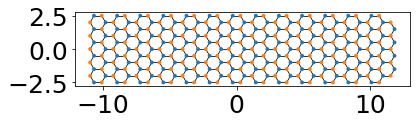

[-10.680979980008077 -2.5] 0
[-10.680979980008077 -1.5] 1
[-10.680979980008077 -0.5] 2
[-10.680979980008077 0.5] 3
[-10.680979980008077 1.5] 4
[-10.680979980008077 2.5] 5
[-9.814954576223638 -2.0] 6
[-9.814954576223638 -1.0] 7
[-9.814954576223638 0.0] 8
[-9.814954576223638 1.0] 9
[-9.814954576223638 2.0] 10
[-8.948929172439199 -2.5] 11
[-8.948929172439199 -1.5] 12
[-8.948929172439199 -0.5] 13
[-8.948929172439199 0.5] 14
[-8.948929172439199 1.5] 15
[-8.948929172439199 2.5] 16
[-8.08290376865476 -2.0] 17
[-8.08290376865476 -1.0] 18
[-8.08290376865476 0.0] 19
[-8.08290376865476 1.0] 20
[-8.08290376865476 2.0] 21
[-7.216878364870322 -2.5] 22
[-7.216878364870322 -1.5] 23
[-7.216878364870322 -0.5] 24
[-7.216878364870322 0.5] 25
[-7.216878364870322 1.5] 26
[-7.216878364870322 2.5] 27
[-6.3508529610858835 -2.0] 28
[-6.3508529610858835 -1.0] 29
[-6.3508529610858835 0.0] 30
[-6.3508529610858835 1.0] 31
[-6.3508529610858835 2.0] 32
[-5.484827557301445 -2.5] 33
[-5.484827557301445 -1.5] 34
[-5.484

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

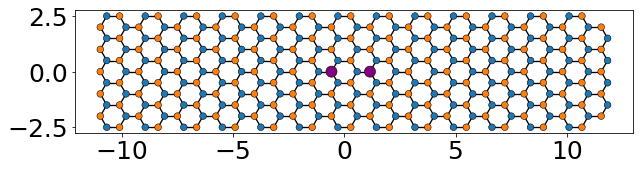

In [59]:
class Honeycomb(kwant.lattice.Polyatomic):
    """Honeycomb lattice with methods for dealing with hexagons"""
    def __init__(self, name=''):
        prim_vecs = [[sqrt(3)/2, 0.5], [0, 1]]  # bravais lattice vectors
        # offset the lattice so that it is symmetric around x and y axes
        basis_vecs = [[-1/sqrt(12), -0.5], [1/sqrt(12), -0.5]]
        super(Honeycomb, self).__init__(prim_vecs, basis_vecs, name)
        self.a, self.b = self.sublattices
    def hexagon(self, tag):
        """ Get sites belonging to hexagon with the given tag.
            Returns sites in counter-clockwise order starting
            from the lower-left site. """
        tag = ta.array(tag)
        #         a-sites b-sites
        deltas = [(0, 0), (0, 0),
                  (1, 0), (0, 1),
                  (0, 1), (-1, 1)]
        lats = it.cycle(self.sublattices)
        return (lat(*(tag + delta)) for lat, delta in zip(lats, deltas))
    def hexagon_neighbors(self, tag, n=1):
        """ Get n'th nearest neighbor hoppings within the hexagon with
            the given tag."""
        hex_sites = list(self.hexagon(tag))
        return ((hex_sites[(i+n)%6], hex_sites[i%6]) for i in xrange(6))
def ribbon(W, L):
    def shape(pos):
        return (-L <= pos[0] <= L and -W <= pos[1] <= W)
    return shape

lat = Honeycomb()
pv1, pv2 = lat.prim_vecs
xsym = kwant.TranslationalSymmetry(pv2 - 2*pv1)  # lattice symmetry in -x direction
ysym = kwant.TranslationalSymmetry(-pv2)  # lattice symmetry in -y direction

def create_lead_h(W, symmetry, axis=(0, 0)):
    lead = kwant.Builder(symmetry)
    lead[lat.wire(axis, W)] = 0
    lead[lat.neighbors(1)] = -1
    return lead

def ribbonoffset(W, L,x,y):
    def shape(pos):
        return (-L <= pos[0]-x <= L and -W <= pos[1]-y <= W)
    return shape

def create_system(W, L):
    ## scattering region ##
    sys = kwant.Builder()
    sys[lat.shape(ribbon(W, L), (0, 0))] = 0
    #del sys[lat.shape(ribbon(0.2, 0.2), (12,2.8867513459481287))]
    del sys[lat.shape(ribbonoffset(2.5, 0.5,-11.835680518387328, 0), (-11.835680518387328, 0))]
    #del sys[lat.shape(ribbonoffset(0, 0,-11.835680518387328, 2.5), (-11.835680518387328, 2.5))]
    del sys[lat.shape(ribbonoffset(0, 0,11.835680518387328, -2.5), (11.835680518387328, -2.5))]
    del sys[lat.shape(ribbonoffset(0, 0,11.835680518387328, 2.5), (11.835680518387328, 2.5))]
    sys[lat.neighbors(1)] = -1

    ## leads ##
    leads = [create_lead_h(W, xsym)]
    leads += [lead.reversed() for lead in leads]  # right lead
    kwant.plot(sys)
    #for lead in leads:
    #    sys.attach_lead(lead)
    return sys

if __name__ == '__main__':
    syst = create_system(2.5, 12)
    #kwant.plot(syst)
    fsyst=syst.finalized()
    def plotsize(i):
        site = fsyst.sites[i]
        print(site.pos,i)
        return 0.208 if site.pos == [1.1547005383792515, 0.0] or site.pos == [-0.5773502691896257, 0.0] else 0.125
    def family_color(i):
        site = fsyst.sites[i]
        if site.pos == [1.1547005383792515, 0.0] or site.pos == [-0.5773502691896257, 0.0]:
            return 'purple'
        elif i<147:
            return (31/255,119/255,180/255,255/255)
        else:
            return (255/255,127/255,14/255,255/255)
    plt.figure(figsize=(10,8))
    font = {'size'   : 25}
    plt.rc('legend', fontsize=25)
    plt.rc('font', **font)
    plt.rc('xtick', labelsize=25)
    plt.rc('ytick', labelsize=25)
    axis_font = {'fontname':'Calibri', 'size':'25'}
    plt.figure(figsize=(10,8))
    plot=kwant.plot(fsyst,unit=1.2 ,hop_lw=0.05,site_size=plotsize,site_color=family_color,fig_size=[10,8],
                site_lw=0.02)
    plot.tight_layout()
    plot.savefig('zigzag2imp.svg', format='svg', dpi=3600)

 (-8+0j)	 (0.000924030496018378661+0j)	 (0.000948197134821141679+0j)	 (0.00102261369708810221+0j)	 (0.00114891783886244322+0j)	 (0.0013774924801120312+0j)	 (2.56090744716327654e-06+0j)	 (2.43623179164286443e-06+0j)	 (1.81390354366178276e-06+0j)	 (1.24984526991390755e-06+0j)	 (2.47970604534283951e-06+0j)	 (2.56090744716327738e-06+0j)	 (2.42025092192350995e-06+0j)	 (1.8139035436616447e-06+0j)	 (1.24984526991394207e-06+0j)	 (2.47970604534290854e-06+0j)	 (0.00092403049601837877+0j)	 (0.000948455769366042946+0j)	 (0.00102304842715146018+0j)	 (0.00115157994907791068+0j)	 (0.00138396960963038944+0j)
[(-3.9959999999999996+0j), (0.0035256371752430786+0j), (0.004337973900070411+0j), (0.007968072956875662+0j), (0.01767058461144582+0j), (0.05851478599870435+0j), (0.0002650026589960519+0j), (0.00043239859001742876+0j), (5.704264715245119e-05+0j), (-0.0018195515637446107+0j), (-0.0015722555621047996+0j), (0.00026500265899605187+0j), (0.00043235558686136147+0j), (5.704264715245285e-05+0j), (-0.001819

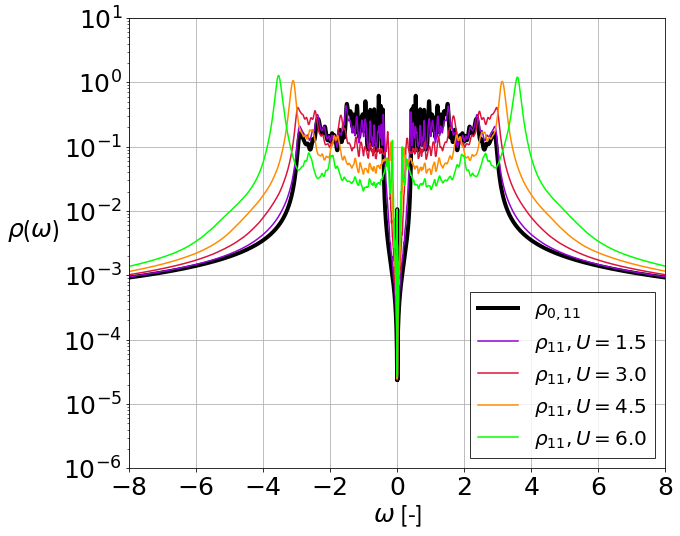

In [60]:
text_file = open("DED2impMatrixPGraphenenanoribv3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos2=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))
    fdos2[1].append(np.real(lines[i][2]))
    fdos2[2].append(np.real(lines[i][3]))
    fdos2[3].append(np.real(lines[i][4]))
    fdos2[4].append(np.real(lines[i][5]))
    fdos2[5].append(np.real(lines[i][6]))
    fdos2[6].append(np.real(lines[i][7]))
    fdos2[7].append(np.real(lines[i][8]))
    fdos2[8].append(np.real(lines[i][9]))
    fdos2[9].append(np.real(lines[i][10]))
    fdos2[10].append(np.real(lines[i][11]))
    fdos2[11].append(np.real(lines[i][12]))
    fdos2[12].append(np.real(lines[i][13]))
    fdos2[13].append(np.real(lines[i][14]))
    fdos2[14].append(np.real(lines[i][15]))
    fdos2[15].append(np.real(lines[i][16]))

font = {'size'   : 25}
plt.rc('legend', fontsize=20)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=10)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-8,8,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos2[0], color='black',linewidth=4,label='$\\rho_{0,11}$')
U=[1.5,3,4.5,6]
plt.plot(omega,fdos2[1],color='darkviolet',label='$\\rho_{11},U= %.1f$'%U[0])
plt.plot(omega,fdos2[2],color='crimson',label='$\\rho_{11},U= %.1f$'%U[1])
plt.plot(omega,fdos2[3],color='darkorange',label='$\\rho_{11},U= %.1f$'%U[2])
plt.plot(omega,fdos2[4],color='lime',label='$\\rho_{11},U= %.1f$'%U[3])
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('2imprho11UG2.svg', format='svg', dpi=3600)

 (-8+0j)	 (0.13133157850462357+0j)	 (0.132499727086631353+0j)	 (0.135947637387945658+0j)	 (0.141443827201428646+0j)	 (0.150848167136330813+0j)	 (7.43549351248671078e-05+0j)	 (6.75262235347538347e-05+0j)	 (4.45342265091196247e-05+0j)	 (5.61408616670422252e-06+0j)	 (8.19995980232546132e-05+0j)	 (7.43549351248671213e-05+0j)	 (6.75215646798342023e-05+0j)	 (4.45342265091195705e-05+0j)	 (5.61408616670925728e-06+0j)	 (8.19995980232753621e-05+0j)	 (0.131331578504623597+0j)	 (0.132514544170882431+0j)	 (0.135957635303994046+0j)	 (0.141489715161201762+0j)	 (0.150974596779657605+0j)
[(-3.9959999999999996+0j), (0.322033196388852+0j), (0.33834143087738366+0j), (0.3940812447870064+0j), (0.5117140991005329+0j), (0.9563384803488881+0j), (0.005345570832180823+0j), (0.0051991489782451+0j), (0.0028001011344517546+0j), (0.005912266854719979+0j), (0.01581949876066736+0j), (0.005345570832180823+0j), (0.0051991207084200585+0j), (0.0028001011344517272+0j), (0.005912266854719977+0j), (0.01581949876066683+0j), (

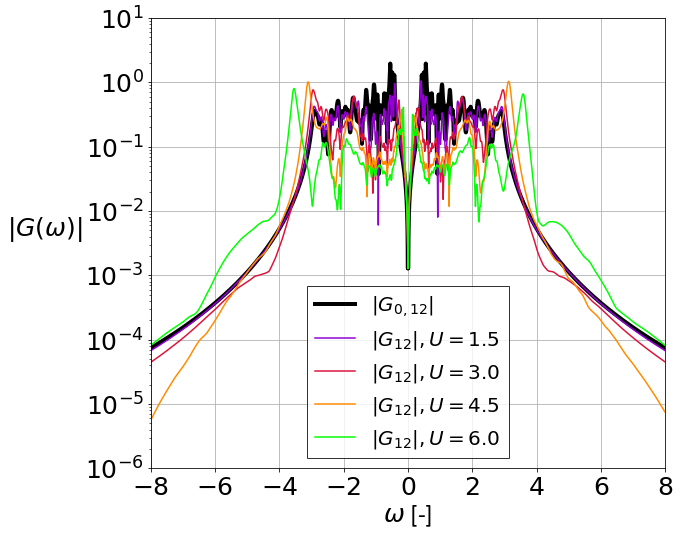

In [61]:
text_file = open("DED2impMatrixPGraphenenanoribv3G", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos2=[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))
    fdos2[1].append(np.real(lines[i][2]))
    fdos2[2].append(np.real(lines[i][3]))
    fdos2[3].append(np.real(lines[i][4]))
    fdos2[4].append(np.real(lines[i][5]))
    fdos2[5].append(np.real(lines[i][6]))
    fdos2[6].append(np.real(lines[i][7]))
    fdos2[7].append(np.real(lines[i][8]))
    fdos2[8].append(np.real(lines[i][9]))
    fdos2[9].append(np.real(lines[i][10]))
    fdos2[10].append(np.real(lines[i][11]))
    fdos2[11].append(np.real(lines[i][12]))
    fdos2[12].append(np.real(lines[i][13]))
    fdos2[13].append(np.real(lines[i][14]))
    fdos2[14].append(np.real(lines[i][15]))
    fdos2[15].append(np.real(lines[i][16]))

font = {'size'   : 25}
plt.rc('legend', fontsize=20)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.000001,top=10)
plt.xlim(min(omega), max(omega))
plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$|G(\\omega)|$",va="bottom", rotation=0,labelpad=40,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-8,8,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos2[5], color='black',linewidth=4,label='$|G_{0,12}|$')
U=[1.5,3,4.5,6]
plt.plot(omega,fdos2[6],color='darkviolet',label='$|G_{12}|,U= %.1f$'%U[0])
plt.plot(omega,fdos2[7],color='crimson',label='$|G_{12}|,U= %.1f$'%U[1])
plt.plot(omega,fdos2[8],color='darkorange',label='$|G_{12}|,U= %.1f$'%U[2])
plt.plot(omega,fdos2[9],color='lime',label='$|G_{12}|,U= %.1f$'%U[3])
plt.legend(fancybox=False,loc='lower center').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('2imprho12UG2.svg', format='svg', dpi=3600)

In [62]:
text_file = open("DED2impMatrixchainSzconstr", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos3=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))

 (-6+0j)	 (0.00174825771478089183+0j)	 (0.00186701822249806361+0j)	 (0.00165983854756086998+0j)	 (0.00169305877128110484+0j)	 (0.00165983854756086998+0j)	 (0.00169305877128110528+0j)	 (0.0017482577147809146+0j)	 (0.00186701821827358499+0j)
[(-1.9959999999999996+0j), (0.02137134434780388+0j), (0.09295570987614808+0j), (0.020572397012475877+0j), (0.04037321879789057+0j), (0.020572397012475877+0j), (0.04037321879789052+0j), (0.021371344347804005+0j), (0.0929557094450392+0j)]
3002


In [63]:
text_file = open("DED2impMatrixchainSz1constr", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos5=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos5[0].append(np.real(lines[i][1]))
    fdos5[1].append(np.real(lines[i][2]))
    fdos5[2].append(np.real(lines[i][3]))
    fdos5[3].append(np.real(lines[i][4]))

 (-6+0j)	 (0.00174825771478094734+0j)	 (0.00110904896224688814+0j)	 (0.00165983854756092853+0j)	 (0.00104756591902255844+0j)	 (0.00165983854756092853+0j)	 (0.00104756591902255844+0j)	 (0.00174825771478097792+0j)	 (0.00110904896224689161+0j)
[(-1.9959999999999996+0j), (0.021371344347803987+0j), (0.007905370691855233+0j), (0.020572397012476238+0j), (0.006723842695248525+0j), (0.020572397012476238+0j), (0.006723842695248531+0j), (0.021371344347804626+0j), (0.007905370691855318+0j)]
3002


In [64]:
text_file = open("DED2impMatrixchainSconstr", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos4=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos4[0].append(np.real(lines[i][1]))
    fdos4[1].append(np.real(lines[i][2]))
    fdos4[2].append(np.real(lines[i][3]))
    fdos4[3].append(np.real(lines[i][4]))

 (-6+0j)	 (0.00174825771478089183+0j)	 (0.0019663628524339144+0j)	 (0.00165983854756086998+0j)	 (0.00179117570915414089+0j)	 (0.00165983854756086998+0j)	 (0.00179117570915414263+0j)	 (0.0017482577147809146+0j)	 (0.00196636284490163101+0j)
[(-1.9959999999999996+0j), (0.02137134434780388+0j), (0.09076772036333956+0j), (0.020572397012475877+0j), (0.07372483889649838+0j), (0.020572397012475877+0j), (0.07372483889649836+0j), (0.021371344347804005+0j), (0.09076771948983545+0j)]
3002


 (-6+0j)	 (0.00174825771478089183+0j)	 (0.00212891805752976225+0j)	 (0.00165983854756086998+0j)	 (0.00191048342868114455+0j)	 (0.00165983854756086998+0j)	 (0.00191048342868114368+0j)	 (0.0017482577147809146+0j)	 (0.00212892300738951133+0j)
[(-1.9959999999999996+0j), (0.02137134434780388+0j), (0.1387477100414922+0j), (0.020572397012475877+0j), (0.08053718905210977+0j), (0.020572397012475877+0j), (0.08053718905210973+0j), (0.021371344347804005+0j), (0.13874858915911092+0j)]
3002
3001 3001


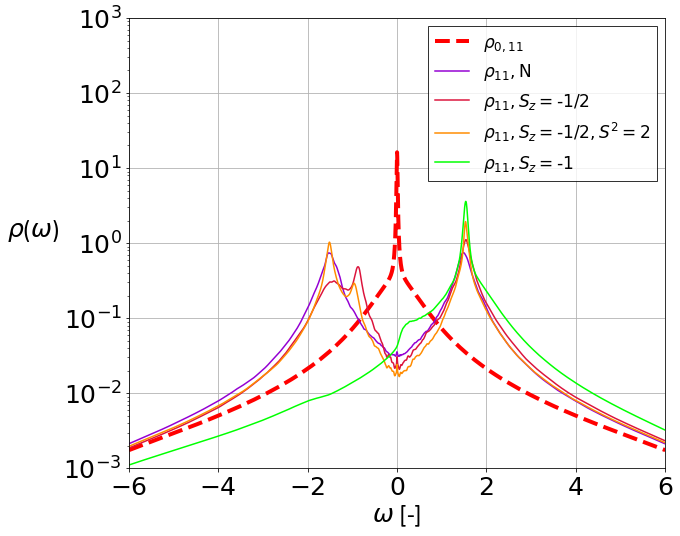

In [65]:
text_file = open("DED2impMatrixchainNconstr", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos2=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))
    fdos2[1].append(np.real(lines[i][2]))
    fdos2[2].append(np.real(lines[i][3]))
    fdos2[3].append(np.real(lines[i][4]))
print(len(omega),len(fdos2[0]))
font = {'size'   : 25}
plt.rc('legend', fontsize=17)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.001,top=1000)
plt.xlim(min(omega), max(omega))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-8,8,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos2[0], '--r',linewidth=4,label='$\\rho_{0,11}$')
plt.plot(omega, fdos2[1],color='darkviolet',label='$\\rho_{11},$N')
plt.plot(omega, fdos3[1],color='crimson',label='$\\rho_{11},S_z=$%.0f/2'%-1)
plt.plot(omega, fdos4[1],color='darkorange',label='$\\rho_{11},S_z=$-1/2$,S^2=$2')
plt.plot(omega, fdos5[1],color='lime',label='$\\rho_{11},S_z=$-1')
#plt.plot(omega, fdos3[1],color='lime',label='$\\rho_{11,Dcombi}$')

plt.legend(fancybox=False,loc='upper right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('2imprhoNconstr.svg', format='svg', dpi=3600)

In [66]:
text_file = open("DED2impMatrixchainSzconstrG", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos3=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))

 (-6+0j)	 (0.171974886758219259+0j)	 (0.172595500385793188+0j)	 (0.00737900998926166278+0j)	 (0.00750224633377395093+0j)	 (0.00737900998926166278+0j)	 (0.0075022463337739622+0j)	 (0.171974886758220175+0j)	 (0.17259550017578007+0j)
[(-1.9959999999999996+0j), (0.5047853384812165+0j), (0.7606936518871016+0j), (0.0646337645499568+0j), (0.1698599892911297+0j), (0.0646337645499568+0j), (0.16985998929112955+0j), (0.5047853384812181+0j), (0.7606936500334099+0j)]
3002


In [67]:
text_file = open("DED2impMatrixchainSz1constrG", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos5=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos5[0].append(np.real(lines[i][1]))
    fdos5[1].append(np.real(lines[i][2]))
    fdos5[2].append(np.real(lines[i][3]))
    fdos5[3].append(np.real(lines[i][4]))

 (-6+0j)	 (0.171974886758218676+0j)	 (0.137471420472638162+0j)	 (0.0073790099892621858+0j)	 (0.00471559831214113205+0j)	 (0.0073790099892621858+0j)	 (0.00471559831214112164+0j)	 (0.171974886758219758+0j)	 (0.137471420472637496+0j)
[(-1.9959999999999996+0j), (0.5047853384812154+0j), (0.2920076821973636+0j), (0.0646337645499579+0j), (0.021204726757454006+0j), (0.0646337645499579+0j), (0.021204726757454027+0j), (0.5047853384812205+0j), (0.2920076821973635+0j)]
3002


In [68]:
text_file = open("DED2impMatrixchainSconstrG", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos4=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos4[0].append(np.real(lines[i][1]))
    fdos4[1].append(np.real(lines[i][2]))
    fdos4[2].append(np.real(lines[i][3]))
    fdos4[3].append(np.real(lines[i][4]))

 (-6+0j)	 (0.171974886758219259+0j)	 (0.178085269095152848+0j)	 (0.00737900998926166278+0j)	 (0.00796436226711684861+0j)	 (0.00737900998926166278+0j)	 (0.00796436226711687116+0j)	 (0.171974886758220175+0j)	 (0.178085268728253171+0j)
[(-1.9959999999999996+0j), (0.5047853384812165+0j), (0.9206006035106886+0j), (0.0646337645499568+0j), (0.2613769401827748+0j), (0.0646337645499568+0j), (0.26137694018277474+0j), (0.5047853384812181+0j), (0.9206005987640451+0j)]
3002


 (-6+0j)	 (0.171974886758219259+0j)	 (0.183851283316237873+0j)	 (0.00737900998926166278+0j)	 (0.0083800725444295298+0j)	 (0.00737900998926166278+0j)	 (0.00838007254442952806+0j)	 (0.171974886758220175+0j)	 (0.183851587525159538+0j)
[(-1.9959999999999996+0j), (0.5047853384812165+0j), (1.037858180307894+0j), (0.0646337645499568+0j), (0.3129529997611816+0j), (0.0646337645499568+0j), (0.3129529997611815+0j), (0.5047853384812181+0j), (1.0378614672670696+0j)]
3002
3001 3001


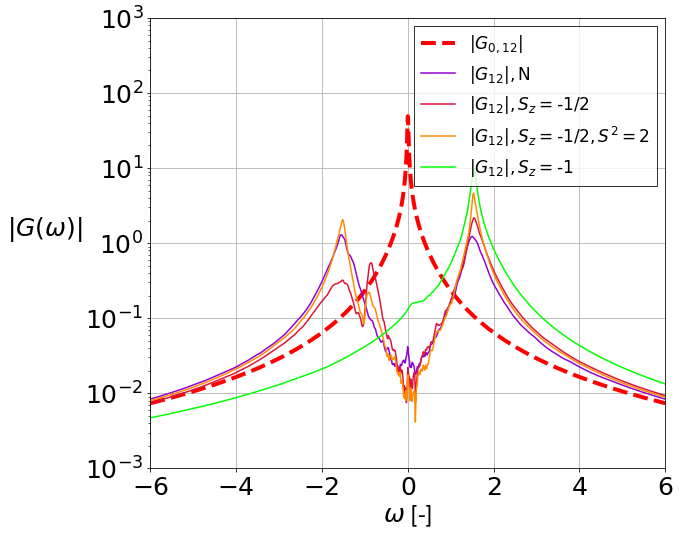

In [69]:
text_file = open("DED2impMatrixchainNconstrG", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos2=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))
    fdos2[1].append(np.real(lines[i][2]))
    fdos2[2].append(np.real(lines[i][3]))
    fdos2[3].append(np.real(lines[i][4]))
print(len(omega),len(fdos2[0]))
font = {'size'   : 25}
plt.rc('legend', fontsize=17)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.001,top=1000)
plt.xlim(min(omega), max(omega))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$|G(\\omega)|$",va="bottom", rotation=0,labelpad=40,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-8,8,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos2[2], '--r',linewidth=4,label='$|G_{0,12}|$')
plt.plot(omega, fdos2[3],color='darkviolet',label='$|G_{12}|,$N')
plt.plot(omega, fdos3[3],color='crimson',label='$|G_{12}|,S_z=$%.0f/2'%-1)
plt.plot(omega, fdos4[3],color='darkorange',label='$|G_{12}|,S_z=$-1/2$,S^2=$2')
plt.plot(omega, fdos5[3],color='lime',label='$|G_{12}|,S_z=$-1')
#plt.plot(omega, fdos3[1],color='lime',label='$\\rho_{11,Dcombi}$')

plt.legend(fancybox=False,loc='upper right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('2imprhoNconstrG.svg', format='svg', dpi=3600)

In [70]:
text_file = open("DED2impMatrixchainSzconstrv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos3=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))

 (-6+0j)	 (0.0016598400196648148+0j)	 (0.00149099414522049388+0j)	 (-0.0022802748659312296+0j)	 (-0.00183105732513617501+0j)	 (-0.0022802748659312296+0j)	 (-0.00183105732513617393+0j)	 (0.00341363803702796368+0j)	 (0.00266463726803662553+0j)
[(-1.9959999999999996+0j), (0.019416346200808003+0j), (0.06451494276333249+0j), (-0.006744838422978126+0j), (-0.0020790381505779963+0j), (-0.006744838422978126+0j), (-0.0020790381505779634+0j), (0.0033771481241860616+0j), (0.013074716796134958+0j)]
3002


In [71]:
text_file = open("DED2impMatrixchainSconstrv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos4=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos4[0].append(np.real(lines[i][1]))
    fdos4[1].append(np.real(lines[i][2]))
    fdos4[2].append(np.real(lines[i][3]))
    fdos4[3].append(np.real(lines[i][4]))

 (-6+0j)	 (0.0016598400196648148+0j)	 (0.00137049871255911517+0j)	 (-0.0022802748659312296+0j)	 (-0.0018157634825058935+0j)	 (-0.0022802748659312296+0j)	 (-0.00181576348250589415+0j)	 (0.00341363803702796368+0j)	 (0.00275433592553380943+0j)
[(-1.9959999999999996+0j), (0.019416346200808003+0j), (0.037576959463420975+0j), (-0.006744838422978126+0j), (-0.0058556550105134655+0j), (-0.006744838422978126+0j), (-0.005855655010513435+0j), (0.0033771481241860616+0j), (0.01339587188718895+0j)]
3002


In [72]:
text_file = open("DED2impMatrixchainSz1constrv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos5=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos5[0].append(np.real(lines[i][1]))
    fdos5[1].append(np.real(lines[i][2]))
    fdos5[2].append(np.real(lines[i][3]))
    fdos5[3].append(np.real(lines[i][4]))

 (-6+0j)	 (0.00165984001966487573+0j)	 (0.00106329544371230314+0j)	 (-0.00228027486593132545+0j)	 (-0.00146046661695423585+0j)	 (-0.00228027486593132545+0j)	 (-0.00146046661695423629+0j)	 (0.00341363803702810636+0j)	 (0.00219847671811875152+0j)
[(-1.9959999999999996+0j), (0.019416346200807625+0j), (0.008925443429582005+0j), (-0.006744838422978031+0j), (-0.002467637221242339+0j), (-0.006744838422978031+0j), (-0.0024676372212423356+0j), (0.003377148124186046+0j), (0.0021860427808376307+0j)]
3002


 (-6+0j)	 (0.0016598400196648148+0j)	 (0.002002619445384293+0j)	 (-0.0022802748659312296+0j)	 (-0.00256655588613170912+0j)	 (-0.0022802748659312296+0j)	 (-0.00256655588613170955+0j)	 (0.00341363803702796368+0j)	 (0.00398050249242337586+0j)
[(-1.9959999999999996+0j), (0.019416346200808003+0j), (0.13676730784905444+0j), (-0.006744838422978126+0j), (-0.0002055480448809302+0j), (-0.006744838422978126+0j), (-0.000205548044880833+0j), (0.0033771481241860616+0j), (0.04744655673038021+0j)]
3002
3001 3001


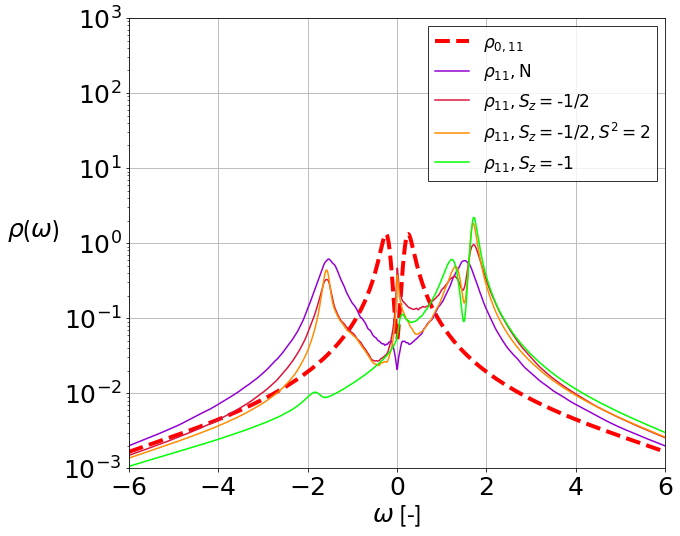

In [73]:
text_file = open("DED2impMatrixchainNconstrv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos2=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))
    fdos2[1].append(np.real(lines[i][2]))
    fdos2[2].append(np.real(lines[i][3]))
    fdos2[3].append(np.real(lines[i][4]))
print(len(omega),len(fdos2[0]))
font = {'size'   : 25}
plt.rc('legend', fontsize=17)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.001,top=1000)
plt.xlim(min(omega), max(omega))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-8,8,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos2[0], '--r',linewidth=4,label='$\\rho_{0,11}$')
plt.plot(omega, fdos2[1],color='darkviolet',label='$\\rho_{11},$N')
plt.plot(omega, fdos3[1],color='crimson',label='$\\rho_{11},S_z=$%.0f/2'%-1)
plt.plot(omega, fdos4[1],color='darkorange',label='$\\rho_{11},S_z=$-1/2$,S^2=$2')
plt.plot(omega, fdos5[1],color='lime',label='$\\rho_{11},S_z=$-1')
#plt.plot(omega, fdos3[1],color='lime',label='$\\rho_{11,Dcombi}$')

plt.legend(fancybox=False,loc='upper right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('2imprhoNconstrv2.svg', format='svg', dpi=3600)

In [74]:
text_file = open("DED2impMatrixchainSconstrGv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos4=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos4[0].append(np.real(lines[i][1]))
    fdos4[1].append(np.real(lines[i][2]))
    fdos4[2].append(np.real(lines[i][3]))
    fdos4[3].append(np.real(lines[i][4]))

 (-6+0j)	 (0.171651385140204449+0j)	 (0.153399029394467257+0j)	 (0.00716715924599437091+0j)	 (0.00570881239600035378+0j)	 (0.00716715924599437091+0j)	 (0.00570881239600035464+0j)	 (0.167353523575440644+0j)	 (0.149216317896874395+0j)
[(-1.9959999999999996+0j), (0.5179851903047022+0j), (0.5969098203147017+0j), (0.06133444323079976+0j), (0.08002217614926332+0j), (0.06133444323079976+0j), (0.08002217614926332+0j), (0.47966061502357954+0j), (0.532460259658454+0j)]
3002


In [75]:
text_file = open("DED2impMatrixchainSzconstrGv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos3=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos3[0].append(np.real(lines[i][1]))
    fdos3[1].append(np.real(lines[i][2]))
    fdos3[2].append(np.real(lines[i][3]))
    fdos3[3].append(np.real(lines[i][4]))

 (-6+0j)	 (0.171651385140204449+0j)	 (0.157676330708026197+0j)	 (0.00716715924599437091+0j)	 (0.00575714142971761687+0j)	 (0.00716715924599437091+0j)	 (0.0057571414297176134+0j)	 (0.167353523575440644+0j)	 (0.146320357413814467+0j)
[(-1.9959999999999996+0j), (0.5179851903047022+0j), (0.6430265308529396+0j), (0.06133444323079976+0j), (0.07444289249997894+0j), (0.06133444323079976+0j), (0.07444289249997915+0j), (0.47966061502357954+0j), (0.46336811135514183+0j)]
3002


In [76]:
text_file = open("DED2impMatrixchainSz1constrGv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos5=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos5[0].append(np.real(lines[i][1]))
    fdos5[1].append(np.real(lines[i][2]))
    fdos5[2].append(np.real(lines[i][3]))
    fdos5[3].append(np.real(lines[i][4]))

 (-6+0j)	 (0.171651385140204699+0j)	 (0.137254543129313844+0j)	 (0.00716715924599469357+0j)	 (0.00459384739632147116+0j)	 (0.00716715924599469357+0j)	 (0.00459384739632147376+0j)	 (0.167353523575440949+0j)	 (0.134283772293240372+0j)
[(-1.9959999999999996+0j), (0.517985190304702+0j), (0.29719188243250083+0j), (0.0613344432307987+0j), (0.020932471182858993+0j), (0.0613344432307987+0j), (0.020932471182859014+0j), (0.4796606150235785+0j), (0.28330321760648547+0j)]
3002


 (-6+0j)	 (0.171651385140204449+0j)	 (0.182726376361246889+0j)	 (0.00716715924599437091+0j)	 (0.00806346309488587508+0j)	 (0.00716715924599437091+0j)	 (0.00806346309488587681+0j)	 (0.167353523575440644+0j)	 (0.177822388840796541+0j)
[(-1.9959999999999996+0j), (0.5179851903047022+0j), (1.0773021754113252+0j), (0.06133444323079976+0j), (0.16623184000389274+0j), (0.06133444323079976+0j), (0.16623184000389296+0j), (0.47966061502357954+0j), (0.9503603823934883+0j)]
3002
3001 3001


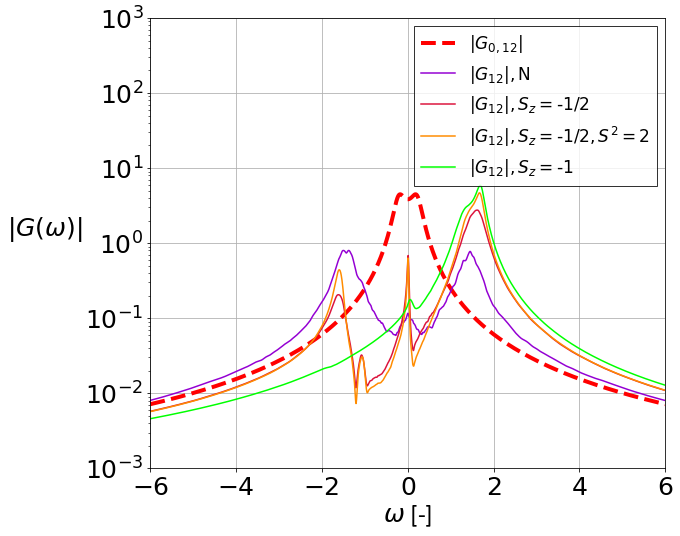

In [77]:
text_file = open("DED2impMatrixchainNconstrGv2", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

print(len(lines))
fdos2=[[],[],[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))
    fdos2[1].append(np.real(lines[i][2]))
    fdos2[2].append(np.real(lines[i][3]))
    fdos2[3].append(np.real(lines[i][4]))
print(len(omega),len(fdos2[0]))
font = {'size'   : 25}
plt.rc('legend', fontsize=17)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
plt.yscale('log')
plt.gca().set_ylim(bottom=0.001,top=1000)
plt.xlim(min(omega), max(omega))
plt.xlabel("$\\omega$ [-]", **axis_font)
plt.gca().set_ylabel("$|G(\\omega)|$",va="bottom", rotation=0,labelpad=40,**axis_font)
#plt.plot(omega,Lorentzian(np.linspace(-8,8,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos2[2], '--r',linewidth=4,label='$|G_{0,12}|$')
plt.plot(omega, fdos2[3],color='darkviolet',label='$|G_{12}|,$N')
plt.plot(omega, fdos3[3],color='crimson',label='$|G_{12}|,S_z=$%.0f/2'%-1)
plt.plot(omega, fdos4[3],color='darkorange',label='$|G_{12}|,S_z=$-1/2$,S^2=$2')
plt.plot(omega, fdos5[3],color='lime',label='$|G_{12}|,S_z=$-1')
#plt.plot(omega, fdos3[1],color='lime',label='$\\rho_{11,Dcombi}$')

plt.legend(fancybox=False,loc='upper right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('2imprhoNconstrGv2.svg', format='svg', dpi=3600)

-3	0.0325178199599961137



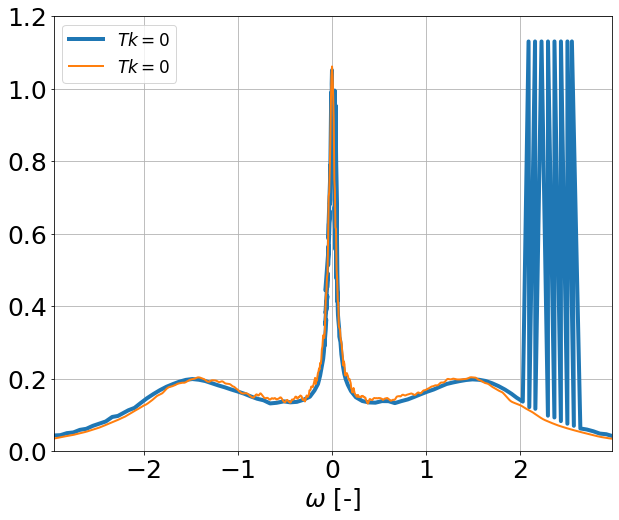

In [78]:
text_file = open("DOS_AIM030ncv3", "r")
lines = text_file.read().split('\n')
print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        lines[i][j]=complex(lines[i][j].replace(" ", "").replace("(", "").replace(")", ""))
text_file.close()
print(lines[1001])

fdos2=[[],[]]
omega=[]
for i in range(len(lines)-1):
    #print(i)
    omega.append(np.real(lines[i][0]))
    fdos2[0].append(np.real(lines[i][1]))

text_file = open("1imp.txt", "r")
lines = text_file.read().split('\n')
#print(lines[0])
for i in range(len(lines)-1):
    lines[i]=lines[i].split('\t')
    for j in range(len(lines[i])):
        #print(lines[i][j])
        lines[i][j]=float(lines[i][j].replace(",", "."))
        #print(lines[i][j])
text_file.close()

omega3=[]
fdos3=[]
for i in range(len(lines)-1):
    #print(i)
    omega3.append(lines[i][0])
    fdos3.append(lines[i][1])
plt.figure(figsize=(10,8))
#plt.yscale('log')
#plt.xscale('log')
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlim(min(omega3), max(omega3))
plt.xlabel("$\\omega$ [-]")
plt.plot(omega3, fdos3,linewidth=4,label='$Tk=0$')
plt.plot(omega, fdos2[0],linewidth=2,label='$Tk=0$')
#plt.plot(omega3, fdos3,linewidth=1,label='$Tk=0$')
plt.legend()
plt.grid(b='on')


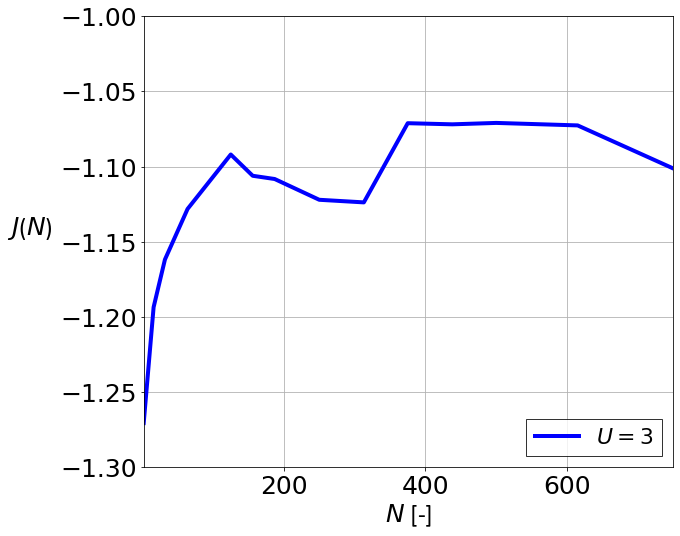

In [79]:
site=[2,16,32,64,125,156,187,250,313,375,438,500,615,750]
SS=[-1.2705096,-1.193455641,-1.161759437,-1.12810269,-1.09191301,-1.106061412,-1.10820749,
-1.12202486,
-1.123753795,
-1.07109287,
-1.071841805,
-1.070904905,
-1.072563218,
-1.101180711
]
font = {'size'   : 25}
plt.rc('legend', fontsize=22)
plt.rc('font', **font)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
axis_font = {'fontname':'Calibri', 'size':'25'}
plt.figure(figsize=(10,8))
#plt.yscale('log')
plt.gca().set_ylim(bottom=-1.3,top=-1)
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(site), max(site))
#plt.gca().set_xticks([-8,-6,-4,-2,0,2,4,6,8], minor=False)
plt.xlabel("$N$ [-]", **axis_font)
plt.gca().set_ylabel("$J$($N$)",va="bottom", rotation=0,labelpad=30,**axis_font)
#plt.plot(omega, fdos3[0],'-b',label='$\Gamma\it{=0.15}$')
#plt.plot(omega, fdos3[1],color='darkviolet',label='$\\Gamma\it{=0.30}$')
plt.plot(site, SS,'b',label='$U=3$',linewidth=4)
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend(fancybox=False,loc='lower right').get_frame().set_edgecolor('black')
plt.grid(b='on')
plt.tight_layout()
plt.savefig('J2imp.svg', format='svg', dpi=3600)

TypeError: Lorentzian() missing 2 required positional arguments: 'Sigma' and 'Ed'

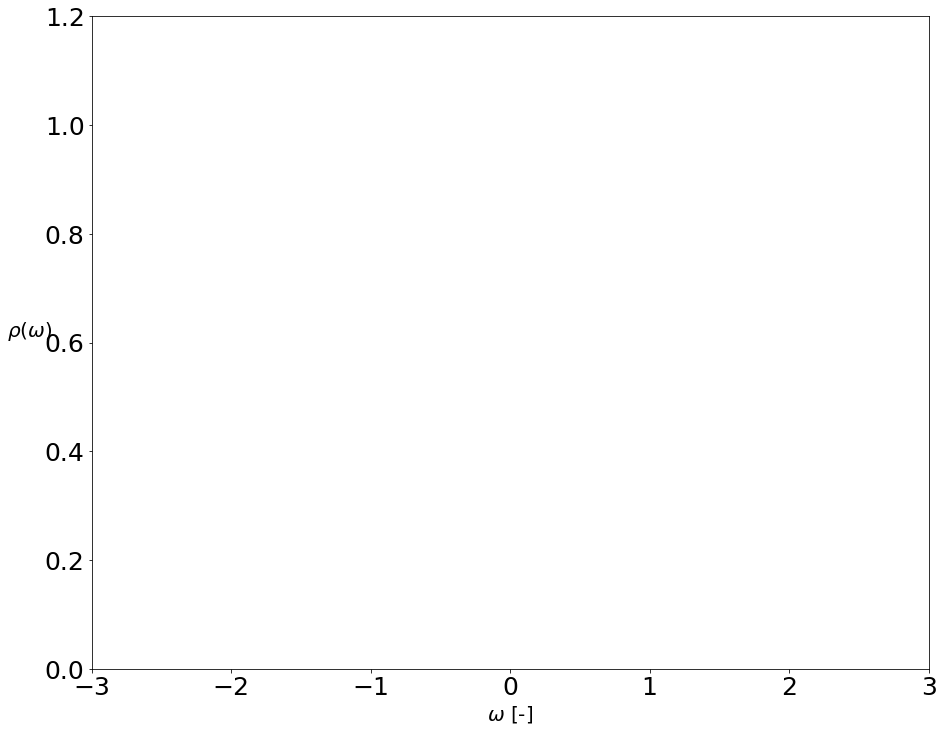

In [80]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=25)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(15,12))
#plt.rc('xtick', labelsize=20) 
#plt.rc('ytick', labelsize=20)
plt.xlim(min(omega), max(omega))
plt.gca().set_ylim(bottom=0,top=1.2)
plt.xlabel("$\\omega$ [-]")
plt.gca().set_ylabel("$\\rho$($\\omega$)",va="bottom", rotation=0,labelpad=15)
plt.plot(omega,Lorentzian(np.linspace(-3,3,1001),0.3,4)[0],linewidth=4,label='$\\rho_0$')
plt.plot(omega, fdos3[1],label='$\\rho_{no constr.}$')
#plt.plot(omega, fdos3[0],label='$\\rho_{con}$')
plt.legend()
plt.grid(b='on')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Calibri', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Calibri', 'size':'14'}

# Set the font properties (for use in legend)   
font_path = 'C:\Windows\Fonts\Arial.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=14)

ax = plt.subplot() # Defines ax variable by creating an empty plot

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(13)

x = np.linspace(0, 10)
y = x + np.random.normal(x) # Just simulates some data

plt.plot(x, y, 'b+', label='Data points')
plt.xlabel("x axis", **axis_font)
plt.ylabel("y axis", **axis_font)
plt.title("Misc graph", **title_font)
plt.legend(loc='lower right', prop=font_prop, numpoints=1)
plt.text(0, 0, "Misc text", **title_font)
plt.show()